In [1]:
# Importing needed packages:

import eurostat                                                   # version: 1.0.4
import numpy as np                                                # version: 1.24.3
import pandas as pd                                               # version: 2.0.3
import seaborn as sns                                             # version: 0.12.2
from scipy import stats                                           # version: 1.11.1
import matplotlib as mpl                                          # version: 3.7.2
from sklearn.svm import SVC                                       # version: 1.3.0
from sklearn import metrics                                       # version: 1.3.0
import matplotlib.pyplot as plt                                   # version: 3.7.2
from sklearn.cluster import KMeans                                # version: 1.3.0
from IPython.display import display                               # version: 8.15.0
from sklearn.decomposition import PCA                             # version: 1.3.0
from sklearn.feature_selection import RFE                         # version: 1.3.0
from matplotlib.ticker import FuncFormatter                       # version: 3.7.2
from sklearn.metrics import silhouette_score                      # version: 1.3.0
from sklearn.preprocessing import LabelEncoder                    # version: 1.3.0
from sklearn.linear_model import LinearRegression                 # version: 1.3.0
from sklearn.model_selection import train_test_split              # version: 1.3.0
from sklearn.model_selection import KFold, GridSearchCV           # version: 1.3.0
from sklearn.preprocessing import StandardScaler, scale           # version: 1.3.0
from sklearn.metrics import classification_report, accuracy_score # version: 1.3.0

# Importing packages required for the dashboard:

import dash                                 # version: 2.14.2                                                    
from dash import dcc                        # version: 2.14.2
from dash import html                       # version: 2.14.2
import plotly.express as px                 # version: 5.9.0
import plotly.graph_objects as go           # version: 5.9.0
from dash.dependencies import Input, Output # version: 2.14.2

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

●	**Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition.<br> This should include the relevance and implications of any and all licensing/permissions associated with the data.** [0-15]<br>
### Answer

Undoubtedly, this was the most challenging part of the assignment. However, I discovered the `Eurostat` website, which provides extensive content on data transportation. Additionally, the `CSO` offers interesting datasets related to the Irish transportation sector. Other platforms utilized included `GitHub`, `Kaggle`, and `TripAdvisor`.

A positive aspect of this research is that I discovered platforms such as `Eurostat`, which even has a `Python` package to download its datasets. On the negative side, the length of transportation datasets I found was a challenge for the machine learning part. There was not enough data to create accurate and consistent models. However, I found a solution to overcome this issue.

In terms of licenses, we are mostly covered by `Creative Commons`, allowing us to use these datasets. Only for `TripAdvisor` `Ryanair` reviews, I do not have licenses. After thorough research, I believe I am not infringing any law, as I am not collecting any personal data. I am compliant with `GDPR`, and `TripAdvisor` does not state that you cannot collect their reviews for research purposes.


●	**Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed.
Evaluate your raw data and detail, in depth, the various attributes and issues that you find.<br> Your evaluation should reference evidence to support your chosen methodology and use visualizations to illustrate your findings.** [0-25]<br>
### Answer

# dvdf

In [3]:
# Passenger Journeys by Luas
# Source: https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas
# Unit: Weekly passenger number
# Licence: https://creativecommons.org/licenses/by/4.0/
# 3.1.1 Dataset for 3.2. Confidence interval

dvdf = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TII03/CSV/1.0/en')

Original dataset attributes:

In [4]:
dvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        780 non-null    object 
 1   Statistic Label  780 non-null    object 
 2   TLIST(W1)        780 non-null    object 
 3   Week             780 non-null    object 
 4   C03132V03784     780 non-null    object 
 5   Luas Line        780 non-null    object 
 6   UNIT             780 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), object(7)
memory usage: 48.9+ KB


We need to refine it to calculate `Confidence Intervals`; Exploratory Data Analysis (EDA) starts:

In [5]:
# Renaming columns
dvdf = dvdf.rename(columns={'Luas Line': 'Luas_Line'})

# Dropping 'STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT' columns irrelevant our analysis:
dvdf_col_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT']
dvdf.drop(dvdf_col_drop ,axis=1, inplace=True) 

In [6]:
dvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       780 non-null    object 
 1   Luas_Line  780 non-null    object 
 2   VALUE      771 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.4+ KB


In [7]:
dvdf.head()

,Week,Luas_Line,VALUE
0,2019 Week 01,All Luas lines,549533.0
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
3,2019 Week 02,All Luas lines,839022.0
4,2019 Week 02,Red line,408199.0


In [8]:
def luas_line_row_count(dataframe):
    return dataframe['Luas_Line'].value_counts()

dvdf_count = pd.DataFrame(dvdf)

# Calling the function
luas_line_counts = luas_line_row_count(dvdf_count)

luas_line_counts

Luas_Line
All Luas lines    260
Red line          260
Green line        260
Name: count, dtype: int64

In [9]:
# Convert the data to a pandas Series for easier plotting
series_data = pd.Series(luas_line_counts)

An important step is to drop *All Luas lines* so that we can focus specifically on the Red and Green lines

In [10]:
# Creating dataset dvdfa dropping values for 'All Luas lines' we want to focus on 'Red line' and 'Green line'
dvdfa = dvdf[(dvdf['Luas_Line'] != 'All Luas lines')]

In [11]:
def luas_line_row_count(dataframe):
    return dataframe['Luas_Line'].value_counts()

dvdfa_count = pd.DataFrame(dvdfa)

# Calling the function
luas_line_counts1 = luas_line_row_count(dvdfa_count)

luas_line_counts

Luas_Line
All Luas lines    260
Red line          260
Green line        260
Name: count, dtype: int64

In [12]:
# Convert the data to a pandas Series for easier plotting
series_data1 = pd.Series(luas_line_counts1)

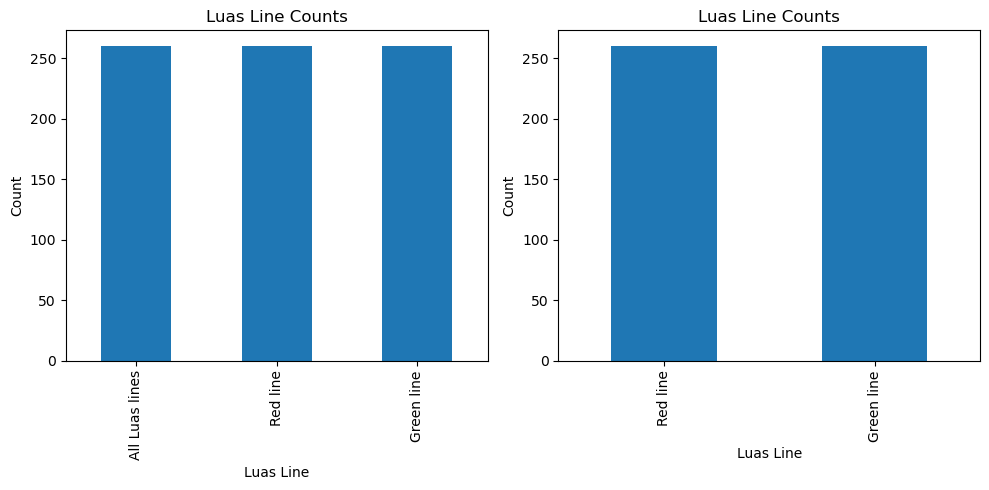

In [13]:

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Left-hand side plot
series_data.plot(kind='bar', ax=axes[0])
axes[0].set_title('Luas Line Counts')
axes[0].set_xlabel('Luas Line')
axes[0].set_ylabel('Count')

# Right-hand side plot
series_data1.plot(kind='bar', ax=axes[1])
axes[1].set_title('Luas Line Counts')
axes[1].set_xlabel('Luas Line')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [14]:
# Display the rows with null values
dvdfa_NaN = dvdfa[dvdfa.isnull().any(axis=1)].reset_index(drop=True)
print("Rows with null values:")
dvdfa_NaN

Rows with null values:


,Week,Luas_Line,VALUE
0,2019 Week 53,Red line,NaN
1,2019 Week 53,Green line,NaN
2,2021 Week 53,Red line,NaN
3,2021 Week 53,Green line,NaN
4,2022 Week 53,Red line,NaN
5,2022 Week 53,Green line,NaN


In [15]:
# Dropping NaN
dvdfa = dvdfa.dropna(subset=['VALUE'])

# Dropping '2020 Week 53' to ensure consistent week counts across all years:
dvdfa = dvdfa[~dvdfa['Week'].str.contains('Week 53')]

In [16]:
dvdfa.head()

,Week,Luas_Line,VALUE
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
4,2019 Week 02,Red line,408199.0
5,2019 Week 02,Green line,430823.0
7,2019 Week 03,Red line,376785.0


In [17]:
# Extracting the year from Week column
dvdfa['Year'] = pd.to_datetime(dvdfa['Week'].str[:4] + ' ' + dvdfa['Week'].str[-2:] + ' 1', format='%Y %W %w').dt.year

In [18]:
# Counting the values that each year has:
year_counts = dvdfa['Year'].value_counts().sort_index()
year_counts

Year
2019    104
2020    104
2021    104
2022    104
2023     96
Name: count, dtype: int64

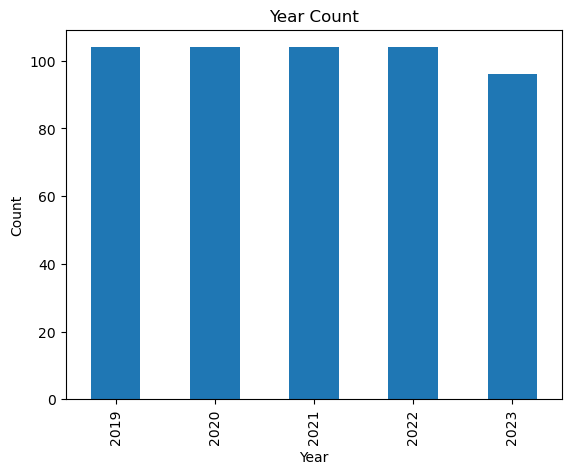

In [19]:
# Convert the data to a pandas Series for easier plotting
series_data = pd.Series(year_counts)

# Plotting

series_data.plot(kind='bar')
plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We won't be using 2023 for CI as it doesn't have the same count as the rest of the years:

In [20]:
# Creating variables for each year and storing the values to perform Confidence Intervals:

dvdfa_2019 = dvdfa[(dvdfa['Year'] == 2019)].copy()
dvdfa_2019.reset_index(drop=True, inplace=True)
dvdfa_2020 = dvdfa[(dvdfa['Year'] == 2020)].copy()
dvdfa_2020.reset_index(drop=True, inplace=True)
dvdfa_2021 = dvdfa[(dvdfa['Year'] == 2021)].copy()
dvdfa_2021.reset_index(drop=True, inplace=True)
dvdfa_2022 = dvdfa[(dvdfa['Year'] == 2022)].copy()
dvdfa_2022.reset_index(drop=True, inplace=True)

We need to find out the averages for each of the years to perform *Confidence Intervals* and *Hypothesis test*:

In [21]:
# Passing descriptive statistics for each year into variables
de_2019 = dvdfa_2019.describe().drop('Year', axis=1)
de_2020 = dvdfa_2020.describe().drop('Year', axis=1)
de_2021 = dvdfa_2021.describe().drop('Year', axis=1)
de_2022 = dvdfa_2022.describe().drop('Year', axis=1)

# Concatenating datasets side by side to have it visually handy
combined_desc = pd.concat([de_2019, de_2020, de_2021, de_2022], axis=1, keys=['2019', '2020', '2021', '2022'])

print('Descriptive Statistics:')
display(combined_desc)

Descriptive Statistics:


,2019,2020,2021,2022
,VALUE,VALUE,VALUE,VALUE
count,104.000000,104.000000,104.000000,104.000000
mean,462966.403846,185157.009615,187611.134615,373602.250000
std,58751.214682,139494.873679,82667.596263,90580.590311
min,259211.000000,19727.000000,64278.000000,161546.000000
25%,441097.250000,92848.000000,102652.500000,306127.500000
50%,464353.000000,152092.000000,195341.500000,354642.000000
75%,499103.250000,203166.000000,258089.000000,442544.750000
max,622699.000000,482333.000000,327777.000000,547010.000000


From the original dataframe `dvdf`, we have obtained four datasets: `dvdfa_2019`, `dvdfa_2020`, `dvdfa_2021`, and `dvdfa_2022`, to perform Confidence Intervals.

# dvdf1

In [22]:
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf1 = eurostat.get_data_df('TRAN_HV_PSMOD',True)
dvdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,...,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.0,,10.6,,10.5,,...,10.0,,9.5,be,9.7,e,9.3,e,9.0,e
1,A,PC,BUS_TOT,BE,10.6,e,10.7,e,10.7,e,...,10.2,e,10.3,e,10.4,e,8.2,e,8.2,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,...,13.1,e,12.0,e,13.0,e,8.6,e,8.0,e
3,A,PC,BUS_TOT,CH,3.7,,3.9,,4.0,,...,5.9,e,5.9,e,6.1,e,5.8,e,5.9,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,...,19.0,e,18.9,e,18.5,e,12.6,e,12.7,e


Original dataset attributes:

In [23]:
dvdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             148 non-null    object 
 1   unit             148 non-null    object 
 2   vehicle          148 non-null    object 
 3   geo\TIME_PERIOD  148 non-null    object 
 4   1990_value       84 non-null     float64
 5   1990_flag        148 non-null    object 
 6   1991_value       80 non-null     float64
 7   1991_flag        148 non-null    object 
 8   1992_value       84 non-null     float64
 9   1992_flag        148 non-null    object 
 10  1993_value       92 non-null     float64
 11  1993_flag        148 non-null    object 
 12  1994_value       88 non-null     float64
 13  1994_flag        148 non-null    object 
 14  1995_value       117 non-null    float64
 15  1995_flag        148 non-null    object 
 16  1996_value       117 non-null    float64
 17  1996_flag       

In [24]:
# Column count before tidying the dataset:
dvdf1_before = dvdf1.copy()

We need to refine it to calculate `Hypothesis Test Two Populations`; Exploratory Data Analysis (EDA) starts:

In [25]:
# Tyding up dvdf1

# Filter columns that do not contain '_flag'
dvdf1 = dvdf1.filter(regex='^(?!.*_flag)')

# Renaming columns
dvdf1 = dvdf1.rename(columns={'geo\\TIME_PERIOD': 'Country_code','vehicle':'Vehicle_type'})

# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Country_code' we don't need 'EU27_2020' and 'EU28'
dvdf1 = dvdf1[(dvdf1['Vehicle_type'] != 'TRN_BUS_TOT_AVD') & ~dvdf1['Country_code'].isin(['EU27_2020', 'EU28'])]

# Drop rows with null values
dvdf1 = dvdf1.dropna()

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
dvdf1 = dvdf1.drop(['freq', 'unit'], axis=1).reset_index(drop=True)

# Trimming 'BUS_TOT' to have just 'BUS'
dvdf1['Vehicle_type'] = dvdf1['Vehicle_type'].str.replace('_TOT', '')

# Concatenate 'Country_code' and 'Vehicle_type'
dvdf1['Country_Vehicle'] = dvdf1['Country_code'] + '_' + dvdf1['Vehicle_type']

# Drop the original columns
dvdf1 = dvdf1.drop(['Vehicle_type', 'Country_code'], axis=1)

dvdf1.head()

,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Country_Vehicle
0,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,...,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0,AT_BUS
1,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,...,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2,BE_BUS
2,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,...,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9,CH_BUS
3,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,...,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8,DE_BUS
4,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,...,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1,DK_BUS


In [26]:
dvdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1990_value       54 non-null     float64
 1   1991_value       54 non-null     float64
 2   1992_value       54 non-null     float64
 3   1993_value       54 non-null     float64
 4   1994_value       54 non-null     float64
 5   1995_value       54 non-null     float64
 6   1996_value       54 non-null     float64
 7   1997_value       54 non-null     float64
 8   1998_value       54 non-null     float64
 9   1999_value       54 non-null     float64
 10  2000_value       54 non-null     float64
 11  2001_value       54 non-null     float64
 12  2002_value       54 non-null     float64
 13  2003_value       54 non-null     float64
 14  2004_value       54 non-null     float64
 15  2005_value       54 non-null     float64
 16  2006_value       54 non-null     float64
 17  2007_value       5

In [27]:
# Column count after tidying the dataset:
dvdf1_after = dvdf1.copy()

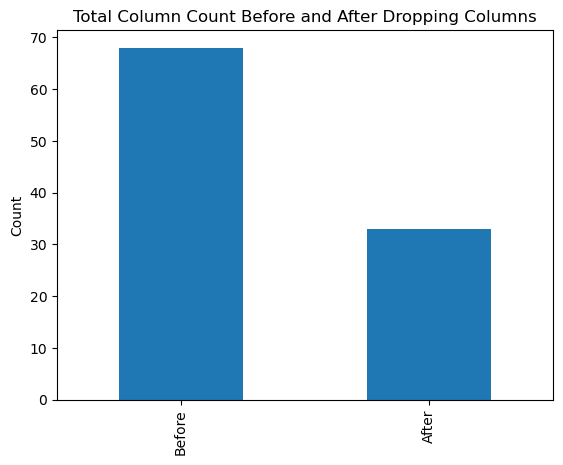

In [28]:
# Get column counts
count_before = dvdf1_before.shape[1]
count_after = dvdf1_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

The first issue is that we need to extract `years` and create a column to store them, the same goes for `Country_Vehicle`.<br> This marks the initial step in modeling the `Hypothesis Test for Two Populations`.

In [29]:
# We need to organise dvdf1, basically I want to have 'Year', 'Country_Vehicle' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf1.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf1.iterrows():
            value = row[col]
            country_vehicle = row['Country_Vehicle']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Vehicle': country_vehicle,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CV_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CV_V_df = Y_CV_V_df.pivot_table(index=['Year', 'Country_Vehicle'], columns='Category', values='Value').reset_index()
Y_CV_V_df = Y_CV_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf1 = Y_CV_V_df.copy() #Reusing variable dvdf1

dvdf1.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.0
1,1990,AT_CAR,77.1
2,1990,AT_TRN,11.9
3,1990,BE_BUS,10.6
4,1990,BE_CAR,83.3


Now, we need to pivot `dvdf1` to store each `Country_Vehicle` in a separate column. Once we have done that, the dataset will be ready for implementing the `Hypothesis Test for Two Populations`.

In [30]:
# Pivot the DataFrame
dvdf1 = dvdf1.pivot(index='Year', columns='Country_Vehicle', values='value').reset_index()
dvdf1 = dvdf1.rename_axis(None, axis=1)
dvdf1.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,...,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.0,77.1,11.9,10.6,83.3,6.1,3.7,82.1,14.2,...,30.5,18.4,71.5,10.1,9.5,84.1,6.5,30.6,62.7,6.7
1,1991,10.6,77.0,12.4,10.7,83.3,6.1,3.9,81.1,15.0,...,24.6,18.6,71.4,9.9,9.5,84.7,5.9,29.3,66.4,4.3
2,1992,10.5,77.0,12.5,10.7,83.3,6.0,4.0,81.4,14.6,...,20.3,22.7,68.2,9.0,9.4,84.8,5.8,23.0,73.9,3.0
3,1993,10.7,77.2,12.1,10.9,83.3,5.9,3.9,80.9,15.2,...,17.7,19.3,72.2,8.5,9.3,84.4,6.3,21.1,75.8,3.1
4,1994,10.6,77.8,11.6,11.8,82.6,5.6,4.0,79.8,16.2,...,15.6,17.9,74.3,7.8,9.3,84.4,6.3,20.4,76.6,3.0


Getting statistics helps us establish the hypotheses:

In [31]:
# dvdf1.describe(include='all').T # Transposing columns to see each Country_Vehicle
# passing the stats into 'dvdf1b' dataframe
dvdf1b = (dvdf1.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
dvdf1b = dvdf1b.drop(0)

# Renaming columns
dvdf1b = dvdf1b.rename(columns={'index': 'Country_Vehicle'})
dvdf1b.head(10)

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
10,DE_BUS,32.0,NaN,NaN,NaN,7.0,0.864348,4.8,6.7,7.1,7.3,9.1


In [32]:
# Filtering by each Vehicle, it will help visually to have each category grouped
dvdf1_bus = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('BUS')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)
dvdf1_car = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('CAR')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)
dvdf1_trn = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('TRN')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)

In [33]:
print('Descriptive Statistics for BUS, category:')
display(dvdf1_bus)
print('Descriptive Statistics for CAR, category:')
display(dvdf1_car)
print('Descriptive Statistics for TRAIN, category:')
display(dvdf1_trn)

Descriptive Statistics for BUS, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,HU_BUS,32.0,22.20625,2.564011,14.3,21.25,22.8,24.025,25.0
1,EL_BUS,32.0,22.078125,6.268649,12.3,17.45,19.6,28.125,32.4
2,PL_BUS,32.0,16.634375,5.64553,7.5,13.075,15.45,19.525,28.2
3,SI_BUS,32.0,14.621875,5.50148,7.5,11.4,11.8,17.075,30.6
4,IE_BUS,32.0,14.034375,1.144583,11.5,13.3,14.25,14.75,16.2
5,ES_BUS,32.0,12.75625,3.435952,6.4,11.875,13.0,13.55,23.3
6,IT_BUS,32.0,12.003125,0.936873,10.2,11.4,11.7,12.475,14.7
7,DK_BUS,32.0,11.740625,2.805623,6.8,9.8,10.8,14.0,17.4
8,BE_BUS,32.0,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
9,FI_BUS,32.0,11.03125,1.430416,8.3,9.9,10.5,12.225,13.5


Descriptive Statistics for CAR, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,NL_CAR,32.0,86.121875,1.487959,82.9,85.4,86.0,87.225,90.1
1,FR_CAR,32.0,85.378125,1.13101,83.3,84.575,85.5,86.4,87.0
2,DE_CAR,32.0,85.346875,1.169501,83.3,84.5,85.4,85.8,88.8
3,LU_CAR,32.0,84.575,1.151717,82.6,83.4,84.95,85.325,86.6
4,PT_CAR,32.0,84.515625,7.135785,68.2,80.0,89.15,89.7,93.0
5,FI_CAR,32.0,83.878125,1.59105,81.2,82.375,84.2,84.9,87.7
6,SE_CAR,32.0,83.496875,1.338387,79.5,83.4,83.9,84.1,84.8
7,IE_CAR,32.0,82.85,1.287157,80.5,82.1,82.7,83.4,86.1
8,SI_CAR,32.0,82.71875,6.284258,62.7,80.4,85.6,86.425,91.2
9,IT_CAR,32.0,82.15625,1.290396,78.9,81.575,82.35,83.0,85.9


Descriptive Statistics for TRAIN, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,CH_TRN,32.0,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
1,HU_TRN,32.0,11.171875,2.125609,6.0,10.0,11.85,12.9,14.7
2,AT_TRN,32.0,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
3,PL_TRN,32.0,10.428125,5.815177,4.9,6.9,8.35,11.0,30.5
4,NL_TRN,32.0,9.39375,1.306297,6.9,8.4,9.35,10.45,11.8
5,FR_TRN,32.0,9.028125,0.821578,7.5,8.35,9.1,9.8,10.3
6,DK_TRN,32.0,8.365625,1.257906,5.8,7.95,8.4,9.3,10.3
7,SE_TRN,32.0,8.203125,1.663747,5.8,6.775,7.75,9.25,12.2
8,DE_TRN,32.0,7.659375,0.808766,5.4,7.275,7.6,8.225,9.3
9,BE_TRN,32.0,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2


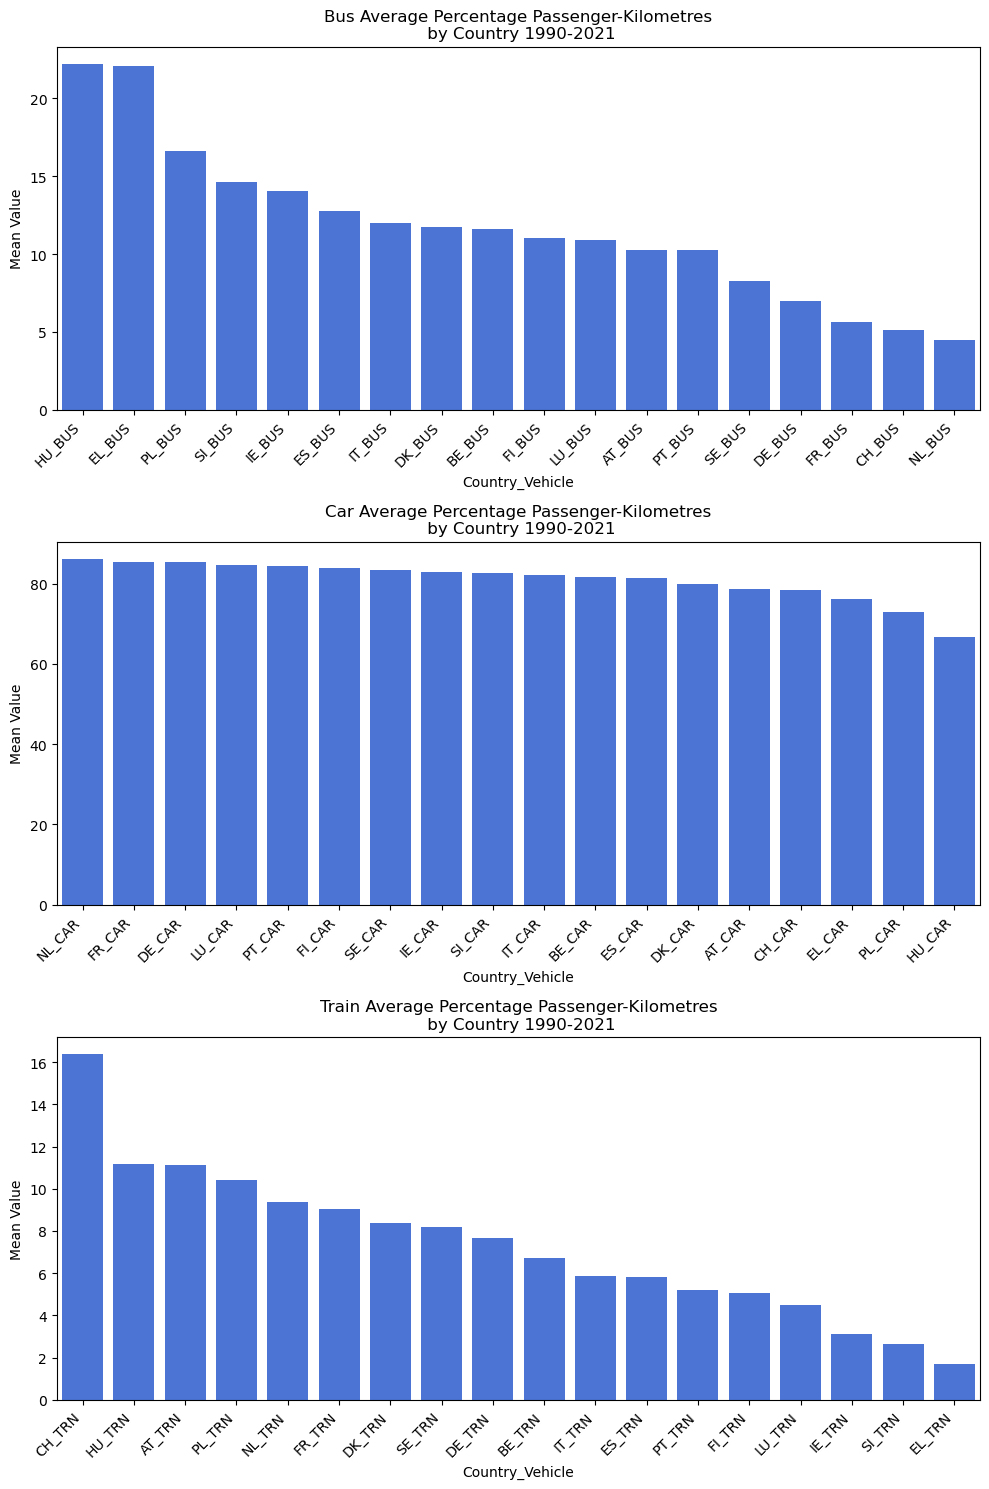

In [34]:
# Plots for Bus, Car, and Train 
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Bus
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_bus, color='#346beb', errorbar=None, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Country_Vehicle')
axes[0].set_ylabel('Mean Value')
axes[0].set_title('Bus Average Percentage Passenger-Kilometres\n by Country 1990-2021')

# Plot for Car
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_car, color='#346beb', errorbar=None, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Country_Vehicle')
axes[1].set_ylabel('Mean Value')
axes[1].set_title('Car Average Percentage Passenger-Kilometres\n by Country 1990-2021')

# Plot for Train
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_trn, color='#346beb', errorbar=None, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel('Country_Vehicle')
axes[2].set_ylabel('Mean Value')
axes[2].set_title('Train Average Percentage Passenger-Kilometres\n by Country 1990-2021')

plt.tight_layout()
plt.show()

Now we can apply the `Hypothesis Test for Two Populations` to compare `Ireland` with other `EU` countries.

# dvdf2

In [35]:
# Air passenger transport by main airports in each reporting country
# Unit of measure: Annual passengers carried
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf2 = eurostat.get_data_df('AVIA_PAOA',True) #It takes a bit to load...                                                             
dvdf2.head()

,freq,unit,tra_meas,rep_airp,schedule,tra_cov\TIME_PERIOD,1993_value,1993_flag,1993-01_value,1993-01_flag,...,2023-10_value,2023-10_flag,2023-11_value,2023-11_flag,2023-Q1_value,2023-Q1_flag,2023-Q2_value,2023-Q2_flag,2023-Q3_value,2023-Q3_flag
0,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL,1956.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
1,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
2,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU28,1525.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
3,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
4,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU28,431.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:


In [36]:
# Creating a backup as it takes ages to load....
dvdf2_backup = dvdf2.copy() 

In [37]:
# Column count before tidying the dataset:
dvdf2_before = dvdf2.copy() 

Original dataset attributes:

In [38]:
dvdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277206 entries, 0 to 277205
Columns: 1054 entries, freq to 2023-Q3_flag
dtypes: float64(524), object(530)
memory usage: 2.2+ GB


Way to many columns, we need to refine it to calculate `Anova one-way`; Exploratory Data Analysis (EDA) starts:

In [39]:
# Tyding up dvdf2
# Filter columns that do not contain '_flag'
dvdf2 = dvdf2.filter(regex='^(?!.*_flag)')
dvdf2.head()

# We need to get annual passengers carried
# Filtering based on criteria from:
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
dvdf2 = dvdf2[(dvdf2['freq'] == 'A') & (dvdf2['tra_meas'] == 'PAS_BRD') &
            (dvdf2['schedule'] == 'TOT')  & (dvdf2['tra_cov\\TIME_PERIOD'] == 'TOTAL')]

# Kepping following columns
Col_no_drop = ['freq', 'unit', 'tra_meas', 'rep_airp', 'schedule', 'tra_cov\\TIME_PERIOD']
pattern = r'\d{4}_value'  # Matching 'YYYY_value' pattern

# Use a regular expression to filter columns
Col_filter = dvdf2.columns[dvdf2.columns.str.match(pattern)]  # Columns matching the pattern

# Combine additional columns with the filtered ones
Col_total = Col_no_drop + list(Col_filter)

# Filtering dvdf2 wiht desired columns
dvdf2 = dvdf2[Col_total]

#Dropping not needed columns:

dvdf2 = dvdf2.drop(['freq', 'unit','tra_meas','schedule','tra_cov\\TIME_PERIOD'], axis=1).reset_index(drop=True)

# Renaming columns
dvdf2 = dvdf2.rename(columns={'rep_airp': 'Country_Icao'})

dvdf2.head()

,Country_Icao,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,AT_LOWG,393440.0,446219.0,496184.0,520286.0,593361.0,620805.0,645253.0,723932.0,722471.0,...,894785.0,911708.0,977732.0,990208.0,970037.0,1042519.0,1049248.0,201132.0,229492.0,568833.0
1,AT_LOWI,398493.0,421759.0,440038.0,472134.0,517649.0,585377.0,599678.0,667226.0,655949.0,...,991550.0,1004755.0,1011221.0,1013641.0,1095192.0,1125223.0,1151272.0,490108.0,126743.0,726695.0
2,AT_LOWK,199137.0,203699.0,200213.0,196849.0,218650.0,222716.0,212299.0,229157.0,224194.0,...,263835.0,227850.0,230338.0,196036.0,216784.0,229755.0,211153.0,49736.0,29722.0,83714.0
3,AT_LOWL,321129.0,390317.0,489119.0,573104.0,627838.0,640404.0,653807.0,707640.0,678682.0,...,560092.0,575012.0,541287.0,443273.0,413950.0,475124.0,445423.0,52755.0,70454.0,214199.0
4,AT_LOWS,970732.0,950530.0,1042219.0,1037924.0,1083428.0,1118521.0,1117161.0,1193228.0,1226085.0,...,1676525.0,1838545.0,1852219.0,1753698.0,1900799.0,1861010.0,1731428.0,675204.0,303746.0,1244528.0


In [40]:
# Column count after tidying the dataset:
dvdf2_after = dvdf2.copy() 

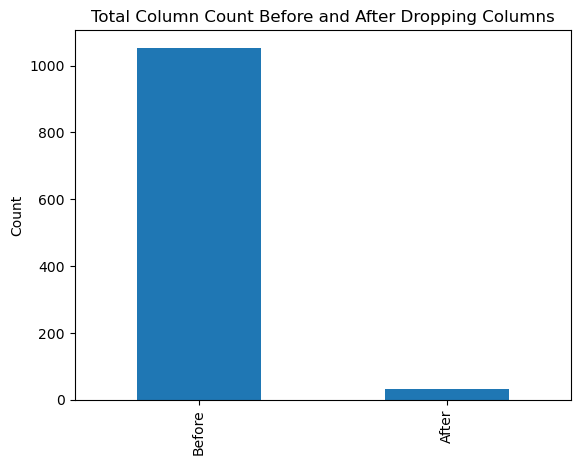

In [41]:
# Get column counts
count_before = dvdf2_before.shape[1]
count_after = dvdf2_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

In [42]:
# Importing icao codes to bring in airport names
# source: https://github.com/ip2location/ip2location-iata-icao/blob/master/iata-icao.csv
# Licence: https://creativecommons.org/licenses/by-sa/4.0/

dvdf2a = pd.read_csv('iata-icao.csv')

dvdf2a.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Ash Shariqah,SHJ,OMSJ,Sharjah International Airport,25.3286,55.5172
1,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
2,AE,Al Fujayrah,FJR,OMFJ,Fujairah International Airport,25.1122,56.3240
3,AE,Abu Zaby,XSB,OMBY,Sir Bani Yas Airport,24.2836,52.5803
4,AE,Ra's al Khaymah,RKT,OMRK,Ras Al Khaimah International Airport,25.6135,55.9388


In [43]:
# Create a new column by concatenating 'country_code' and 'Airport_Icao'
dvdf2a['Country_Icao'] = dvdf2a['country_code'] + '_' + dvdf2a['icao']

# Renaming columns
dvdf2a = dvdf2a.rename(columns={'airport': 'Airport_Name'})

# Bringing in Airport Name to dvdf2
dvdf2 = pd.merge(dvdf2, dvdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')

# Move the 'Airport_Icao' column to the second position
dvdf2.insert(1, 'Airport_Name', dvdf2.pop('Airport_Name'))

# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = dvdf2[dvdf2['Country_Icao'].str.startswith('IE_')].reset_index(drop=True)
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,IE_EICK,Cork Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2192643.0,2265901.0,2747190.0,3023527.0,3183146.0,3258967.0,2767776.0,2422872.0,2358904.0,2333643.0,2252636.0,2138057.0,2065678.0,2226231.0,2301450.0,2387806.0,2585466.0,527014.0,255014.0,2238455.0
1,IE_EICM,Galway Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257400.0,245918.0,90018.0,266473.0,195804.0,154814.0,67134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IE_EIDW,Dublin Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,15915900.0,17167371.0,18504763.0,21265834.0,23307302.0,23506926.0,20507456.0,18426823.0,18758105.0,19090781.0,20148574.0,21694893.0,24962518.0,27778845.0,29454474.0,31319419.0,32676251.0,7267240.0,8266271.0,27793345.0
3,IE_EIKN,Ireland West Airport Knock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524648.0,608257.0,544042.0,629712.0,606421.0,586393.0,614172.0,677368.0,665558.0,703670.0,684671.0,735869.0,748505.0,770908.0,805443.0,142532.0,174027.0,709540.0
4,IE_EIKY,Kerry Airport (Farranfore Airport),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385825.0,392576.0,391138.0,419941.0,356737.0,383866.0,292353.0,280688.0,306042.0,294955.0,303039.0,325670.0,335480.0,365339.0,369836.0,82959.0,115398.0,355043.0
5,IE_EINN,Shannon Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2481372.0,2486478.0,3268522.0,3690889.0,3524450.0,2956327.0,2579676.0,1531309.0,1364955.0,1286139.0,1308242.0,1555225.0,1642888.0,1674567.0,1599390.0,1677661.0,1616085.0,273934.0,322158.0,1421957.0


In [44]:
# As Dublin airport only has data from 2003 onwards, we are going to drop previous years

# List of columns to drop
drop_1993_2002 = [f'{year}_value' for year in range(1993, 2003)]

# Drop the columns
dvdf2 = dvdf2.drop(columns=drop_1993_2002)

In [45]:
# We need to organise dvdf2, basically I want to have 'Year', 'Country_Icao', 'Airport_Name' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf2.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf2.iterrows():
            value = row[col]
            Country_Icao = row['Country_Icao']
            Airport_Name = row['Airport_Name']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Icao': Country_Icao,
                'Airport_Name': Airport_Name,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
dvdf2_final = pd.DataFrame(final_list)

# Pivot the DataFrame
dvdf2_final = dvdf2_final.pivot_table(index=['Year', 'Country_Icao','Airport_Name'], columns='Category', values='Value').reset_index()
dvdf2_final = dvdf2_final.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf2 = dvdf2_final.copy() #Reusing variable dvdf2

dvdf2.head()

,Year,Country_Icao,Airport_Name,value
0,2003,AT_LOWG,Graz Airport,880976.0
1,2003,AT_LOWI,Innsbruck Airport (Kranebitten Airport),699715.0
2,2003,AT_LOWK,Klagenfurt Airport,313957.0
3,2003,AT_LOWL,Linz Airport (Blue Danube Airport),673975.0
4,2003,AT_LOWS,Salzburg Airport,1294648.0


Now we are going to create `dvdf2b` to get a descriptive statistic summary of
each airport that will help in the analysis.

In [46]:
dvdf2b = dvdf2.copy()

In [47]:
# We need to drop Airport_Name to simplify things
dvdf2b = dvdf2b.drop(['Airport_Name'], axis=1).reset_index()

# Pivot the DataFrame
dvdf2b = dvdf2b.pivot(index='Year', columns='Country_Icao', values='value').reset_index()
dvdf2b = dvdf2b.rename_axis(None, axis=1)


dvdf2b = (dvdf2b.describe(include='all').T).drop(['unique', 'top','freq'], axis=1).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
dvdf2b = dvdf2b.drop(0)

# Renaming columns
dvdf2b = dvdf2b.rename(columns={'index': 'Country_Icao'})

# Bringing in Airport Name to dvdf2b
dvdf2b = pd.merge(dvdf2b, dvdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')
# Move the 'Airport_Icao' column to the second position
dvdf2b.insert(1, 'Airport_Name', dvdf2b.pop('Airport_Name'))

dvdf2b

,Country_Icao,Airport_Name,count,mean,std,min,25%,50%,75%,max
0,AT_LOWG,Graz Airport,20.0,872575.4,246184.402594,201132.0,907477.25,960204.0,992959.0,1049248.0
1,AT_LOWI,Innsbruck Airport (Kranebitten Airport),20.0,878784.7,243069.343008,126743.0,748671.5,976909.5,1011826.0,1151272.0
2,AT_LOWK,Klagenfurt Airport,20.0,293914.55,145599.954034,29722.0,215376.25,274073.5,415246.0,524111.0
3,AT_LOWL,Linz Airport (Blue Danube Airport),20.0,564152.95,237035.849214,52755.0,444885.5,608003.0,746464.25,844330.0
4,AT_LOWS,Salzburg Airport,20.0,1582655.4,424559.246938,303746.0,1542566.0,1724561.0,1841963.5,1975784.0
...,...,...,...,...,...,...,...,...,...,...
476,TR_LTFH,Samsun-Carsamba Airport,11.0,1384963.545455,292965.97514,870554.0,1192673.0,1335758.0,1621216.5,1790018.0
477,TR_LTFJ,Sabiha Gokcen International Airport,11.0,26249999.272727,7045902.280388,14813383.0,21093871.5,28191379.0,31092078.5,35566701.0
478,TR_LTFK,Gokceada Airport,2.0,1696.0,42.426407,1666.0,1681.0,1696.0,1711.0,1726.0
479,TR_LTFM,Istanbul Ataturk Airport,5.0,35453324.6,25092596.998651,95205.0,23415111.0,37192641.0,52031566.0,64532100.0


In [48]:
# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = dvdf2b[dvdf2b['Country_Icao'].str.startswith('IE_')].sort_values(by='mean', ascending=False).reset_index(drop=True)
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,count,mean,std,min,25%,50%,75%,max
0,IE_EIDW,Dublin Airport,20.0,21390654.55,6668767.341634,7267240.0,18485278.0,20886645.0,25666599.75,32676251.0
1,IE_EICK,Cork Airport,20.0,2276618.8,731636.886855,255014.0,2217834.0,2317546.5,2625897.0,3258967.0
2,IE_EINN,Shannon Airport,20.0,1913111.2,944315.039543,273934.0,1407706.5,1629486.5,2509777.5,3690889.0
3,IE_EIKN,Ireland West Airport Knock,18.0,607318.666667,180209.530375,142532.0,591400.0,647635.0,708072.5,805443.0
4,IE_EIKY,Kerry Airport (Farranfore Airport),18.0,319826.944444,89962.724077,82959.0,296976.0,345261.5,380358.5,419941.0
5,IE_EICM,Galway Airport,7.0,182508.714286,81126.508423,67134.0,122416.0,195804.0,251659.0,266473.0


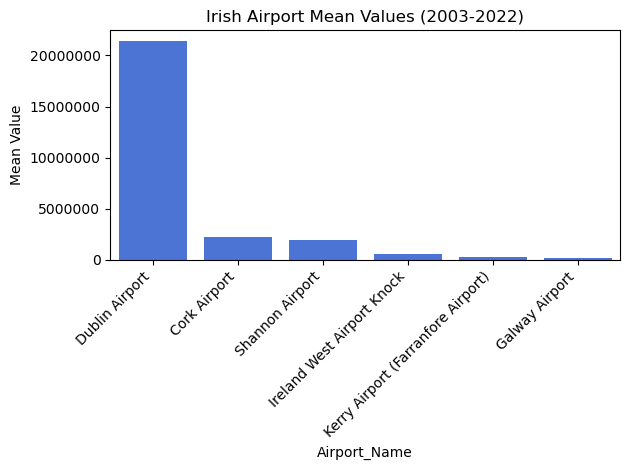

In [49]:
# Assuming df is your DataFrame

sns.barplot(x='Airport_Name', y='mean', data=ireland_airports,color='#346beb')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Airport_Name')
plt.ylabel('Mean Value')

# Turn off scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.title('Irish Airport Mean Values (2003-2022)')
plt.tight_layout()
plt.show()

Now we can perform `Anova one-way` and when normality tests are not successful we can use this dataset also for `Kruskal-Wallis`.

# dvdf3

In [50]:
# New passenger cars by type of motor energy
# Unit of measure: Registrations of new passenger cars by type of motor energy (number)
# https://ec.europa.eu/eurostat/databrowser/view/ROAD_EQR_CARPDA__custom_2784054/bookmark/table?lang=en&bookmarkId=6fa608a8-450f-4e81-8e8e-33f57ab73bd3
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf3 = eurostat.get_data_df('road_eqr_carpda',True)                                                                 
dvdf3.head()

,freq,unit,mot_nrg,geo\TIME_PERIOD,2012_value,2012_flag,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,2016_value,2016_flag,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag
0,A,NR,ALT,AL,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,3757.0,,4935.0,,5703.0,,4114.0,
1,A,NR,ALT,AT,NaN,:,1285.0,,2074.0,,2389.0,,4317.0,,5868.0,,7406.0,,9841.0,,16393.0,,33466.0,,34242.0,
2,A,NR,ALT,BA,NaN,:,39.0,,46.0,,49.0,,141.0,,136.0,,41.0,,137.0,,73.0,,229.0,,300.0,
3,A,NR,ALT,BE,NaN,:,841.0,,2234.0,,2147.0,,4413.0,,5418.0,,7931.0,,12525.0,,18920.0,,25867.0,,40656.0,
4,A,NR,ALT,BG,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,23.0,,NaN,:


In [51]:
# Column count before tidying the dataset:
dvdf3_before = dvdf3.copy()

Original dataset attributes:

In [52]:
dvdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             539 non-null    object 
 1   unit             539 non-null    object 
 2   mot_nrg          539 non-null    object 
 3   geo\TIME_PERIOD  539 non-null    object 
 4   2012_value       5 non-null      float64
 5   2012_flag        539 non-null    object 
 6   2013_value       288 non-null    float64
 7   2013_flag        539 non-null    object 
 8   2014_value       329 non-null    float64
 9   2014_flag        539 non-null    object 
 10  2015_value       338 non-null    float64
 11  2015_flag        539 non-null    object 
 12  2016_value       361 non-null    float64
 13  2016_flag        539 non-null    object 
 14  2017_value       427 non-null    float64
 15  2017_flag        539 non-null    object 
 16  2018_value       437 non-null    float64
 17  2018_flag       

In [53]:
# Tyding up dvdf3
# Filter columns that do not contain '_flag'
dvdf3 = dvdf3.filter(regex='^(?!.*_flag)')
# Renaming columns
dvdf3 = dvdf3.rename(columns={'geo\\TIME_PERIOD': 'Country_code','mot_nrg':'Motor_energy_type'})

# Dropping not needed rows:

# From column 'Motor_energy_type' we only want 'ALT', 'DIE' and 'ELC'
dvdf3 = dvdf3[dvdf3['Motor_energy_type'].isin(['DIE', 'ELC', 'PET'])]

# Relabelling categories column Motor_energy_type
dvdf3['Motor_energy_type'] = dvdf3['Motor_energy_type'].replace({
    'DIE': 'Diesel',
    'ELC': 'Electric',
    'PET': 'Petroleum'
})

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
dvdf3 = dvdf3.drop(['freq', 'unit'], axis=1).reset_index(drop=True)

dvdf3.head()

,Motor_energy_type,Country_code,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,Diesel,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33064.0,32953.0,42914.0,36523.0
1,Diesel,AT,NaN,181061.0,172574.0,180510.0,189139.0,175590.0,141159.0,130468.0,99196.0,71808.0,61537.0
2,Diesel,BA,NaN,4049.0,4097.0,3835.0,4932.0,5123.0,2363.0,4685.0,3481.0,3385.0,3058.0
3,Diesel,BE,NaN,319863.0,303953.0,305838.0,285653.0,259790.0,202272.0,179716.0,151970.0,103914.0,70559.0
4,Diesel,CH,NaN,119767.0,117318.0,132789.0,130457.0,118800.0,95911.0,88965.0,64475.0,51736.0,45069.0


In [54]:
# Column count after tidying the dataset:
dvdf3_after = dvdf3.copy()

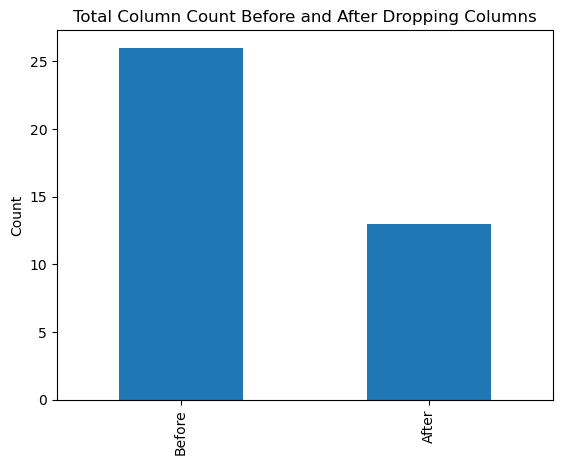

In [55]:
# Get column counts
count_before = dvdf3_before.shape[1]
count_after = dvdf3_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

Now we can create dataset for scenario 1:

In [56]:
# Filtering 'Country_Code', 'Motor_energy_type' and '2022_value'
columns_to_select = ['Country_code', 'Motor_energy_type', '2022_value']
dvdf3a = dvdf3.loc[dvdf3['Country_code'].isin(['IE', 'AT']), columns_to_select].reset_index(drop=True)
dvdf3a = pd.crosstab(dvdf3a['Motor_energy_type'], dvdf3a['Country_code'], values=dvdf3a['2022_value'], aggfunc='sum', margins=False)
dvdf3a

Country_code,AT,IE
Motor_energy_type,,
Diesel,61537.0,31336.0
Electric,34165.0,15872.0
Petroleum,119271.0,59687.0


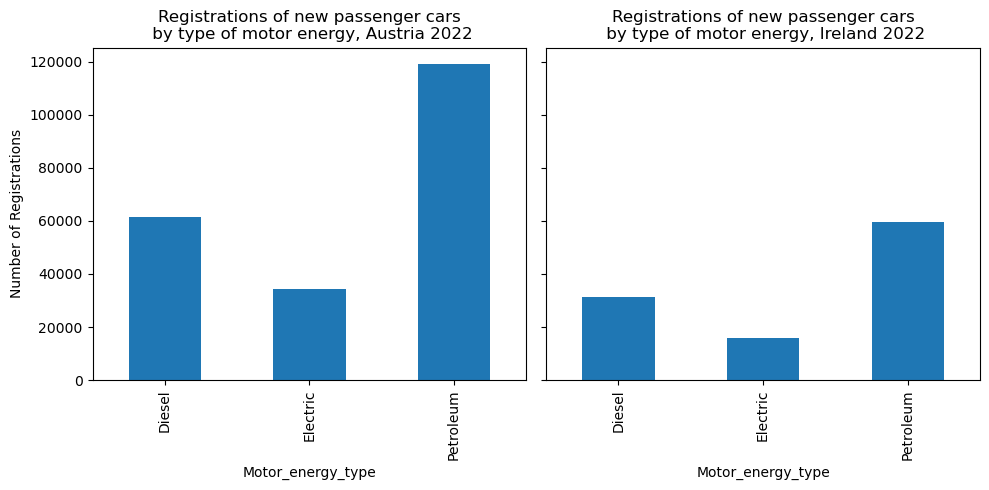

In [57]:
# Plotting histograms with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Plot for Austria
dvdf3a['AT'].plot(kind='bar', ax=axes[0], title='Registrations of new passenger cars\n by type of motor energy, Austria 2022')
axes[0].set_ylabel('Number of Registrations')

# Plot for Ireland
dvdf3a['IE'].plot(kind='bar', ax=axes[1], title='Registrations of new passenger cars\n by type of motor energy, Ireland 2022')
axes[1].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()


If we refer to `CA2_Statistics_Code_sba23021.ipynb`, we can observe that `H0` is rejected. One issue with this dataset is the impossibility of making H0 true. I had to manually change values to `AT` to demonstrate that we can accept `H0` for the `Chi-Squared test`.

In [58]:
# Manually changing values for AT
dvdf3b = {
    'Country_code': ['AT', 'IE', 'AT', 'IE', 'AT', 'IE'],
    'Motor_energy_type': ['Diesel', 'Diesel', 'Electric', 'Electric', 'Petroleum', 'Petroleum'],
    '2022_value': [31680.0, 31336.0, 16530.0, 15872.0, 60451.0, 59687.0]
}

dvdf3b = pd.DataFrame(dvdf3b)

dvdf3b = pd.crosstab(dvdf3b['Motor_energy_type'], dvdf3b['Country_code'], values=dvdf3b['2022_value'], aggfunc='sum', margins=False)
dvdf3b

Country_code,AT,IE
Motor_energy_type,,
Diesel,31680.0,31336.0
Electric,16530.0,15872.0
Petroleum,60451.0,59687.0


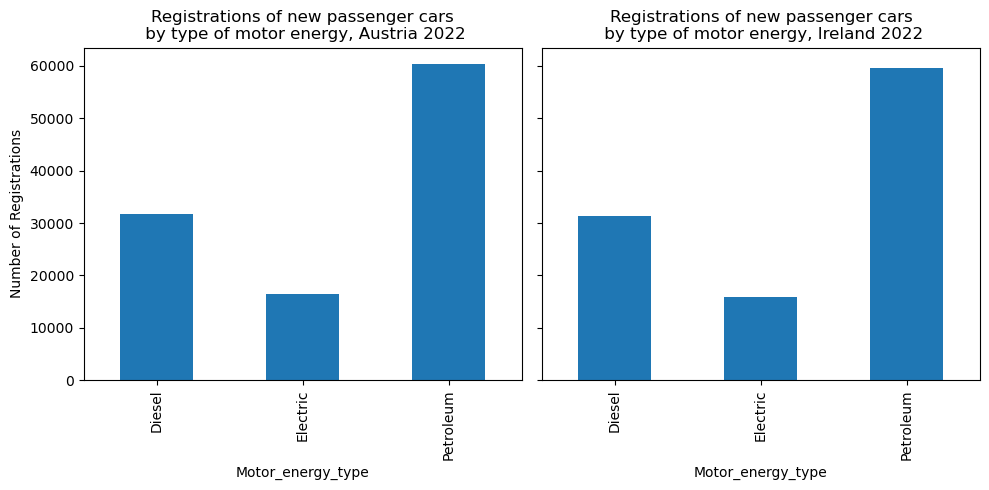

In [59]:
# Plotting histograms with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Plot for Austria
dvdf3b['AT'].plot(kind='bar', ax=axes[0], title='Registrations of new passenger cars\n by type of motor energy, Austria 2022')
axes[0].set_ylabel('Number of Registrations')

# Plot for Ireland
dvdf3b['IE'].plot(kind='bar', ax=axes[1], title='Registrations of new passenger cars\n by type of motor energy, Ireland 2022')
axes[1].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()


This is how `EDA` helped in adjusting this dataset for the `Chi-Squared test`.

# dvdf4

In [60]:
# Passengers transported (Railway transport)
# Unit of measure: Thousand passengers
# https://ec.europa.eu/eurostat/databrowser/view/rail_pa_total/default/table?lang=en
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf4 = eurostat.get_data_df('rail_pa_total',True)                                                                 
dvdf4.head()

,freq,unit,geo\TIME_PERIOD,2004_value,2004_flag,2005_value,2005_flag,2006_value,2006_flag,2007_value,2007_flag,2008_value,2008_flag,2009_value,2009_flag,2010_value,2010_flag,2011_value,2011_flag,2012_value,2012_flag,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,2016_value,2016_flag,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag
0,A,MIO_PKM,AT,8274.0,,8685.0,,8907.0,,9167.0,,10365.0,,10184.0,,10263.0,,10778.0,,11211.0,,11804.0,,11981.0,,12104.0,,12497.0,,12562.0,,13122.0,,13252.0,,7375.0,,8447.0,,12855.0,
1,A,MIO_PKM,BA,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,35.0,,34.0,,24.0,,29.0,,39.0,,56.0,,14.0,,18.0,,31.0,
2,A,MIO_PKM,BE,9225.0,,8510.0,,8964.0,,9403.0,,10139.0,,10237.0,,10498.0,,10669.0,,NaN,:,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c,NaN,: c
3,A,MIO_PKM,BG,NaN,:,NaN,:,2411.0,,2404.0,,2317.0,,2138.0,,2090.0,,2059.0,,1870.0,,1821.0,,1698.0,,1549.0,,1455.0,,1434.0,,1476.0,,1520.0,,1118.0,,1203.0,,1600.0,
4,A,MIO_PKM,CH,NaN,:,NaN,:,NaN,:,NaN,:,17699.0,,18497.0,,19093.0,,19387.0,,19180.0,,19368.0,,19934.0,,20228.0,,20657.0,,20707.0,,20451.0,,21559.0,,13261.0,,14223.0,,19201.0,


In [61]:
# Column count before tidying the dataset:
dvdf4_before = dvdf4.copy()

Original dataset attributes:

In [62]:
dvdf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             69 non-null     object 
 1   unit             69 non-null     object 
 2   geo\TIME_PERIOD  69 non-null     object 
 3   2004_value       56 non-null     float64
 4   2004_flag        69 non-null     object 
 5   2005_value       56 non-null     float64
 6   2005_flag        69 non-null     object 
 7   2006_value       61 non-null     float64
 8   2006_flag        69 non-null     object 
 9   2007_value       61 non-null     float64
 10  2007_flag        69 non-null     object 
 11  2008_value       58 non-null     float64
 12  2008_flag        69 non-null     object 
 13  2009_value       59 non-null     float64
 14  2009_flag        69 non-null     object 
 15  2010_value       58 non-null     float64
 16  2010_flag        69 non-null     object 
 17  2011_value       5

In [63]:
# Tyding up dvdf4

# Filter columns that do not contain '_flag'
dvdf4 = dvdf4.filter(regex='^(?!.*_flag)')

# Filtering by 'THS_PAS' Thousand passengers
dvdf4 = dvdf4[(dvdf4['unit'] == 'THS_PAS')].reset_index(drop=True)

# Renaming columns
dvdf4 = dvdf4 .rename(columns={'geo\TIME_PERIOD': 'Country_Code'})


#Dropping not needed columns:
dvdf4 = dvdf4.drop(['freq', 'unit'], axis=1).reset_index(drop=True)

# Multiplying each value by 1000
dvdf4.iloc[:, 1:] = dvdf4.iloc[:, 1:] * 1000
dvdf4.head()

,Country_Code,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,AT,215083000.0,220116000.0,223931000.0,228488000.0,236789000.0,237658000.0,239974000.0,241526000.0,260518000.0,271888000.0,270913000.0,280060000.0,286990000.0,288503000.0,307647000.0,314892000.0,191272000.0,217501000.0,292479000.0
1,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528000.0,512000.0,418000.0,472000.0,549000.0,657000.0,181000.0,250000.0,442000.0
2,BE,184033000.0,180431000.0,190865000.0,201054000.0,213934000.0,217639000.0,223198000.0,228753000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BG,NaN,NaN,34089000.0,33242000.0,33724000.0,31348000.0,30079000.0,29287000.0,26508000.0,26059000.0,24615000.0,22518000.0,21425000.0,21195000.0,21329000.0,21329000.0,16808000.0,17142000.0,23065000.0
4,CH,NaN,NaN,NaN,NaN,460629000.0,471006000.0,492162000.0,511770000.0,513860000.0,540352000.0,567049000.0,582889000.0,602659000.0,607941000.0,607567000.0,635595000.0,402610000.0,420912000.0,536207000.0


In [64]:
# Column count after tidying the dataset:
dvdf4_after = dvdf4.copy()

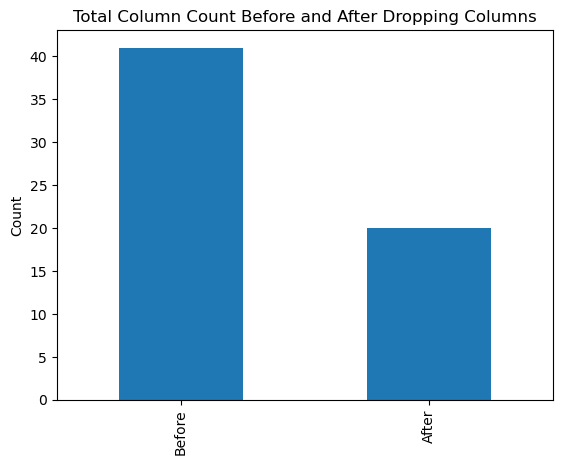

In [65]:
# Get column counts
count_before = dvdf4_before.shape[1]
count_after = dvdf4_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

In [66]:
# We need to organise dvdf4, basically I want to have 'Year', 'Country_Code' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf4.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf4.iterrows():
            value = row[col]
            Country_Code = row['Country_Code']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Code': Country_Code,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CC_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CC_V_df = Y_CC_V_df.pivot_table(index=['Year', 'Country_Code'], columns='Category', values='Value').reset_index()
Y_CC_V_df = Y_CC_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf4 = Y_CC_V_df.copy() #Reusing variable dvdf4

# Please only two decimals in the output!!
# This line will give us just two decimals for every pd dataframe displayed
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

dvdf4.head()

,Year,Country_Code,value
0,2004,AT,215083000.00
1,2004,BE,184033000.00
2,2004,CZ,180282000.00
3,2004,DE,2091268000.00
4,2004,DK,168552000.00


In [67]:
# Pivot the DataFrame
dvdf4 = dvdf4.pivot(index='Year', columns='Country_Code', values='value').reset_index()
dvdf4 = dvdf4.rename_axis(None, axis=1)
dvdf4.head()

,Year,AT,BA,BE,BG,CH,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,IE,IT,LI,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,SE,SI,SK,TR,UK
0,2004,215083000.00,NaN,184033000.00,NaN,NaN,180282000.00,2091268000.00,168552000.00,5274000.00,9483000.00,593847000.00,60134000.00,943899000.00,36600000.00,159991000.00,34555000.00,728177000.00,119000.00,6282000.00,13520000.00,23825000.00,NaN,NaN,326953000.00,50650000.00,265677000.00,152786000.00,99433000.00,146615000.00,14455000.00,50325000.00,76756000.00,1069673000.00
1,2005,220116000.00,NaN,180431000.00,NaN,NaN,180266000.00,2130469000.00,171377000.00,5159000.00,9959000.00,615685000.00,63493000.00,983766000.00,39706000.00,153508000.00,37655000.00,759863000.00,120000.00,6081000.00,13937000.00,25915000.00,NaN,NaN,339020000.00,52559000.00,251383000.00,151384000.00,92424000.00,150058000.00,15402000.00,50458000.00,76306000.00,1103610000.00
2,2006,223931000.00,NaN,190865000.00,34089000.00,NaN,183027000.00,2228926000.00,174573000.00,5302000.00,9520000.00,628832000.00,63803000.00,1021931000.00,46044000.00,156628000.00,43352000.00,753536000.00,121000.00,5489000.00,14793000.00,27387000.00,NaN,NaN,347831000.00,54695000.00,254777000.00,150365000.00,94441000.00,159067000.00,15750000.00,48438000.00,77414000.00,1156726000.00
3,2007,228488000.00,NaN,201054000.00,33242000.00,NaN,184184000.00,2226952000.00,174940000.00,5442000.00,13212000.00,620421000.00,66685000.00,1065423000.00,62973000.00,149551000.00,45511000.00,774480000.00,97000.00,4478000.00,16442000.00,27380000.00,NaN,NaN,368034000.00,56808000.00,265995000.00,156712000.00,88263000.00,169061000.00,15716000.00,46984000.00,81260000.00,1238186000.00
4,2008,236789000.00,NaN,213934000.00,33724000.00,460629000.00,177257000.00,2336683000.00,179750000.00,5285000.00,16050000.00,614514000.00,69937000.00,1093033000.00,70800000.00,144900000.00,44647000.00,802440000.00,97000.00,4447000.00,17676000.00,26702000.00,NaN,NaN,NaN,59071000.00,272859000.00,158455000.00,78252000.00,178929000.00,16257000.00,48655000.00,79187000.00,1304120000.00


In [68]:
# passing the stats into 'dvdf4a' dataframe
dvdf4a = (dvdf4.describe(include='all').T).drop(['unique', 'top','freq'], axis=1).reset_index().rename_axis(None, axis=1).sort_values(by='mean',ascending=False).copy()
# Dropping first row we don't need Years we already now that year range goes from 2004 to 2022
dvdf4a = dvdf4a.drop(0)

# Resetting index
dvdf4a = dvdf4a.reset_index(drop=True)

# Renaming columns
dvdf4a = dvdf4a.rename(columns={'index': 'Country_Code'})

# Selecting 19 count mannwhitneyu doesn't works with NaN values

dvdf4a = dvdf4a[dvdf4a['count']==19].copy().reset_index(drop=True)
dvdf4a

,Country_Code,count,mean,std,min,25%,50%,75%,max
0,DE,19.00,2435510421.05,348562794.04,1752198000.00,2227939000.00,2505856000.00,2688994000.00,2938023000.00
1,ES,19.00,567186789.47,73085068.54,333397000.00,563653000.00,578265000.00,608213000.00,634954000.00
2,AT,19.00,254012000.00,35018372.32,191272000.00,226209500.00,241526000.00,283525000.00,314892000.00
3,SE,19.00,194962421.05,34226882.83,146615000.00,169112000.00,187055000.00,217689500.00,264603000.00
4,DK,19.00,192727947.37,35356950.00,133900000.00,174756500.00,194428000.00,206583500.00,301567000.00
5,CZ,19.00,172839210.53,16153008.21,129308000.00,170184500.00,176146000.00,181503000.00,193569000.00
6,PT,19.00,143999052.63,17963904.96,102247000.00,131316500.00,149189000.00,153395500.00,175511000.00
7,FI,19.00,71082315.79,10017881.55,55009000.00,65244000.00,68950000.00,76020500.00,92801000.00
8,RO,19.00,70537842.11,13905438.20,50559000.00,62621500.00,66500000.00,74358000.00,99433000.00
9,NO,19.00,62169263.16,11226349.71,41401000.00,55751500.00,59384000.00,71951000.00,80402000.00


Now we can establish the different scenarios for the `U-Mann Whitney` test.

●	**Taking into consideration the tasks required in the machine learning section, use appropriate data cleaning, engineering, extraction and/or other techniques to structure and enrich your data. Rationalize your decisions and implementation, including evidence of how your process has addressed the problems identified in the EDA (Exploratory Data Analysis) stage and how your structured data will assist in the analysis stage.<br> This should include visualizations to illustrate your work and evidence to support your methodology.** [0-30]<br>
## Answer

## Supervised Learning

In [69]:
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf5 = eurostat.get_data_df('TRAN_HV_PSMOD',True)                                                                 
dvdf5.head()
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

dvdf5.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,1993_value,1993_flag,1994_value,1994_flag,1995_value,1995_flag,1996_value,1996_flag,1997_value,1997_flag,1998_value,1998_flag,1999_value,1999_flag,2000_value,2000_flag,2001_value,2001_flag,2002_value,2002_flag,2003_value,2003_flag,2004_value,2004_flag,2005_value,2005_flag,2006_value,2006_flag,2007_value,2007_flag,2008_value,2008_flag,2009_value,2009_flag,2010_value,2010_flag,2011_value,2011_flag,2012_value,2012_flag,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,2016_value,2016_flag,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.00,,10.60,,10.50,,10.70,,10.60,,10.90,,10.70,,10.90,,10.90,,10.70,,11.00,,10.90,,10.90,,10.90,,11.00,,10.50,,10.40,,10.80,,10.00,e,9.10,e,9.30,e,9.40,e,10.00,,9.90,,9.90,,9.90,,9.90,,10.00,,9.50,be,9.70,e,9.30,e,9.00,e
1,A,PC,BUS_TOT,BE,10.60,e,10.70,e,10.70,e,10.90,e,11.80,e,11.30,e,11.30,e,11.10,e,11.00,e,10.90,e,10.80,e,11.00,e,11.70,e,13.00,e,13.20,e,13.00,b,13.20,,14.30,,14.40,,13.30,,12.30,,12.80,,12.50,be,15.20,e,11.50,be,11.00,e,10.50,e,10.20,e,10.30,e,10.40,e,8.20,e,8.20,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,29.30,e,25.30,e,24.00,e,24.50,e,21.90,e,31.40,e,32.00,e,33.40,e,28.10,e,25.00,e,24.30,e,22.70,e,21.80,e,20.80,e,16.80,e,16.40,e,15.90,e,14.80,e,14.00,e,15.10,e,14.60,e,14.10,e,13.10,e,12.00,e,13.00,e,8.60,e,8.00,e
3,A,PC,BUS_TOT,CH,3.70,,3.90,,4.00,,3.90,,4.00,,3.80,,3.60,,3.60,,5.30,,5.20,,5.20,,5.20,,5.10,,5.20,,5.20,,5.30,,5.60,,5.50,,5.20,,5.10,,5.10,,5.70,,5.70,,5.70,e,5.80,e,5.90,e,5.90,e,5.90,e,5.90,e,6.10,e,5.80,e,5.90,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,22.70,e,22.90,e,22.60,e,22.30,e,22.10,e,22.30,e,22.50,e,22.60,e,23.60,e,21.20,e,20.80,e,20.40,e,19.70,e,18.80,e,17.60,e,18.10,e,18.30,e,18.70,e,18.50,e,18.20,e,18.70,e,18.60,e,19.00,e,18.90,e,18.50,e,12.60,e,12.70,e


In [70]:
# Tyding up dvdf5

# Filter columns that do not contain '_flag'
dvdf5 = dvdf5.filter(regex='^(?!.*_flag)')

# Renaming columns
dvdf5 = dvdf5.rename(columns={'geo\\TIME_PERIOD': 'Country_code','vehicle':'Vehicle_type'})

# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Country_code' we don't need 'EU27_2020' and 'EU28'
dvdf5 = dvdf5[(dvdf5['Vehicle_type'] != 'TRN_BUS_TOT_AVD') & ~dvdf5['Country_code'].isin(['EU27_2020', 'EU28'])]

# Drop rows with null values
dvdf5 = dvdf5.dropna()

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
dvdf5 = dvdf5.drop(['freq', 'unit'], axis=1).reset_index(drop=True)

# Trimming 'BUS_TOT' to have just 'BUS'
dvdf5['Vehicle_type'] = dvdf5['Vehicle_type'].str.replace('_TOT', '')

# Concatenate 'Country_code' and 'Vehicle_type'
dvdf5['Country_Vehicle'] = dvdf5['Country_code'] + '_' + dvdf5['Vehicle_type']

# Drop the original columns
dvdf5 = dvdf5.drop(['Vehicle_type', 'Country_code'], axis=1)

dvdf5.head()

,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Country_Vehicle
0,11.00,10.60,10.50,10.70,10.60,10.90,10.70,10.90,10.90,10.70,11.00,10.90,10.90,10.90,11.00,10.50,10.40,10.80,10.00,9.10,9.30,9.40,10.00,9.90,9.90,9.90,9.90,10.00,9.50,9.70,9.30,9.00,AT_BUS
1,10.60,10.70,10.70,10.90,11.80,11.30,11.30,11.10,11.00,10.90,10.80,11.00,11.70,13.00,13.20,13.00,13.20,14.30,14.40,13.30,12.30,12.80,12.50,15.20,11.50,11.00,10.50,10.20,10.30,10.40,8.20,8.20,BE_BUS
2,3.70,3.90,4.00,3.90,4.00,3.80,3.60,3.60,5.30,5.20,5.20,5.20,5.10,5.20,5.20,5.30,5.60,5.50,5.20,5.10,5.10,5.70,5.70,5.70,5.80,5.90,5.90,5.90,5.90,6.10,5.80,5.90,CH_BUS
3,9.10,8.50,8.30,8.10,7.30,7.20,7.10,7.10,7.00,6.90,7.10,6.90,6.70,6.80,6.70,6.70,6.60,6.50,6.30,6.10,6.00,7.30,7.10,7.20,7.20,7.40,7.30,7.30,7.20,7.40,4.80,4.80,DE_BUS
4,11.30,11.10,15.20,15.30,15.50,16.60,17.40,16.90,14.10,13.90,14.00,14.00,14.00,11.60,11.40,11.40,9.90,9.70,9.70,10.40,10.50,10.10,9.80,9.80,9.80,9.80,9.80,10.00,9.60,9.20,6.80,7.10,DK_BUS


In [71]:
# We need to organise dvdf5, basically I want to have 'Year', 'Country_Vehicle' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf5.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf5.iterrows():
            value = row[col]
            country_vehicle = row['Country_Vehicle']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Vehicle': country_vehicle,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CV_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CV_V_df = Y_CV_V_df.pivot_table(index=['Year', 'Country_Vehicle'], columns='Category', values='Value').reset_index()
Y_CV_V_df = Y_CV_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf5 = Y_CV_V_df.copy() #Reusing variable dvdf5

dvdf5.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.00
1,1990,AT_CAR,77.10
2,1990,AT_TRN,11.90
3,1990,BE_BUS,10.60
4,1990,BE_CAR,83.30


In [72]:
dvdf5.shape

(1728, 3)

In [73]:
# Dataset will be used in the second part of this section
dvdf6 = dvdf5.copy() 

In [74]:
# Creating dvdf5a for stats

dvdf5a = dvdf5.copy()

In [75]:
# Pivot the DataFrame
dvdf5a = dvdf5a.pivot(index='Year', columns='Country_Vehicle', values='value').reset_index()
dvdf5a = dvdf5a.rename_axis(None, axis=1)
dvdf5a.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.00,77.10,11.90,10.60,83.30,6.10,3.70,82.10,14.20,9.10,85.40,5.40,11.30,82.40,6.30,32.40,64.00,3.60,14.90,78.10,6.90,13.50,81.20,5.30,6.00,84.80,9.30,24.80,60.50,14.70,11.50,84.90,3.60,12.90,80.20,6.90,10.20,85.30,4.40,8.10,85.10,6.90,28.20,41.30,30.50,18.40,71.50,10.10,9.50,84.10,6.50,30.60,62.70,6.70
1,1991,10.60,77.00,12.40,10.70,83.30,6.10,3.90,81.10,15.00,8.50,84.60,6.90,11.10,82.90,6.00,31.80,64.60,3.60,13.70,80.40,5.80,13.10,81.70,5.20,6.10,85.10,8.80,23.40,63.20,13.30,11.90,84.30,3.70,12.70,80.60,6.70,10.10,85.40,4.50,8.20,82.90,8.90,25.60,49.80,24.60,18.60,71.40,9.90,9.50,84.70,5.90,29.30,66.40,4.30
2,1992,10.50,77.00,12.50,10.70,83.30,6.00,4.00,81.40,14.60,8.30,85.00,6.80,15.20,79.00,5.80,32.20,64.30,3.50,13.20,80.80,6.00,13.00,82.00,5.00,5.80,85.60,8.60,22.90,63.90,13.20,12.30,84.20,3.50,11.60,82.30,6.10,10.10,84.90,5.00,6.80,84.00,9.20,24.40,55.30,20.30,22.70,68.20,9.00,9.40,84.80,5.80,23.00,73.90,3.00
3,1993,10.70,77.20,12.10,10.90,83.30,5.90,3.90,80.90,15.20,8.10,84.50,7.30,15.30,76.70,8.00,31.70,65.40,2.90,13.20,81.40,5.40,13.20,81.90,5.00,5.80,86.20,8.00,23.20,64.50,12.40,12.60,83.80,3.60,11.20,82.90,5.90,9.80,85.20,5.00,6.50,85.10,8.40,28.00,54.20,17.70,19.30,72.20,8.50,9.30,84.40,6.30,21.10,75.80,3.10
4,1994,10.60,77.80,11.60,11.80,82.60,5.60,4.00,79.80,16.20,7.30,85.80,6.90,15.50,76.40,8.10,31.10,66.70,2.20,13.00,81.90,5.10,13.20,81.80,5.00,5.70,86.50,7.80,23.50,64.30,12.20,13.60,83.00,3.40,11.00,83.00,6.00,9.80,84.90,5.30,7.10,85.40,7.50,26.40,57.90,15.60,17.90,74.30,7.80,9.30,84.40,6.30,20.40,76.60,3.00


In [76]:
# Dataset for Unsupervised ML models
dvdf7 = dvdf5a.copy()

In [77]:
# dvdf5a.describe(include='all').T # Transposing columns to see each Country_Vehicle
# passing the stats into 'dvdf5a' dataframe
dvdf5a = (dvdf5a.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
dvdf5a = dvdf5a.drop(0)

# Renaming columns
dvdf5a = dvdf5a.rename(columns={'index': 'Country_Vehicle'}).drop(['unique', 'top','freq','count','std','25%','50%','75%','max','min'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)

dvdf5a

,Country_Vehicle,mean
0,NL_CAR,86.12
1,FR_CAR,85.38
2,DE_CAR,85.35
3,LU_CAR,84.58
4,PT_CAR,84.52
5,FI_CAR,83.88
6,SE_CAR,83.50
7,IE_CAR,82.85
8,SI_CAR,82.72
9,IT_CAR,82.16


Why am I selecting `Hungary`? Please refer to the `Programming Annex Testing`; I've tested all countries, and `Hungary` was offering the best results for these `ML` models.

In [78]:
def highlight_countries(row):
    styles = [''] * len(row)
    
    # Highlight 'IE' in yellow
    if row['Country_Vehicle'].startswith('IE'):
        styles = ['background-color: yellow'] * len(row)
    
    # Highlight 'HU' in lightgreen
    elif row['Country_Vehicle'].startswith('HU'):
        styles = ['background-color: lightgreen'] * len(row)
    
    return styles

# Apply the highlighting function to the DataFrame
dvdf5a = dvdf5a.style.apply(highlight_countries, axis=1)

dvdf5a

,Country_Vehicle,mean
0,NL_CAR,86.121875
1,FR_CAR,85.378125
2,DE_CAR,85.346875
3,LU_CAR,84.575000
4,PT_CAR,84.515625
5,FI_CAR,83.878125
6,SE_CAR,83.496875
7,IE_CAR,82.850000
8,SI_CAR,82.718750
9,IT_CAR,82.156250


In [79]:
# Modify the code to filter based on substrings
dvdf5 = dvdf5[dvdf5['Country_Vehicle'].str.contains('IE|HU', case=False, na=False)]
dvdf5.reset_index(drop=True, inplace=True)

In [80]:
dvdf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             192 non-null    object 
 1   Country_Vehicle  192 non-null    object 
 2   value            192 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [81]:
# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Country_Vehicle' column
dvdf5['Country_Vehicle'] = le.fit_transform(dvdf5['Country_Vehicle'])
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
dvdf5

,Year,Country_Vehicle,value
0,1990,0,24.80
1,1990,1,60.50
2,1990,2,14.70
3,1990,3,11.50
4,1990,4,84.90
...,...,...,...
187,2021,1,79.30
188,2021,2,6.40
189,2021,3,13.00
190,2021,4,85.70


In [82]:
dvdf5

,Year,Country_Vehicle,value
0,1990,0,24.80
1,1990,1,60.50
2,1990,2,14.70
3,1990,3,11.50
4,1990,4,84.90
...,...,...,...
187,2021,1,79.30
188,2021,2,6.40
189,2021,3,13.00
190,2021,4,85.70


In [83]:
# Move the 'Year' column to the second position
dvdf5.insert(1, 'Year', dvdf5.pop('Year'))

In [84]:
# Counting the values that each year has:
year_counts = dvdf5['Year'].value_counts().sort_index()
year_counts

Year
1990    6
1991    6
1992    6
1993    6
1994    6
1995    6
1996    6
1997    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2019    6
2020    6
2021    6
Name: count, dtype: int64

In [85]:
dvdf5

,Country_Vehicle,Year,value
0,0,1990,24.80
1,1,1990,60.50
2,2,1990,14.70
3,3,1990,11.50
4,4,1990,84.90
...,...,...,...
187,1,2021,79.30
188,2,2021,6.40
189,3,2021,13.00
190,4,2021,85.70


In [86]:
X = dvdf5.iloc[:, [1,2]].values # Dependent variables
y = dvdf5.iloc[:, 0].values # Target variable

I'm going to focus on the `GridsearchCV` part because the poor results are what led me to consider enriching the dataset. The aim is to achieve a higher score with an increased `Gamma` and, consequently, to have a less overfitted model.

# Parameter tunning GridSearch

In [87]:
# scaling the features

X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Model Building

In [88]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [89]:
# Saving values into new variables to reproduce results in 4.5.Table and Conclusions

y_test1 = y_test
y_pred1 = y_pred

In [90]:
# Printing classification report
print(classification_report(y_test, y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

svc = metrics.accuracy_score(y_test, y_pred)*100

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='weighted'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      1.00      1.00         5
           2       0.22      0.50      0.31         4
           3       0.00      0.00      0.00        10
           4       1.00      1.00      1.00         8
           5       0.67      1.00      0.80         4

    accuracy                           0.69        39
   macro avg       0.60      0.75      0.66        39
weighted avg       0.57      0.69      0.62        39

accuracy 0.6923076923076923
precision 0.5736855736855737
recall 0.6923076923076923


## Grid Search to Find Optimal Hyperparameters

In [91]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]#,
                


# specify model
model = SVC(kernel = "rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 4, # Changing verbose from 1 to 4, to display records :)
                        return_train_score = True)      

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=1, gamma=0.01;, score=(train=0.533, test=0.387) total time=   0.0s
[CV 2/5] END C=1, gamma=0.01;, score=(train=0.377, test=0.290) total time=   0.0s
[CV 3/5] END C=1, gamma=0.01;, score=(train=0.361, test=0.355) total time=   0.0s
[CV 4/5] END C=1, gamma=0.01;, score=(train=0.382, test=0.400) total time=   0.0s
[CV 5/5] END C=1, gamma=0.01;, score=(train=0.472, test=0.267) total time=   0.0s
[CV 1/5] END C=1, gamma=0.001;, score=(train=0.197, test=0.129) total time=   0.0s
[CV 2/5] END C=1, gamma=0.001;, score=(train=0.205, test=0.097) total time=   0.0s
[CV 3/5] END C=1, gamma=0.001;, score=(train=0.189, test=0.161) total time=   0.0s
[CV 4/5] END C=1, gamma=0.001;, score=(train=0.220, test=0.200) total time=   0.0s
[CV 5/5] END C=1, gamma=0.001;, score=(train=0.195, test=0.100) total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001;, score=(train=0.197, test=0.129) total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=4)

In [92]:
## cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [93]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print('SVC:',svc)
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

SVC: 69.23076923076923
The best test score is 0.9088172043010753 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


Gamma = 0.01 overfitted model <br>

Gamma=0.001 less overfitted model <br>

Gamma=0.0001 fitten model <br>

This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)

# Conclusion:
We can see that Gamma = 0.0001 Graph is at around 60% accuracy whereas Gamma Graps at 0.01 and 0.001 are hiting 80% accuracy and above. This model is overfitted.

# Increasing dataset to get higher accuracy at Gamma = 0.0001.

In [94]:
# Modify the code to filter based on substrings
dvdf6 = dvdf6[dvdf6['Country_Vehicle'].str.contains('IE|HU', case=False, na=False)]
dvdf6.reset_index(drop=True, inplace=True)

In [95]:
def break_into_quarters(row):
    # Define the fixed weights for quarters
    weights = [0.23, 0.27,0.24 , 0.26] # weights = 1

    # Create a dataframe to store the result
    quarter_df = pd.DataFrame({'Quarter': range(1, 5),
                              'Weight': weights})

    # Calculate the value for each quarter
    quarter_df['value'] = row['value'] * quarter_df['Weight']

    # Merge the result with the original row
    quarter_df['Country_Vehicle'] = row['Country_Vehicle']
    quarter_df['Year'] = row['Year']

    return quarter_df
# Apply the function to each row of the dataframe
dvdf6 = pd.concat(dvdf6.apply(break_into_quarters, axis=1).to_list(), ignore_index=True)

# Display the resulting dataframe
dvdf6

,Quarter,Weight,value,Country_Vehicle,Year
0,1,0.23,5.70,HU_BUS,1990
1,2,0.27,6.70,HU_BUS,1990
2,3,0.24,5.95,HU_BUS,1990
3,4,0.26,6.45,HU_BUS,1990
4,1,0.23,13.92,HU_CAR,1990
...,...,...,...,...,...
763,4,0.26,22.28,IE_CAR,2021
764,1,0.23,0.32,IE_TRN,2021
765,2,0.27,0.38,IE_TRN,2021
766,3,0.24,0.34,IE_TRN,2021


In [96]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['Quarter','Weight']
dvdf6.drop(df_col_drop ,axis=1, inplace=True) 

In [97]:
# Move the 'Year' column to the second position
dvdf6.insert(2, 'value', dvdf6.pop('value'))

In [98]:
dvdf6.head()

,Country_Vehicle,Year,value
0,HU_BUS,1990,5.70
1,HU_BUS,1990,6.70
2,HU_BUS,1990,5.95
3,HU_BUS,1990,6.45
4,HU_CAR,1990,13.92


In [99]:
# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Country_Vehicle' column
dvdf6['Country_Vehicle'] = le.fit_transform(dvdf6['Country_Vehicle'])
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
dvdf6

,Country_Vehicle,Year,value
0,0,1990,5.70
1,0,1990,6.70
2,0,1990,5.95
3,0,1990,6.45
4,1,1990,13.92
...,...,...,...
763,4,2021,22.28
764,5,2021,0.32
765,5,2021,0.38
766,5,2021,0.34


In [100]:
X = dvdf6.iloc[:, [1,2]].values # Dependent variables
y = dvdf6.iloc[:, 0].values # Target variable

# Parameter tunning GridSearch

In [101]:
# scaling the features

X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Model Building

In [102]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
# Saving values into new variables to reproduce results in 4.5.Table and Conclusions

y_test3 = y_test
y_pred3 = y_pred

In [104]:
# Printing classification report
print(classification_report(y_test, y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

svc = metrics.accuracy_score(y_test, y_pred)*100

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='weighted'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      0.97      0.95        30
           2       0.58      0.86      0.69        21
           3       0.91      0.43      0.59        23
           4       0.96      0.93      0.94        27
           5       0.88      1.00      0.94        23

    accuracy                           0.87       154
   macro avg       0.88      0.86      0.85       154
weighted avg       0.89      0.87      0.86       154

accuracy 0.8701298701298701
precision 0.8926938164474821
recall 0.8701298701298701


## Grid Search to Find Optimal Hyperparameters

In [105]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]#,
                


# specify model
model = SVC(kernel = "rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 4, # Changing verbose from 1 to 4, to display records :)
                        return_train_score = True)      

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=1, gamma=0.01;, score=(train=0.487, test=0.366) total time=   0.0s
[CV 2/5] END C=1, gamma=0.01;, score=(train=0.356, test=0.252) total time=   0.0s
[CV 3/5] END C=1, gamma=0.01;, score=(train=0.340, test=0.333) total time=   0.0s
[CV 4/5] END C=1, gamma=0.01;, score=(train=0.354, test=0.260) total time=   0.0s
[CV 5/5] END C=1, gamma=0.01;, score=(train=0.346, test=0.295) total time=   0.0s
[CV 1/5] END C=1, gamma=0.001;, score=(train=0.187, test=0.122) total time=   0.0s
[CV 2/5] END C=1, gamma=0.001;, score=(train=0.356, test=0.252) total time=   0.0s
[CV 3/5] END C=1, gamma=0.001;, score=(train=0.177, test=0.171) total time=   0.0s
[CV 4/5] END C=1, gamma=0.001;, score=(train=0.181, test=0.146) total time=   0.0s
[CV 5/5] END C=1, gamma=0.001;, score=(train=0.183, test=0.123) total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001;, score=(train=0.187, test=0.122) total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=4)

In [106]:
## cv results
cv_results1 = pd.DataFrame(model_cv.cv_results_)

In [107]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print('SVC:',svc)
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

SVC: 87.01298701298701
The best test score is 0.9104491536718646 corresponding to hyperparameters {'C': 1000, 'gamma': 0.001}


Best test score is 0.91 at Gamma = 0.001 and Gamma = 0.0001 is above 80% this by expanding the dataset the model is less overfitted, more fitted now!

**Summary:**

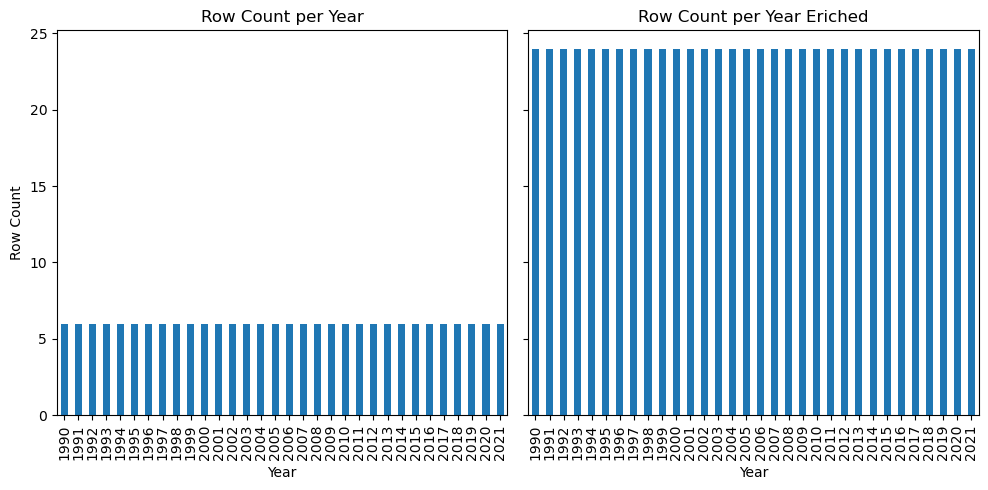

In [108]:
# Plotting histograms with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)


# Groupping by 'Year' and get the row count
yearly_counts = dvdf5.groupby('Year').size()

# Plot the results
yearly_counts.plot(kind='bar', ax=axes[0],xlabel='Year', title='Row Count per Year')
axes[0].set_ylabel('Row Count')




# Groupping by 'Year' and get the row count
yearly_counts1 = dvdf6.groupby('Year').size()

# Plot the results
yearly_counts1.plot(kind='bar', ax=axes[1], xlabel='Year', title='Row Count per Year Eriched')
axes[1].set_ylabel('Row Count')

plt.tight_layout()
plt.show()

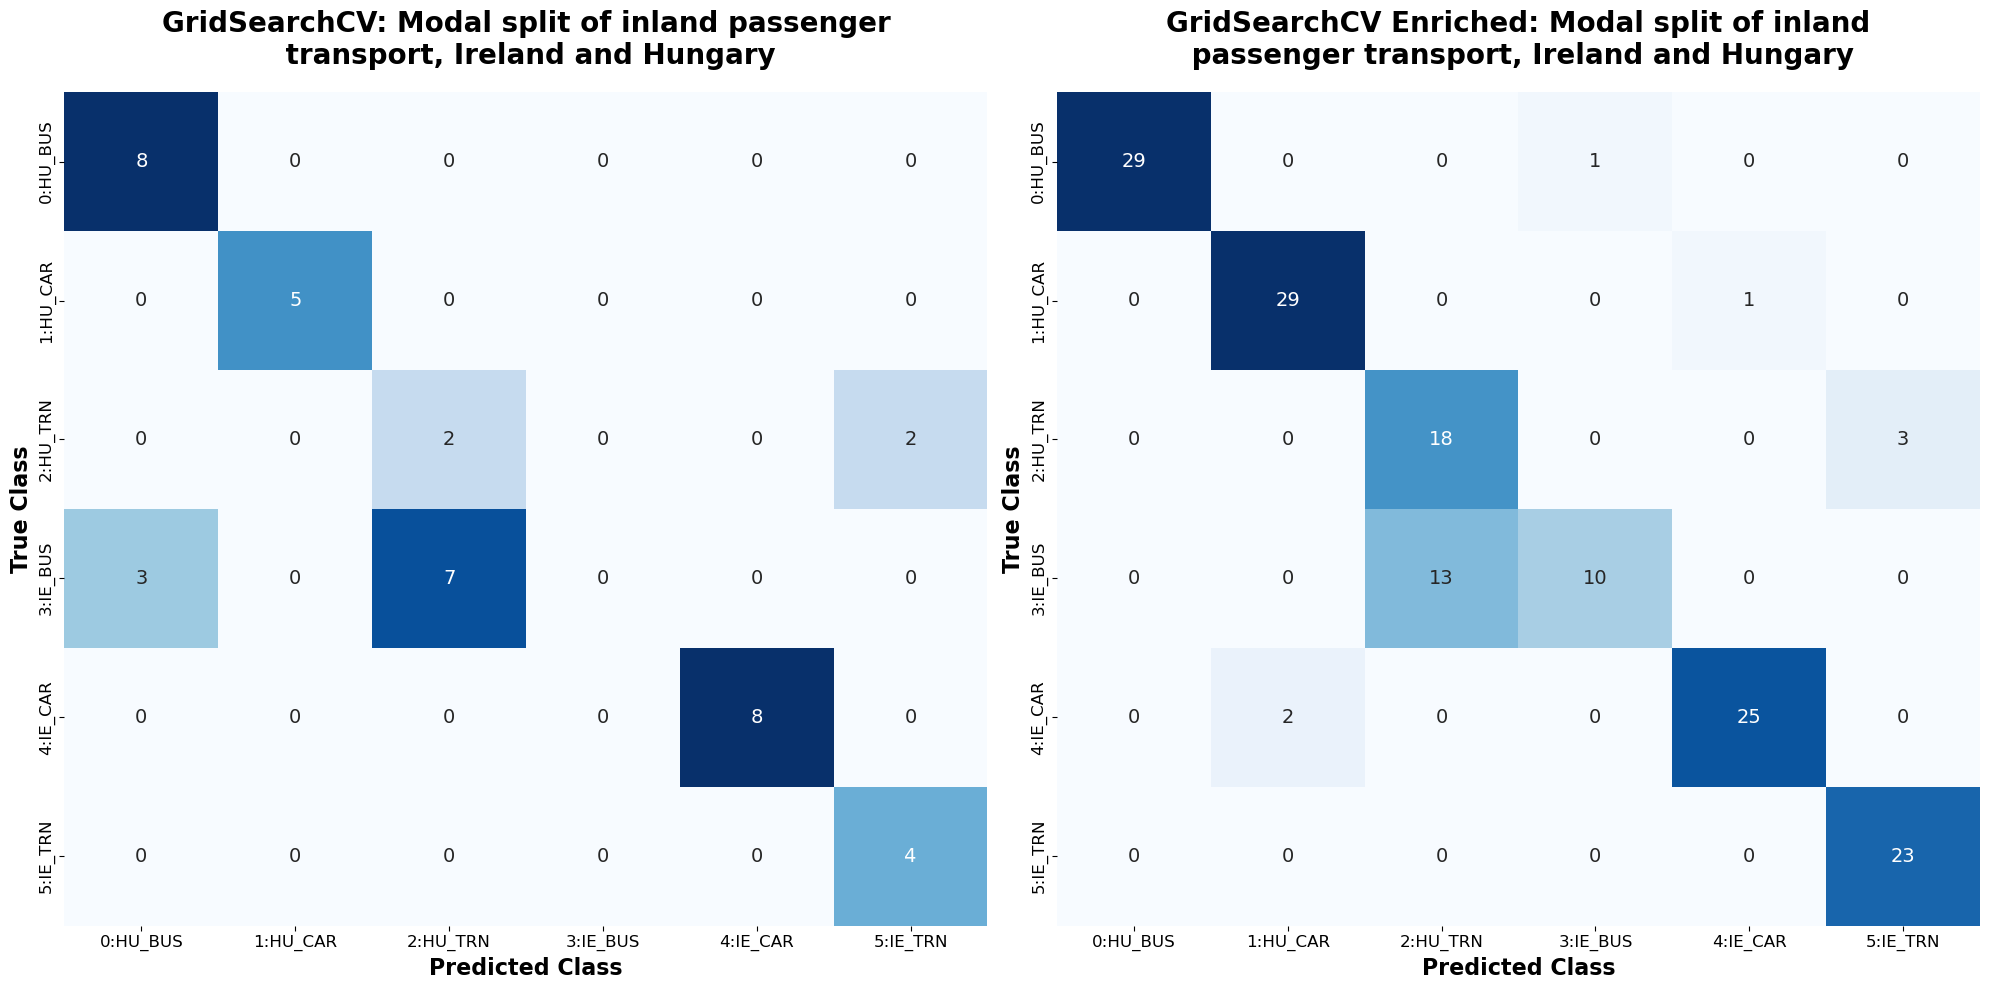

In [109]:
# Define class labels
class_labels = ['0:HU_BUS', '1:HU_CAR', '2:HU_TRN', '3:IE_BUS', '4:IE_CAR', '5:IE_TRN']


# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot on the left
confMtrx1 = metrics.confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(confMtrx1, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels, ax=axes[0],
            annot_kws={"size": 14})  # Adjust the font size here
axes[0].set_title('GridSearchCV: Modal split of inland passenger\n transport, Ireland and Hungary',
                  loc="center", pad=20, fontsize=20, fontweight="bold")
axes[0].set_xlabel('Predicted Class', fontsize=16, fontweight='bold')
axes[0].set_ylabel('True Class', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=12)

# Plot on the right
confMtrx3 = metrics.confusion_matrix(y_true=y_test3, y_pred=y_pred3)
sns.heatmap(confMtrx3, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels, ax=axes[1],
            annot_kws={"size": 14})  # Adjust the font size here
axes[1].set_title('GridSearchCV Enriched: Modal split of inland\n passenger transport, Ireland and Hungary',
                  loc="center", pad=20, fontsize=20, fontweight="bold")
axes[1].set_xlabel('Predicted Class', fontsize=16, fontweight='bold')
axes[1].set_ylabel('True Class', fontsize=16, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


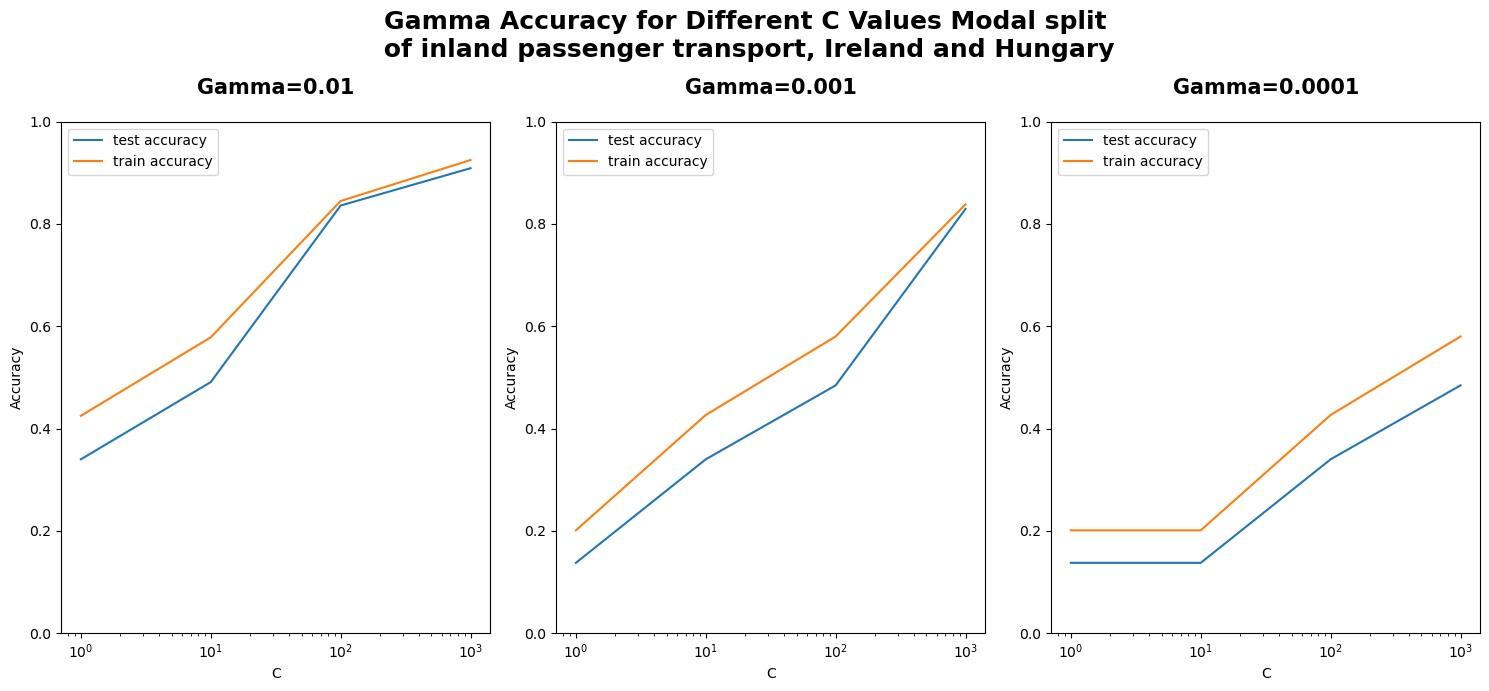

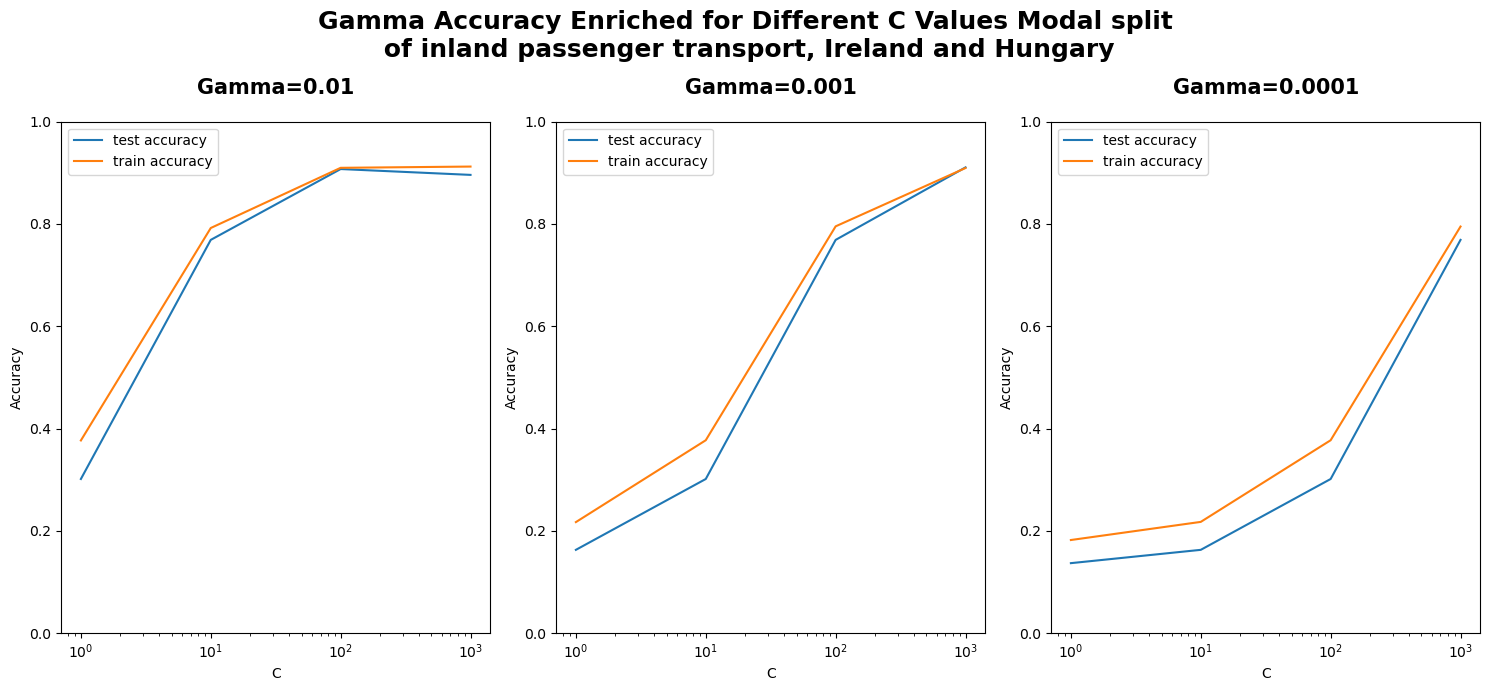

In [110]:
# GridSearchCV Plots:
# First set of plots
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(15,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# Add shared title for all subplots
plt.suptitle("Gamma Accuracy for Different C Values Modal split\n of inland passenger transport, Ireland and Hungary", fontweight="bold", fontsize=18)

plt.tight_layout()

plt.show()

# Second set of plots
# converting C to numeric type for plotting on x-axis
cv_results1['param_C'] = cv_results1['param_C'].astype('int')

# # plotting
plt.figure(figsize=(15,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results1[cv_results1['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results1[cv_results1['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results1[cv_results1['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# Add shared title for all subplots
plt.suptitle("Gamma Accuracy Enriched for Different C Values Modal split\n of inland passenger transport, Ireland and Hungary", fontweight="bold", fontsize=18)

plt.tight_layout()

plt.show()

In [111]:
# Table for summary:

# Creating figure x
output = {
    'Model': ['SVC', "GridSearchCV('C': 1000, 'gamma': 0.01})","GridSearchCV('C': 1000, 'gamma': 0.001})"],
    'Accuracy (%)': [69.23, 90.88,'N/A'],
    'Accuracy_Enriched (%)': [87.01,'N/A' ,91.04]
}

# Creating a DataFrame
GridSearchCV_Results = pd.DataFrame(output)
GridSearchCV_Results

,Model,Accuracy (%),Accuracy_Enriched (%)
0,SVC,69.23,87.01
1,"GridSearchCV('C': 1000, 'gamma': 0.01})",90.88,N/A
2,"GridSearchCV('C': 1000, 'gamma': 0.001})",N/A,91.04


## Cross validation and feature reduction.

In [112]:
dvdf7a = dvdf7.copy() # Dataset for Second part
dvdf7b = dvdf7.copy() # Dataset for Unsupervised ML Enriched

In [113]:
dvdf7

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.00,77.10,11.90,10.60,83.30,6.10,3.70,82.10,14.20,9.10,85.40,5.40,11.30,82.40,6.30,32.40,64.00,3.60,14.90,78.10,6.90,13.50,81.20,5.30,6.00,84.80,9.30,24.80,60.50,14.70,11.50,84.90,3.60,12.90,80.20,6.90,10.20,85.30,4.40,8.10,85.10,6.90,28.20,41.30,30.50,18.40,71.50,10.10,9.50,84.10,6.50,30.60,62.70,6.70
1,1991,10.60,77.00,12.40,10.70,83.30,6.10,3.90,81.10,15.00,8.50,84.60,6.90,11.10,82.90,6.00,31.80,64.60,3.60,13.70,80.40,5.80,13.10,81.70,5.20,6.10,85.10,8.80,23.40,63.20,13.30,11.90,84.30,3.70,12.70,80.60,6.70,10.10,85.40,4.50,8.20,82.90,8.90,25.60,49.80,24.60,18.60,71.40,9.90,9.50,84.70,5.90,29.30,66.40,4.30
2,1992,10.50,77.00,12.50,10.70,83.30,6.00,4.00,81.40,14.60,8.30,85.00,6.80,15.20,79.00,5.80,32.20,64.30,3.50,13.20,80.80,6.00,13.00,82.00,5.00,5.80,85.60,8.60,22.90,63.90,13.20,12.30,84.20,3.50,11.60,82.30,6.10,10.10,84.90,5.00,6.80,84.00,9.20,24.40,55.30,20.30,22.70,68.20,9.00,9.40,84.80,5.80,23.00,73.90,3.00
3,1993,10.70,77.20,12.10,10.90,83.30,5.90,3.90,80.90,15.20,8.10,84.50,7.30,15.30,76.70,8.00,31.70,65.40,2.90,13.20,81.40,5.40,13.20,81.90,5.00,5.80,86.20,8.00,23.20,64.50,12.40,12.60,83.80,3.60,11.20,82.90,5.90,9.80,85.20,5.00,6.50,85.10,8.40,28.00,54.20,17.70,19.30,72.20,8.50,9.30,84.40,6.30,21.10,75.80,3.10
4,1994,10.60,77.80,11.60,11.80,82.60,5.60,4.00,79.80,16.20,7.30,85.80,6.90,15.50,76.40,8.10,31.10,66.70,2.20,13.00,81.90,5.10,13.20,81.80,5.00,5.70,86.50,7.80,23.50,64.30,12.20,13.60,83.00,3.40,11.00,83.00,6.00,9.80,84.90,5.30,7.10,85.40,7.50,26.40,57.90,15.60,17.90,74.30,7.80,9.30,84.40,6.30,20.40,76.60,3.00
5,1995,10.90,77.20,12.00,11.30,82.90,5.80,3.80,82.30,13.90,7.20,85.40,7.40,16.60,75.70,7.70,30.70,66.90,2.40,13.00,82.00,5.00,13.10,81.70,5.20,5.60,86.80,7.50,23.60,64.40,12.00,13.60,83.00,3.40,11.70,82.40,5.90,9.80,85.00,5.20,7.00,85.40,7.60,19.90,64.60,15.50,16.40,76.50,7.10,9.30,84.10,6.60,19.50,77.60,2.80
6,1996,10.70,77.40,11.90,11.30,82.90,5.90,3.60,82.50,13.90,7.10,85.40,7.50,17.40,75.20,7.40,29.60,67.90,2.50,23.30,68.50,8.30,13.00,81.70,5.30,5.60,86.40,8.00,25.00,63.20,11.80,13.50,83.30,3.30,11.70,82.50,5.90,9.80,85.20,5.00,6.90,85.40,7.70,19.40,69.30,11.30,15.60,78.10,6.30,9.40,84.00,6.70,18.90,78.40,2.70
7,1997,10.90,79.00,10.10,11.10,83.00,5.90,3.60,82.50,13.90,7.10,85.30,7.60,16.90,75.30,7.80,28.50,68.90,2.60,22.50,69.00,8.50,12.60,82.00,5.30,5.50,86.40,8.10,24.00,64.10,11.90,13.30,83.30,3.40,11.70,82.70,5.60,9.70,85.10,5.10,6.80,85.20,8.00,17.90,71.30,10.80,13.90,80.00,6.10,9.40,83.90,6.70,18.20,79.20,2.60
8,1998,10.90,79.40,9.80,11.00,83.10,5.90,5.30,81.10,13.60,7.00,85.50,7.50,14.10,77.70,8.30,28.00,70.00,2.00,12.80,82.00,5.20,12.10,82.70,5.20,5.40,86.40,8.20,23.70,64.10,12.20,13.30,83.40,3.30,11.40,83.40,5.20,9.70,85.20,5.10,7.10,83.80,9.10,17.40,72.10,10.50,14.30,80.00,5.80,9.20,83.90,6.80,16.50,80.80,2.70
9,1999,10.70,79.60,9.60,10.90,83.10,6.00,5.20,81.00,13.80,6.90,85.70,7.50,13.90,78.00,8.10,26.50,71.50,2.00,12.90,82.00,5.10,11.50,83.30,5.20,5.20,86.60,8.20,24.10,63.00,12.90,13.30,83.40,3.30,11.50,83.00,5.40,9.80,84.90,5.30,6.70,84.30,9.00,16.80,72.30,10.90,13.70,81.10,5.20,9.00,83.90,7.10,16.70,80.80,2.50


In [114]:
# Groupping by 'Year' and get the row count
yearly_counts2 = dvdf7.groupby('Year').size()

In [115]:
# Filter columns for CAR
dvdf7_CAR = dvdf7.filter(['Year'] + [col for col in dvdf7.columns if '_CAR' in col])
# Move 'IE_CAR' column to the thrid position
dvdf7_CAR.insert(1, 'IE_CAR', dvdf7_CAR.pop('IE_CAR'))

# Filter columns for BUS
dvdf7_BUS = dvdf7.filter(['Year'] + [col for col in dvdf7.columns if '_BUS' in col])
# Move 'IE_CAR' column to the thrid position
dvdf7_BUS.insert(1, 'IE_BUS', dvdf7_BUS.pop('IE_BUS'))

# Filter columns for TRN
dvdf7_TRN = dvdf7.filter(['Year'] + [col for col in dvdf7.columns if '_TRN' in col])
# Move 'IE_CAR' column to the thrid position
dvdf7_TRN.insert(1, 'IE_TRN', dvdf7_TRN.pop('IE_TRN'))

In [116]:
dvdf7_CAR.head(4)

,Year,IE_CAR,AT_CAR,BE_CAR,CH_CAR,DE_CAR,DK_CAR,EL_CAR,ES_CAR,FI_CAR,FR_CAR,HU_CAR,IT_CAR,LU_CAR,NL_CAR,PL_CAR,PT_CAR,SE_CAR,SI_CAR
0,1990,84.90,77.10,83.30,82.10,85.40,82.40,64.00,78.10,81.20,84.80,60.50,80.20,85.30,85.10,41.30,71.50,84.10,62.70
1,1991,84.30,77.00,83.30,81.10,84.60,82.90,64.60,80.40,81.70,85.10,63.20,80.60,85.40,82.90,49.80,71.40,84.70,66.40
2,1992,84.20,77.00,83.30,81.40,85.00,79.00,64.30,80.80,82.00,85.60,63.90,82.30,84.90,84.00,55.30,68.20,84.80,73.90
3,1993,83.80,77.20,83.30,80.90,84.50,76.70,65.40,81.40,81.90,86.20,64.50,82.90,85.20,85.10,54.20,72.20,84.40,75.80


In [117]:
dvdf7_BUS.head(4)

,Year,IE_BUS,AT_BUS,BE_BUS,CH_BUS,DE_BUS,DK_BUS,EL_BUS,ES_BUS,FI_BUS,FR_BUS,HU_BUS,IT_BUS,LU_BUS,NL_BUS,PL_BUS,PT_BUS,SE_BUS,SI_BUS
0,1990,11.50,11.00,10.60,3.70,9.10,11.30,32.40,14.90,13.50,6.00,24.80,12.90,10.20,8.10,28.20,18.40,9.50,30.60
1,1991,11.90,10.60,10.70,3.90,8.50,11.10,31.80,13.70,13.10,6.10,23.40,12.70,10.10,8.20,25.60,18.60,9.50,29.30
2,1992,12.30,10.50,10.70,4.00,8.30,15.20,32.20,13.20,13.00,5.80,22.90,11.60,10.10,6.80,24.40,22.70,9.40,23.00
3,1993,12.60,10.70,10.90,3.90,8.10,15.30,31.70,13.20,13.20,5.80,23.20,11.20,9.80,6.50,28.00,19.30,9.30,21.10


In [118]:
dvdf7_TRN.head(4)

,Year,IE_TRN,AT_TRN,BE_TRN,CH_TRN,DE_TRN,DK_TRN,EL_TRN,ES_TRN,FI_TRN,FR_TRN,HU_TRN,IT_TRN,LU_TRN,NL_TRN,PL_TRN,PT_TRN,SE_TRN,SI_TRN
0,1990,3.60,11.90,6.10,14.20,5.40,6.30,3.60,6.90,5.30,9.30,14.70,6.90,4.40,6.90,30.50,10.10,6.50,6.70
1,1991,3.70,12.40,6.10,15.00,6.90,6.00,3.60,5.80,5.20,8.80,13.30,6.70,4.50,8.90,24.60,9.90,5.90,4.30
2,1992,3.50,12.50,6.00,14.60,6.80,5.80,3.50,6.00,5.00,8.60,13.20,6.10,5.00,9.20,20.30,9.00,5.80,3.00
3,1993,3.60,12.10,5.90,15.20,7.30,8.00,2.90,5.40,5.00,8.00,12.40,5.90,5.00,8.40,17.70,8.50,6.30,3.10


# IE_CAR Hyperparameter Tuning Using Grid Search Cross-Validation

In [119]:
X = dvdf7_CAR.drop(['Year', 'IE_CAR'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [120]:
y = dvdf7_CAR.iloc[:, 1].values # Target variable

In [121]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [122]:
# number of features
len(X_train.columns)

17

In [123]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [124]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [125]:
feature = cv_results[cv_results['mean_test_score'] == cv_results['mean_test_score'].max()]
feature = feature['param_n_features_to_select'].values[0]

accuracy = cv_results[cv_results['rank_test_score'] == 1]
accuracy = accuracy['mean_test_score'].values[0]

print(f"IE_CAR number feature selection is: {feature}", end=' ')
print(f"and its accuracy: {accuracy}")

IE_CAR number feature selection is: 2 and its accuracy: -0.8885156242446021


# IE_BUS Hyperparameter Tuning Using Grid Search Cross-Validation

In [126]:
X = dvdf7_BUS.drop(['Year','IE_BUS'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [127]:
y = dvdf7_BUS.iloc[:, 1].values # Target variable

In [128]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [129]:
# number of features
len(X_train.columns)

17

In [130]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [131]:
# cv results
cv_results1 = pd.DataFrame(model_cv.cv_results_)

In [132]:
feature1 = cv_results1[cv_results1['mean_test_score'] == cv_results1['mean_test_score'].max()]
feature1 = feature1['param_n_features_to_select'].values[0]

accuracy1 = cv_results1[cv_results1['rank_test_score'] == 1]
accuracy1 = accuracy1['mean_test_score'].values[0]

print(f"IE_BUS number feature selection is: {feature1}", end=' ')
print(f"and its accuracy: {accuracy1}")

IE_BUS number feature selection is: 2 and its accuracy: 0.06156748515057642


# IE_TRN Hyperparameter Tuning Using Grid Search Cross-Validation

In [133]:
X = dvdf7_TRN.drop(['Year','IE_TRN'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [134]:
y = dvdf7_TRN.iloc[:, 1].values # Target variable

In [135]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [136]:
# number of features
len(X_train.columns)

17

In [137]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [138]:
# cv results
cv_results2 = pd.DataFrame(model_cv.cv_results_)

In [139]:
feature2 = cv_results2[cv_results2['mean_test_score'] == cv_results2['mean_test_score'].max()]
feature2 = feature2['param_n_features_to_select'].values[0]

accuracy2 = cv_results2[cv_results2['rank_test_score'] == 1]
accuracy2 = accuracy2['mean_test_score'].values[0]

print(f"IE_TRN number feature selection is: {feature2}", end=' ')
print(f"and its accuracy: {accuracy2}")

IE_TRN number feature selection is: 2 and its accuracy: -0.7044103645876985


In [140]:
# Creating figure x

Output1 = {
    'Country_Vehicle': ['IE_CAR', 'IE_BUS', 'IE_TRN'],
    'Number_of_Features': [2, 2, 2],
    'Accuracy (%)': [-88.85, 6.15, -70.44]
}

gscvcv_Results = pd.DataFrame(Output1)
gscvcv_Results

,Country_Vehicle,Number_of_Features,Accuracy (%)
0,IE_CAR,2,-88.85
1,IE_BUS,2,6.15
2,IE_TRN,2,-70.44


# Enriching dataset:

In [141]:
dvdf7a.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.00,77.10,11.90,10.60,83.30,6.10,3.70,82.10,14.20,9.10,85.40,5.40,11.30,82.40,6.30,32.40,64.00,3.60,14.90,78.10,6.90,13.50,81.20,5.30,6.00,84.80,9.30,24.80,60.50,14.70,11.50,84.90,3.60,12.90,80.20,6.90,10.20,85.30,4.40,8.10,85.10,6.90,28.20,41.30,30.50,18.40,71.50,10.10,9.50,84.10,6.50,30.60,62.70,6.70
1,1991,10.60,77.00,12.40,10.70,83.30,6.10,3.90,81.10,15.00,8.50,84.60,6.90,11.10,82.90,6.00,31.80,64.60,3.60,13.70,80.40,5.80,13.10,81.70,5.20,6.10,85.10,8.80,23.40,63.20,13.30,11.90,84.30,3.70,12.70,80.60,6.70,10.10,85.40,4.50,8.20,82.90,8.90,25.60,49.80,24.60,18.60,71.40,9.90,9.50,84.70,5.90,29.30,66.40,4.30
2,1992,10.50,77.00,12.50,10.70,83.30,6.00,4.00,81.40,14.60,8.30,85.00,6.80,15.20,79.00,5.80,32.20,64.30,3.50,13.20,80.80,6.00,13.00,82.00,5.00,5.80,85.60,8.60,22.90,63.90,13.20,12.30,84.20,3.50,11.60,82.30,6.10,10.10,84.90,5.00,6.80,84.00,9.20,24.40,55.30,20.30,22.70,68.20,9.00,9.40,84.80,5.80,23.00,73.90,3.00
3,1993,10.70,77.20,12.10,10.90,83.30,5.90,3.90,80.90,15.20,8.10,84.50,7.30,15.30,76.70,8.00,31.70,65.40,2.90,13.20,81.40,5.40,13.20,81.90,5.00,5.80,86.20,8.00,23.20,64.50,12.40,12.60,83.80,3.60,11.20,82.90,5.90,9.80,85.20,5.00,6.50,85.10,8.40,28.00,54.20,17.70,19.30,72.20,8.50,9.30,84.40,6.30,21.10,75.80,3.10
4,1994,10.60,77.80,11.60,11.80,82.60,5.60,4.00,79.80,16.20,7.30,85.80,6.90,15.50,76.40,8.10,31.10,66.70,2.20,13.00,81.90,5.10,13.20,81.80,5.00,5.70,86.50,7.80,23.50,64.30,12.20,13.60,83.00,3.40,11.00,83.00,6.00,9.80,84.90,5.30,7.10,85.40,7.50,26.40,57.90,15.60,17.90,74.30,7.80,9.30,84.40,6.30,20.40,76.60,3.00


In [142]:
def addQuaUnsuMl(dvdf7a, weights):
    # Create a list to store the transformed data
    transformed_rows = []

    for index, row in dvdf7a.iterrows():
        year = row['Year']

        # Iterate through each country and mode of transport
        for column_name in dvdf7a.columns[1:]:  # Exclude the 'Year' column
            country, mode = column_name.split('_')

            # Calculate values for each quarter based on weights
            at_value = row[column_name]
            values = [round(at_value * weight, 2) for weight in weights]

            # Add rows to the transformed list
            for quarter, value in enumerate(values, start=1):
                new_column_name = f'{country}_{mode}'
                transformed_rows.append({'Year': year, 'Quarter': quarter, new_column_name: value})

    # Create the transformed DataFrame
    transformed_df = pd.DataFrame(transformed_rows)

    # Group by 'Year' and 'Quarter' and sum the values
    transformed_df = transformed_df.groupby(['Year', 'Quarter']).sum().reset_index()

    return transformed_df

weights = [0.23, 0.27, 0.24, 0.26]

dvdf7a = addQuaUnsuMl(dvdf7a, weights)
dvdf7a

,Year,Quarter,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,1,2.53,17.73,2.74,2.44,19.16,1.40,0.85,18.88,3.27,2.09,19.64,1.24,2.60,18.95,1.45,7.45,14.72,0.83,3.43,17.96,1.59,3.10,18.68,1.22,1.38,19.50,2.14,5.70,13.92,3.38,2.65,19.53,0.83,2.97,18.45,1.59,2.35,19.62,1.01,1.86,19.57,1.59,6.49,9.50,7.02,4.23,16.45,2.32,2.19,19.34,1.50,7.04,14.42,1.54
1,1990,2,2.97,20.82,3.21,2.86,22.49,1.65,1.00,22.17,3.83,2.46,23.06,1.46,3.05,22.25,1.70,8.75,17.28,0.97,4.02,21.09,1.86,3.65,21.92,1.43,1.62,22.90,2.51,6.70,16.34,3.97,3.11,22.92,0.97,3.48,21.65,1.86,2.75,23.03,1.19,2.19,22.98,1.86,7.61,11.15,8.24,4.97,19.30,2.73,2.57,22.71,1.76,8.26,16.93,1.81
2,1990,3,2.64,18.50,2.86,2.54,19.99,1.46,0.89,19.70,3.41,2.18,20.50,1.30,2.71,19.78,1.51,7.78,15.36,0.86,3.58,18.74,1.66,3.24,19.49,1.27,1.44,20.35,2.23,5.95,14.52,3.53,2.76,20.38,0.86,3.10,19.25,1.66,2.45,20.47,1.06,1.94,20.42,1.66,6.77,9.91,7.32,4.42,17.16,2.42,2.28,20.18,1.56,7.34,15.05,1.61
3,1990,4,2.86,20.05,3.09,2.76,21.66,1.59,0.96,21.35,3.69,2.37,22.20,1.40,2.94,21.42,1.64,8.42,16.64,0.94,3.87,20.31,1.79,3.51,21.11,1.38,1.56,22.05,2.42,6.45,15.73,3.82,2.99,22.07,0.94,3.35,20.85,1.79,2.65,22.18,1.14,2.11,22.13,1.79,7.33,10.74,7.93,4.78,18.59,2.63,2.47,21.87,1.69,7.96,16.30,1.74
4,1991,1,2.44,17.71,2.85,2.46,19.16,1.40,0.90,18.65,3.45,1.96,19.46,1.59,2.55,19.07,1.38,7.31,14.86,0.83,3.15,18.49,1.33,3.01,18.79,1.20,1.40,19.57,2.02,5.38,14.54,3.06,2.74,19.39,0.85,2.92,18.54,1.54,2.32,19.64,1.04,1.89,19.07,2.05,5.89,11.45,5.66,4.28,16.42,2.28,2.19,19.48,1.36,6.74,15.27,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020,4,2.42,21.19,2.39,2.13,22.10,1.79,1.51,20.77,3.72,1.25,23.09,1.64,1.77,22.70,1.53,3.28,22.57,0.16,1.66,23.27,1.07,2.39,22.62,0.99,1.35,22.62,2.03,3.98,20.49,1.56,3.25,22.39,0.36,2.65,22.33,1.01,2.63,22.52,0.86,0.55,23.43,2.03,1.95,22.78,1.27,1.09,24.18,0.73,2.18,21.84,1.98,1.95,23.71,0.34
124,2021,1,2.07,18.68,2.25,1.89,19.69,1.43,1.36,18.29,3.36,1.10,20.42,1.50,1.63,19.94,1.43,2.83,20.03,0.14,1.68,20.10,1.22,1.91,20.17,0.92,1.13,19.78,2.09,3.29,18.24,1.47,2.99,19.71,0.32,2.94,19.04,1.01,2.35,19.85,0.81,0.53,20.56,1.93,1.79,19.85,1.36,1.31,21.00,0.67,1.91,19.34,1.73,1.89,20.70,0.41
125,2021,2,2.43,21.92,2.65,2.21,23.11,1.67,1.59,21.46,3.94,1.30,23.98,1.76,1.92,23.41,1.67,3.32,23.52,0.16,1.97,23.60,1.43,2.24,23.68,1.08,1.32,23.22,2.46,3.86,21.41,1.73,3.51,23.14,0.38,3.46,22.36,1.19,2.75,23.30,0.95,0.62,24.14,2.27,2.11,23.30,1.59,1.54,24.65,0.78,2.24,22.71,2.03,2.21,24.30,0.49
126,2021,3,2.16,19.49,2.35,1.97,20.54,1.49,1.42,19.08,3.50,1.15,21.31,1.56,1.70,20.81,1.49,2.95,20.90,0.14,1.75,20.98,1.27,1.99,21.05,0.96,1.18,20.64,2.18,3.43,19.03,1.54,3.12,20.57,0.34,3.07,19.87,1.06,2.45,20.71,0.84,0.55,21.46,2.02,1.87,20.71,1.42,1.37,21.91,0.70,1.99,20.18,1.80,1.97,21.60,0.43


In [143]:
# Groupping by 'Year' and get the row count
yearly_counts3 = dvdf7a.groupby('Year').size()


In [144]:
# Filter columns for CAR
dvdf7a_CAR = dvdf7a.filter(['Year', 'Quarter'] + [col for col in dvdf7a.columns if '_CAR' in col])
# Move 'IE_CAR' column to the thrid position
dvdf7a_CAR.insert(2, 'IE_CAR', dvdf7a_CAR.pop('IE_CAR'))
dvdf7_CAR1 = dvdf7a_CAR.copy() # Dataset for PCA and Clustering

# Filter columns for BUS
dvdf7a_BUS = dvdf7a.filter(['Year', 'Quarter'] + [col for col in dvdf7a.columns if '_BUS' in col])
# Move 'IE_BUS' column to the thrid position
dvdf7a_BUS.insert(2, 'IE_BUS', dvdf7a_BUS.pop('IE_BUS'))
dvdf7_BUS1 = dvdf7a_BUS.copy() # Dataset for PCA and Clustering

# Filter columns for TRN
dvdf7a_TRN = dvdf7a.filter(['Year', 'Quarter'] + [col for col in dvdf7a.columns if '_TRN' in col])
# Move 'IE_TRN' column to the thrid position
dvdf7a_TRN.insert(2, 'IE_TRN', dvdf7a_TRN.pop('IE_TRN'))
dvdf7_TRN1 = dvdf7a_TRN.copy() # Dataset for PCA and Clustering

In [145]:
dvdf7a_CAR.head(4)

,Year,Quarter,IE_CAR,AT_CAR,BE_CAR,CH_CAR,DE_CAR,DK_CAR,EL_CAR,ES_CAR,FI_CAR,FR_CAR,HU_CAR,IT_CAR,LU_CAR,NL_CAR,PL_CAR,PT_CAR,SE_CAR,SI_CAR
0,1990,1,19.53,17.73,19.16,18.88,19.64,18.95,14.72,17.96,18.68,19.50,13.92,18.45,19.62,19.57,9.50,16.45,19.34,14.42
1,1990,2,22.92,20.82,22.49,22.17,23.06,22.25,17.28,21.09,21.92,22.90,16.34,21.65,23.03,22.98,11.15,19.30,22.71,16.93
2,1990,3,20.38,18.50,19.99,19.70,20.50,19.78,15.36,18.74,19.49,20.35,14.52,19.25,20.47,20.42,9.91,17.16,20.18,15.05
3,1990,4,22.07,20.05,21.66,21.35,22.20,21.42,16.64,20.31,21.11,22.05,15.73,20.85,22.18,22.13,10.74,18.59,21.87,16.30


In [146]:
dvdf7a_BUS.head(4)

,Year,Quarter,IE_BUS,AT_BUS,BE_BUS,CH_BUS,DE_BUS,DK_BUS,EL_BUS,ES_BUS,FI_BUS,FR_BUS,HU_BUS,IT_BUS,LU_BUS,NL_BUS,PL_BUS,PT_BUS,SE_BUS,SI_BUS
0,1990,1,2.65,2.53,2.44,0.85,2.09,2.60,7.45,3.43,3.10,1.38,5.70,2.97,2.35,1.86,6.49,4.23,2.19,7.04
1,1990,2,3.11,2.97,2.86,1.00,2.46,3.05,8.75,4.02,3.65,1.62,6.70,3.48,2.75,2.19,7.61,4.97,2.57,8.26
2,1990,3,2.76,2.64,2.54,0.89,2.18,2.71,7.78,3.58,3.24,1.44,5.95,3.10,2.45,1.94,6.77,4.42,2.28,7.34
3,1990,4,2.99,2.86,2.76,0.96,2.37,2.94,8.42,3.87,3.51,1.56,6.45,3.35,2.65,2.11,7.33,4.78,2.47,7.96


In [147]:
dvdf7a_TRN.head(4)

,Year,Quarter,IE_TRN,AT_TRN,BE_TRN,CH_TRN,DE_TRN,DK_TRN,EL_TRN,ES_TRN,FI_TRN,FR_TRN,HU_TRN,IT_TRN,LU_TRN,NL_TRN,PL_TRN,PT_TRN,SE_TRN,SI_TRN
0,1990,1,0.83,2.74,1.40,3.27,1.24,1.45,0.83,1.59,1.22,2.14,3.38,1.59,1.01,1.59,7.02,2.32,1.50,1.54
1,1990,2,0.97,3.21,1.65,3.83,1.46,1.70,0.97,1.86,1.43,2.51,3.97,1.86,1.19,1.86,8.24,2.73,1.76,1.81
2,1990,3,0.86,2.86,1.46,3.41,1.30,1.51,0.86,1.66,1.27,2.23,3.53,1.66,1.06,1.66,7.32,2.42,1.56,1.61
3,1990,4,0.94,3.09,1.59,3.69,1.40,1.64,0.94,1.79,1.38,2.42,3.82,1.79,1.14,1.79,7.93,2.63,1.69,1.74


# IE_CAR Hyperparameter Tuning Using Grid Search Cross-Validation

In [148]:
X = dvdf7a_CAR.drop(['Year', 'Quarter', 'IE_CAR'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [149]:
y = dvdf7a_CAR.iloc[:, 2].values # Target variable

In [150]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [151]:
# number of features
len(X_train.columns)

17

In [152]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [153]:
# cv results
cv_results3 = pd.DataFrame(model_cv.cv_results_)

In [154]:
feature3 = cv_results3[cv_results3['mean_test_score'] == cv_results3['mean_test_score'].max()]
feature3 = feature3['param_n_features_to_select'].values[0]

accuracy3 = cv_results3[cv_results3['rank_test_score'] == 1]
accuracy3 = accuracy3['mean_test_score'].values[0]

print(f"IE_CAR Enriched number feature selection is: {feature3}", end=' ')
print(f"and its accuracy: {accuracy3}")

IE_CAR Enriched number feature selection is: 16 and its accuracy: 0.9867666815861831


# IE_BUS Hyperparameter Tuning Using Grid Search Cross-Validation

In [155]:
X = dvdf7a_BUS.drop(['Year', 'Quarter', 'IE_BUS'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [156]:
y = dvdf7a_BUS.iloc[:, 2].values # Target variable

In [157]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [158]:
# number of features
len(X_train.columns)

17

In [159]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [160]:
# cv results
cv_results4 = pd.DataFrame(model_cv.cv_results_)

In [161]:
feature4 = cv_results4[cv_results4['mean_test_score'] == cv_results4['mean_test_score'].max()]
feature4 = feature4['param_n_features_to_select'].values[0]

accuracy4 = cv_results4[cv_results4['rank_test_score'] == 1]
accuracy4 = accuracy4['mean_test_score'].values[0]

print(f"IE_BUS Enriched number feature selection is: {feature4}", end=' ')
print(f"and its accuracy: {accuracy4}")

IE_BUS Enriched number feature selection is: 14 and its accuracy: 0.8154057513293045


# IE_TRN Hyperparameter Tuning Using Grid Search Cross-Validation

In [162]:
X = dvdf7a_TRN.drop(['Year', 'Quarter', 'IE_TRN'], axis=1)
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [163]:
y = dvdf7a_TRN.iloc[:, 2].values # Target variable

In [164]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [165]:
# number of features
len(X_train.columns)

17

In [166]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [167]:
# cv results
cv_results5 = pd.DataFrame(model_cv.cv_results_)

In [168]:
feature5 = cv_results5[cv_results5['mean_test_score'] == cv_results5['mean_test_score'].max()]
feature5 = feature5['param_n_features_to_select'].values[0]

accuracy5 = cv_results5[cv_results5['rank_test_score'] == 1]
accuracy5 = accuracy5['mean_test_score'].values[0]

print(f"IE_TRN Enriched number feature selection is: {feature5}", end=' ')
print(f"and its accuracy: {accuracy5}")

IE_TRN Enriched number feature selection is: 17 and its accuracy: 0.8959026463323492


In [169]:
# Creating figure x

Output2 = {
    'Country_Vehicle': ['IE_CAR_Enriched', 'IE_BUS_Enriched', 'IE_TRN_Enriched'],
    'Number_of_Features': [16, 14, 17],
    'Accuracy (%)': [98.67, 81.54, 89.59]
}

gscvcv_Results1 = pd.DataFrame(Output2)
gscvcv_Results1

,Country_Vehicle,Number_of_Features,Accuracy (%)
0,IE_CAR_Enriched,16,98.67
1,IE_BUS_Enriched,14,81.54
2,IE_TRN_Enriched,17,89.59


# Summary Cross validation and dimensionality reduction:

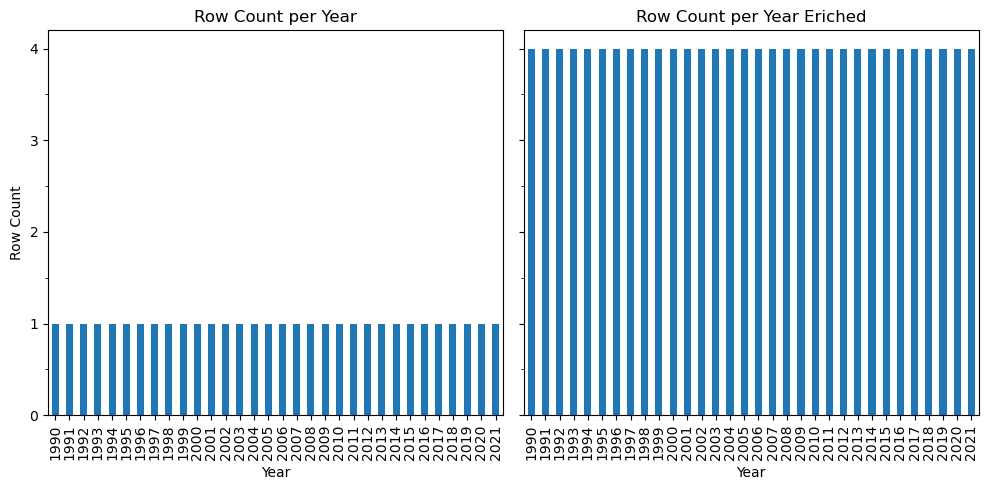

In [170]:
# Plotting histograms with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)



# Plot the results
yearly_counts2.plot(kind='bar', ax=axes[0],xlabel='Year', title='Row Count per Year')
axes[0].set_ylabel('Row Count')
axes[0].set_yticks(range(int(yearly_counts2.max()) + 4))


# Plot the results
yearly_counts3.plot(kind='bar', ax=axes[1], xlabel='Year', title='Row Count per Year Eriched')
axes[1].set_ylabel('Row Count')
axes[1].set_yticks(range(int(yearly_counts2.max()) + 4))

plt.tight_layout()
plt.show()

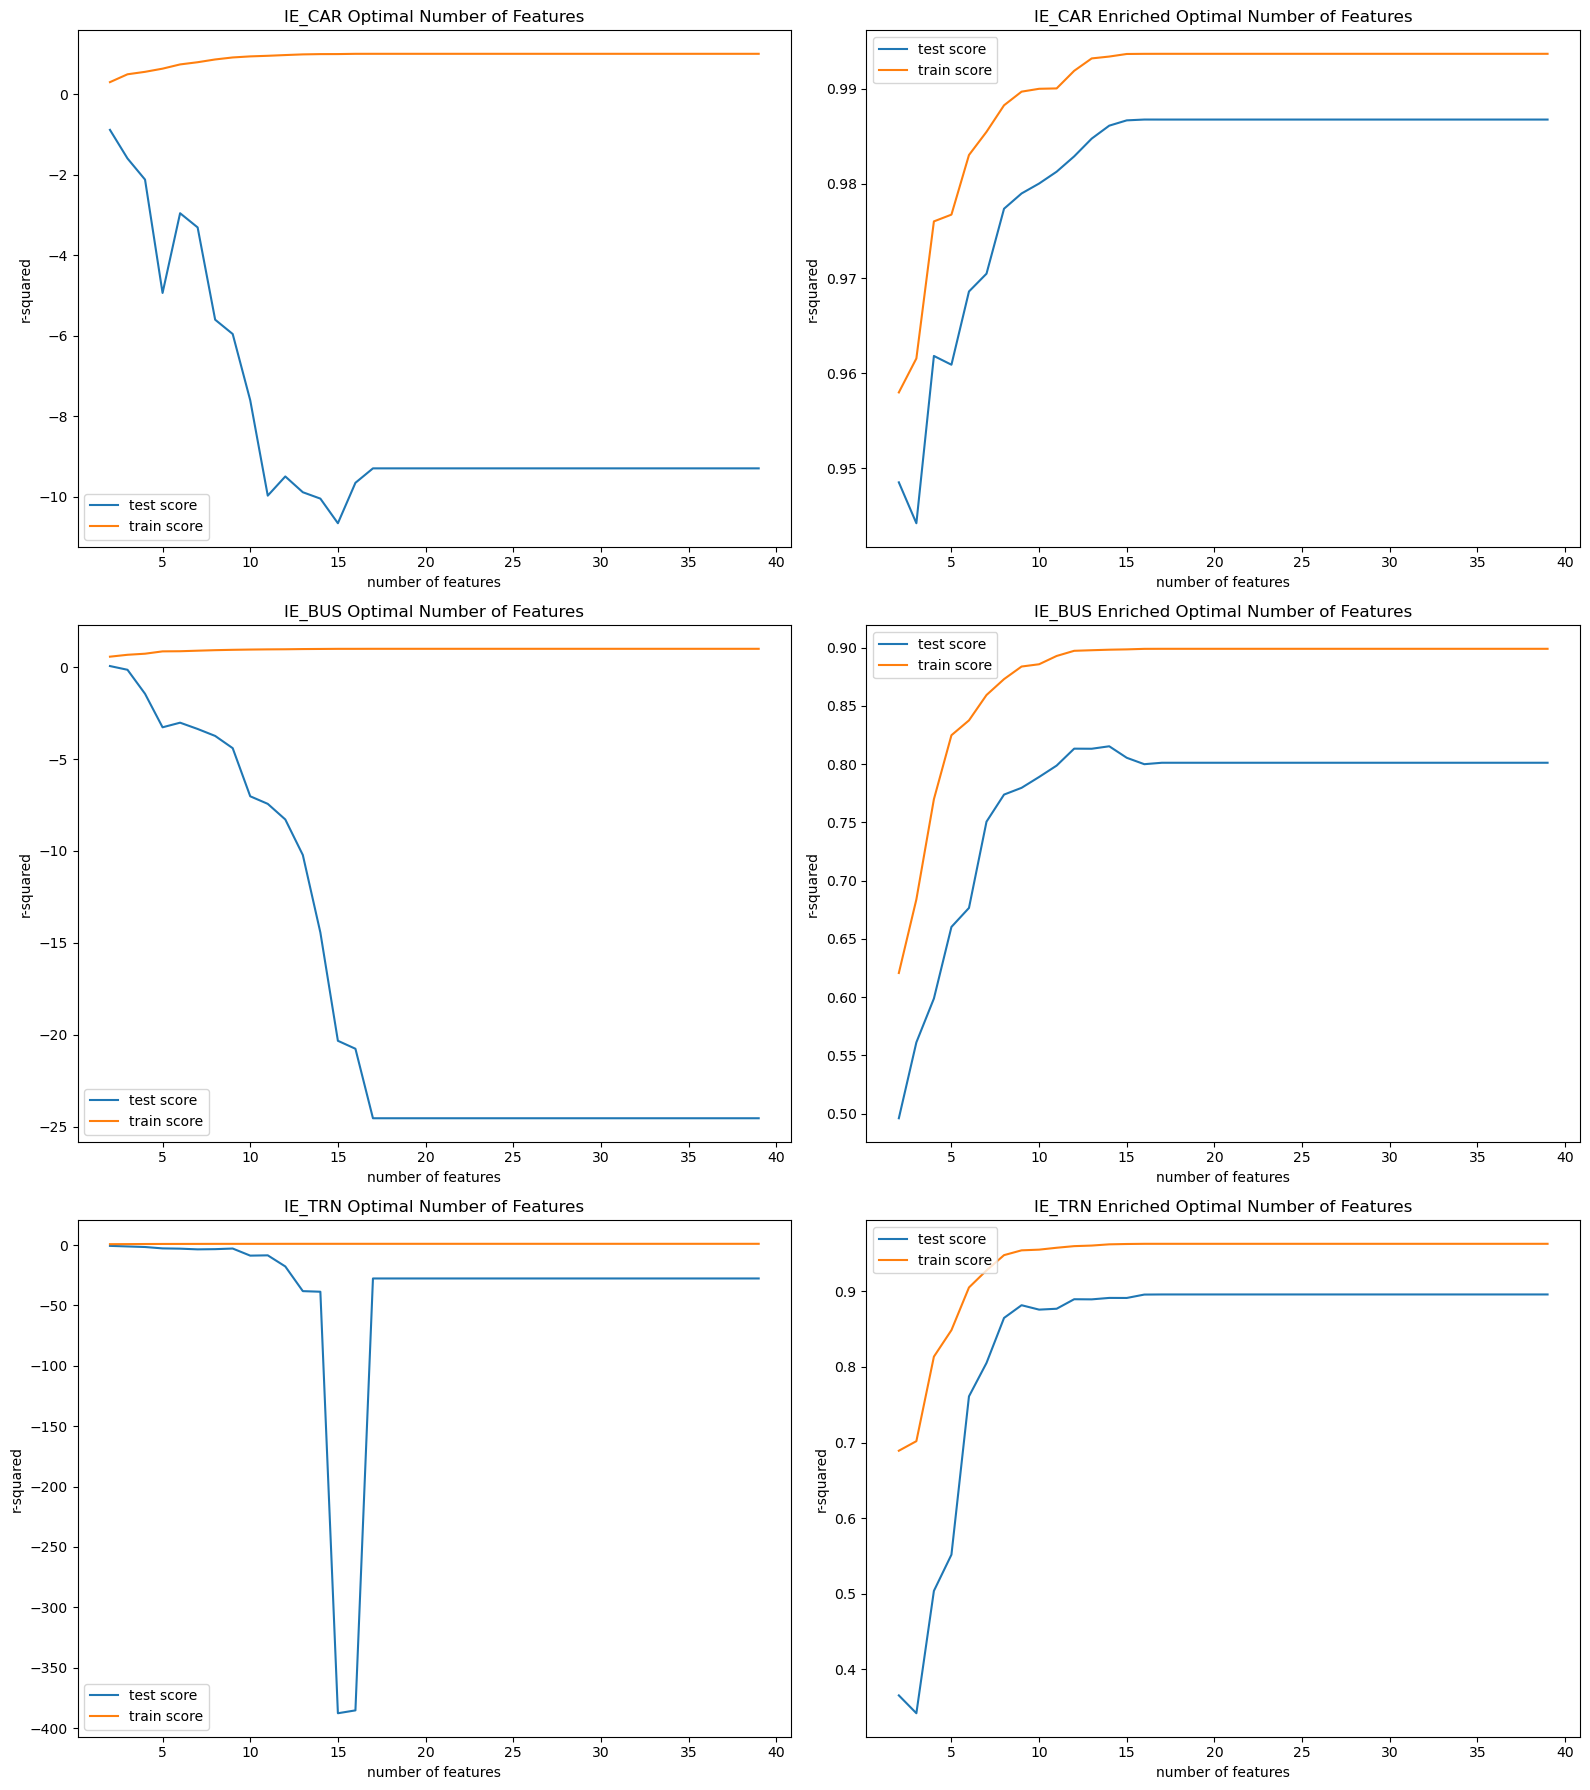

In [171]:
# Creating 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# IE_CAR:
axs[0, 0].plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
axs[0, 0].plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
axs[0, 0].set_xlabel('number of features')
axs[0, 0].set_ylabel('r-squared')
axs[0, 0].set_title('IE_CAR Optimal Number of Features')
axs[0, 0].legend(['test score', 'train score'], loc='lower left')

axs[0, 1].plot(cv_results3["param_n_features_to_select"], cv_results3["mean_test_score"])
axs[0, 1].plot(cv_results3["param_n_features_to_select"], cv_results3["mean_train_score"])
axs[0, 1].set_xlabel('number of features')
axs[0, 1].set_ylabel('r-squared')
axs[0, 1].set_title('IE_CAR Enriched Optimal Number of Features')
axs[0, 1].legend(['test score', 'train score'], loc='upper left')

# IE BUS:
axs[1, 0].plot(cv_results1["param_n_features_to_select"], cv_results1["mean_test_score"])
axs[1, 0].plot(cv_results1["param_n_features_to_select"], cv_results1["mean_train_score"])
axs[1, 0].set_xlabel('number of features')
axs[1, 0].set_ylabel('r-squared')
axs[1, 0].set_title('IE_BUS Optimal Number of Features')
axs[1, 0].legend(['test score', 'train score'], loc='lower left')

axs[1, 1].plot(cv_results4["param_n_features_to_select"], cv_results4["mean_test_score"])
axs[1, 1].plot(cv_results4["param_n_features_to_select"], cv_results4["mean_train_score"])
axs[1, 1].set_xlabel('number of features')
axs[1, 1].set_ylabel('r-squared')
axs[1, 1].set_title('IE_BUS Enriched Optimal Number of Features')
axs[1, 1].legend(['test score', 'train score'], loc='upper left')

#IE TRN
axs[2, 0].plot(cv_results2["param_n_features_to_select"], cv_results2["mean_test_score"])
axs[2, 0].plot(cv_results2["param_n_features_to_select"], cv_results2["mean_train_score"])
axs[2, 0].set_xlabel('number of features')
axs[2, 0].set_ylabel('r-squared')
axs[2, 0].set_title('IE_TRN Optimal Number of Features')
axs[2, 0].legend(['test score', 'train score'], loc='lower left')

axs[2, 1].plot(cv_results5["param_n_features_to_select"], cv_results5["mean_test_score"])
axs[2, 1].plot(cv_results5["param_n_features_to_select"], cv_results5["mean_train_score"])
axs[2, 1].set_xlabel('number of features')
axs[2, 1].set_ylabel('r-squared')
axs[2, 1].set_title('IE_TRN Enriched Optimal Number of Features')
axs[2, 1].legend(['test score', 'train score'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [172]:
# Creating figure x

Output3= {
    'Country_Vehicle': ['IE_CAR', 'IE_BUS', 'IE_TRN'],
    'Number_of_Features': [2, 2, 2],
    'Accuracy (%)': [-88.85, 6.15, -70.44],
    'Number_of_Features_Enriched': [16, 14, 17],
    'Accuracy_Enriched (%)': [98.67, 81.54, 89.59]
}

gscvcv_Results2= pd.DataFrame(Output3)
gscvcv_Results2

,Country_Vehicle,Number_of_Features,Accuracy (%),Number_of_Features_Enriched,Accuracy_Enriched (%)
0,IE_CAR,2,-88.85,16,98.67
1,IE_BUS,2,6.15,14,81.54
2,IE_TRN,2,-70.44,17,89.59


## Unsupervised learning

# PCA and Clustering CAR
PCA: Principal Component Analysis

In [173]:
dvdf7_CAR1.head()

,Year,Quarter,IE_CAR,AT_CAR,BE_CAR,CH_CAR,DE_CAR,DK_CAR,EL_CAR,ES_CAR,FI_CAR,FR_CAR,HU_CAR,IT_CAR,LU_CAR,NL_CAR,PL_CAR,PT_CAR,SE_CAR,SI_CAR
0,1990,1,19.53,17.73,19.16,18.88,19.64,18.95,14.72,17.96,18.68,19.50,13.92,18.45,19.62,19.57,9.50,16.45,19.34,14.42
1,1990,2,22.92,20.82,22.49,22.17,23.06,22.25,17.28,21.09,21.92,22.90,16.34,21.65,23.03,22.98,11.15,19.30,22.71,16.93
2,1990,3,20.38,18.50,19.99,19.70,20.50,19.78,15.36,18.74,19.49,20.35,14.52,19.25,20.47,20.42,9.91,17.16,20.18,15.05
3,1990,4,22.07,20.05,21.66,21.35,22.20,21.42,16.64,20.31,21.11,22.05,15.73,20.85,22.18,22.13,10.74,18.59,21.87,16.30
4,1991,1,19.39,17.71,19.16,18.65,19.46,19.07,14.86,18.49,18.79,19.57,14.54,18.54,19.64,19.07,11.45,16.42,19.48,15.27


In [174]:
# distributing the dataset into two components X and Y
X = dvdf7_CAR1.iloc[:, 2:].values
y = dvdf7_CAR1.iloc[:, 1].values

In [175]:
# Splitting the X and Y into the Training set and Testing set
# Split the data set into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [176]:
# performing preprocessing part
# Create and initialise an object (sc) by calling a method named as StandardScaler()

sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [177]:
# Applying PCA function on training and testing set of X component
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.77171509 0.16514322 0.02878059]


In [178]:
# Dropping columns 'Year' and 'Quarter' we don't need them. Unit of measurement for this dataset is percentage
dvdf7_CAR1 = dvdf7_CAR1.drop(['Year', 'Quarter'], axis=1).reset_index(drop=True)

In [179]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7_CAR1)
scaled_data = scalar.transform(dvdf7_CAR1)
  
# Selecting 3 components
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(128, 3)

In [180]:
# Display components
pcaComponents = pca.components_, pca.explained_variance_ratio_
df_comp = pd.DataFrame(pca.components_, columns = dvdf7_CAR1.columns)

In [181]:
# Finding the optimum number of clusters for k-means classification
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

In [182]:
# Instantiate the KMeans models
km = KMeans(n_clusters = 2, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouettescore = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouettescore)

Silhouetter Score: 0.490


In [183]:
# Storing silhouette scores
silhouettescore = []

# Redifining X for later reproducibility

Xs =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(Xs)
    silhouettescore.append(silhouette_score(Xs, km_labels, metric='euclidean'))

## BUS

In [184]:
# distributing the dataset into two components X and Y
X = dvdf7_BUS1.iloc[:, 2:].values
y = dvdf7_BUS1.iloc[:, 1].values

In [185]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [186]:
# performing preprocessing part
# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [187]:
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance1 = pca.explained_variance_ratio_

print(explained_variance1)

[0.52207334 0.2149303  0.09974296]


In [188]:
# Dropping columns 'Year' and 'Quarter' we don't need them. Unit of measurement for this dataset is percentage
dvdf7_BUS1 = dvdf7_BUS1.drop(['Year', 'Quarter'], axis=1).reset_index(drop=True)

In [189]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7_BUS1)
scaled_data = scalar.transform(dvdf7_BUS1)
  
# Selecting 3 components
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca1 = pca.transform(scaled_data)
  
x_pca1.shape

(128, 3)

In [190]:
# Display components
pcaComponents1 = pca.components_, pca.explained_variance_ratio_
df_comp1 = pd.DataFrame(pca.components_, columns = dvdf7_BUS1.columns)

In [191]:
# Finding the optimum number of clusters for k-means classification
wcss1 = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss1.append(kmeans.inertia_)

In [192]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouette_score1 = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouette_score1)

Silhouetter Score: 0.412


In [193]:
# Storing silhouette scores
silhouettescore1 = []

# Redifining X for later reproducibility

Xs1 =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels1 = km.fit_predict(Xs1)
    silhouettescore1.append(silhouette_score(Xs1, km_labels1, metric='euclidean'))

# TRN

In [194]:
# distributing the dataset into two components X and Y
X = dvdf7_TRN1.iloc[:, 2:].values
y = dvdf7_TRN1.iloc[:, 1].values

In [195]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [196]:
# performing preprocessing part
# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [197]:
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance2 = pca.explained_variance_ratio_

print(explained_variance2)

[0.44371637 0.33012741 0.07419443]


In [198]:
# Dropping columns 'Year' and 'Quarter' we don't need them. Unit of measurement for this dataset is percentage
dvdf7_TRN1 = dvdf7_TRN1.drop(['Year', 'Quarter'], axis=1).reset_index(drop=True)

In [199]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7_TRN1)
scaled_data = scalar.transform(dvdf7_TRN1)
  
# Selecting 3 components
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca2 = pca.transform(scaled_data)
  
x_pca2.shape

(128, 3)

In [200]:
# Display components
pcaComponents2 = pca.components_, pca.explained_variance_ratio_
df_comp2 = pd.DataFrame(pca.components_, columns = dvdf7_TRN1.columns)

In [201]:
# Finding the optimum number of clusters for k-means classification
wcss2 = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss2.append(kmeans.inertia_)

In [202]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouette_score1 = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouette_score1)

Silhouetter Score: 0.386


In [203]:
# Storing silhouette scores
silhouettescore2 = []

# Redifining X for later reproducibility

Xs2 =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels2 = km.fit_predict(Xs2)
    silhouettescore2.append(silhouette_score(Xs2, km_labels2, metric='euclidean'))

In [204]:
# Figure X....
# Data
output4 = {
    'Vehicle': ['CAR', 'BUS', 'TRN'],
    'First, Second and Third Component (PCA)': [
        [0.77171509, 0.16514322, 0.02878059],
        [0.52207334, 0.2149303, 0.09974296],
        [0.44371637, 0.33012741, 0.07419443]
    ]
}

# Create DataFrame
unsup_ML_Results = pd.DataFrame(output4)
unsup_ML_Results

,Vehicle,"First, Second and Third Component (PCA)"
0,CAR,"[0.77171509, 0.16514322, 0.02878059]"
1,BUS,"[0.52207334, 0.2149303, 0.09974296]"
2,TRN,"[0.44371637, 0.33012741, 0.07419443]"


In [205]:
# Figure X....
# Data
output5 = {
    'Vehicle': ['CAR', 'BUS', 'TRN'],
    'Silhouetter_Score': [0.490, 0.412,0.386]
}

# Create DataFrame
unsup_ML_Results1 = pd.DataFrame(output5)
unsup_ML_Results1 

,Vehicle,Silhouetter_Score
0,CAR,0.49
1,BUS,0.41
2,TRN,0.39


# Enriching data  monthly values

In [206]:
dvdf7b.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.00,77.10,11.90,10.60,83.30,6.10,3.70,82.10,14.20,9.10,85.40,5.40,11.30,82.40,6.30,32.40,64.00,3.60,14.90,78.10,6.90,13.50,81.20,5.30,6.00,84.80,9.30,24.80,60.50,14.70,11.50,84.90,3.60,12.90,80.20,6.90,10.20,85.30,4.40,8.10,85.10,6.90,28.20,41.30,30.50,18.40,71.50,10.10,9.50,84.10,6.50,30.60,62.70,6.70
1,1991,10.60,77.00,12.40,10.70,83.30,6.10,3.90,81.10,15.00,8.50,84.60,6.90,11.10,82.90,6.00,31.80,64.60,3.60,13.70,80.40,5.80,13.10,81.70,5.20,6.10,85.10,8.80,23.40,63.20,13.30,11.90,84.30,3.70,12.70,80.60,6.70,10.10,85.40,4.50,8.20,82.90,8.90,25.60,49.80,24.60,18.60,71.40,9.90,9.50,84.70,5.90,29.30,66.40,4.30
2,1992,10.50,77.00,12.50,10.70,83.30,6.00,4.00,81.40,14.60,8.30,85.00,6.80,15.20,79.00,5.80,32.20,64.30,3.50,13.20,80.80,6.00,13.00,82.00,5.00,5.80,85.60,8.60,22.90,63.90,13.20,12.30,84.20,3.50,11.60,82.30,6.10,10.10,84.90,5.00,6.80,84.00,9.20,24.40,55.30,20.30,22.70,68.20,9.00,9.40,84.80,5.80,23.00,73.90,3.00
3,1993,10.70,77.20,12.10,10.90,83.30,5.90,3.90,80.90,15.20,8.10,84.50,7.30,15.30,76.70,8.00,31.70,65.40,2.90,13.20,81.40,5.40,13.20,81.90,5.00,5.80,86.20,8.00,23.20,64.50,12.40,12.60,83.80,3.60,11.20,82.90,5.90,9.80,85.20,5.00,6.50,85.10,8.40,28.00,54.20,17.70,19.30,72.20,8.50,9.30,84.40,6.30,21.10,75.80,3.10
4,1994,10.60,77.80,11.60,11.80,82.60,5.60,4.00,79.80,16.20,7.30,85.80,6.90,15.50,76.40,8.10,31.10,66.70,2.20,13.00,81.90,5.10,13.20,81.80,5.00,5.70,86.50,7.80,23.50,64.30,12.20,13.60,83.00,3.40,11.00,83.00,6.00,9.80,84.90,5.30,7.10,85.40,7.50,26.40,57.90,15.60,17.90,74.30,7.80,9.30,84.40,6.30,20.40,76.60,3.00


In [207]:
# Groupping by 'Year' and get the row count
yearly_counts4 = dvdf7b.groupby('Year').size()

In [208]:
def addMonUnsuMl(dvdf7b, weights):
    # Create a list to store the transformed data
    transformed_rows = []

    for index, row in dvdf7b.iterrows():
        year = row['Year']

        # Iterate through each country and mode of transport
        for column_name in dvdf7b.columns[1:]:  # Exclude the 'Year' column
            # Check if the column name has the expected format
            if '_' in column_name:
                country, mode = column_name.split('_')

                # Calculate values for each month based on weights
                at_value = row[column_name]
                values = [round(at_value * weight, 2) for weight in weights]

                # Add rows to the transformed list
                for month, value in enumerate(values, start=1):
                    transformed_rows.append({'Year': year, 'Month': month, column_name: value})

    # Create the transformed DataFrame
    transformed_df = pd.DataFrame(transformed_rows)

    return transformed_df

weights = [0.09, 0.08, 0.07, 0.11, 0.06, 0.12, 0.07, 0.03, 0.13, 0.09, 0.07, 0.08]

dvdf7b = addMonUnsuMl(dvdf7b, weights)
dvdf7b = dvdf7b.pivot_table(index=['Year', 'Month'], aggfunc='sum').reset_index()
dvdf7b

,Year,Month,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,1,0.99,6.94,1.07,0.95,7.50,0.55,0.33,7.39,1.28,0.82,7.69,0.49,1.02,7.42,0.57,2.92,5.76,0.32,1.34,7.03,0.62,1.21,7.31,0.48,0.54,7.63,0.84,2.23,5.44,1.32,1.03,7.64,0.32,1.16,7.22,0.62,0.92,7.68,0.40,0.73,7.66,0.62,2.54,3.72,2.75,1.66,6.43,0.91,0.85,7.57,0.58,2.75,5.64,0.60
1,1990,2,0.88,6.17,0.95,0.85,6.66,0.49,0.30,6.57,1.14,0.73,6.83,0.43,0.90,6.59,0.50,2.59,5.12,0.29,1.19,6.25,0.55,1.08,6.50,0.42,0.48,6.78,0.74,1.98,4.84,1.18,0.92,6.79,0.29,1.03,6.42,0.55,0.82,6.82,0.35,0.65,6.81,0.55,2.26,3.30,2.44,1.47,5.72,0.81,0.76,6.73,0.52,2.45,5.02,0.54
2,1990,3,0.77,5.40,0.83,0.74,5.83,0.43,0.26,5.75,0.99,0.64,5.98,0.38,0.79,5.77,0.44,2.27,4.48,0.25,1.04,5.47,0.48,0.95,5.68,0.37,0.42,5.94,0.65,1.74,4.24,1.03,0.81,5.94,0.25,0.90,5.61,0.48,0.71,5.97,0.31,0.57,5.96,0.48,1.97,2.89,2.14,1.29,5.01,0.71,0.67,5.89,0.46,2.14,4.39,0.47
3,1990,4,1.21,8.48,1.31,1.17,9.16,0.67,0.41,9.03,1.56,1.00,9.39,0.59,1.24,9.06,0.69,3.56,7.04,0.40,1.64,8.59,0.76,1.49,8.93,0.58,0.66,9.33,1.02,2.73,6.66,1.62,1.26,9.34,0.40,1.42,8.82,0.76,1.12,9.38,0.48,0.89,9.36,0.76,3.10,4.54,3.35,2.02,7.87,1.11,1.04,9.25,0.71,3.37,6.90,0.74
4,1990,5,0.66,4.63,0.71,0.64,5.00,0.37,0.22,4.93,0.85,0.55,5.12,0.32,0.68,4.94,0.38,1.94,3.84,0.22,0.89,4.69,0.41,0.81,4.87,0.32,0.36,5.09,0.56,1.49,3.63,0.88,0.69,5.09,0.22,0.77,4.81,0.41,0.61,5.12,0.26,0.49,5.11,0.41,1.69,2.48,1.83,1.10,4.29,0.61,0.57,5.05,0.39,1.84,3.76,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2021,8,0.27,2.44,0.29,0.25,2.57,0.19,0.18,2.38,0.44,0.14,2.66,0.20,0.21,2.60,0.19,0.37,2.61,0.02,0.22,2.62,0.16,0.25,2.63,0.12,0.15,2.58,0.27,0.43,2.38,0.19,0.39,2.57,0.04,0.38,2.48,0.13,0.31,2.59,0.10,0.07,2.68,0.25,0.23,2.59,0.18,0.17,2.74,0.09,0.25,2.52,0.22,0.25,2.70,0.05
380,2021,9,1.17,10.56,1.27,1.07,11.13,0.81,0.77,10.34,1.90,0.62,11.54,0.84,0.92,11.27,0.81,1.60,11.32,0.08,0.95,11.36,0.69,1.08,11.40,0.52,0.64,11.18,1.18,1.86,10.31,0.83,1.69,11.14,0.18,1.66,10.76,0.57,1.33,11.22,0.46,0.30,11.62,1.09,1.01,11.22,0.77,0.74,11.87,0.38,1.08,10.93,0.98,1.07,11.70,0.23
381,2021,10,0.81,7.31,0.88,0.74,7.70,0.56,0.53,7.15,1.31,0.43,7.99,0.58,0.64,7.80,0.56,1.11,7.84,0.05,0.66,7.87,0.48,0.75,7.89,0.36,0.44,7.74,0.82,1.29,7.14,0.58,1.17,7.71,0.13,1.15,7.45,0.40,0.92,7.77,0.32,0.21,8.05,0.76,0.70,7.77,0.53,0.51,8.22,0.26,0.75,7.57,0.67,0.74,8.10,0.16
382,2021,11,0.63,5.68,0.69,0.57,5.99,0.43,0.41,5.57,1.02,0.34,6.22,0.46,0.50,6.07,0.43,0.86,6.10,0.04,0.51,6.12,0.37,0.58,6.14,0.28,0.34,6.02,0.64,1.00,5.55,0.45,0.91,6.00,0.10,0.90,5.80,0.31,0.71,6.04,0.25,0.16,6.26,0.59,0.55,6.04,0.41,0.40,6.39,0.20,0.58,5.89,0.53,0.57,6.30,0.13


In [209]:
# Groupping by 'Year' and get the row count
yearly_counts5 = dvdf7b.groupby('Year').size()

In [210]:
dvdf7b.head(12)

,Year,Month,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,DE_BUS,DE_CAR,DE_TRN,DK_BUS,DK_CAR,DK_TRN,EL_BUS,EL_CAR,EL_TRN,ES_BUS,ES_CAR,ES_TRN,FI_BUS,FI_CAR,FI_TRN,FR_BUS,FR_CAR,FR_TRN,HU_BUS,HU_CAR,HU_TRN,IE_BUS,IE_CAR,IE_TRN,IT_BUS,IT_CAR,IT_TRN,LU_BUS,LU_CAR,LU_TRN,NL_BUS,NL_CAR,NL_TRN,PL_BUS,PL_CAR,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,1,0.99,6.94,1.07,0.95,7.50,0.55,0.33,7.39,1.28,0.82,7.69,0.49,1.02,7.42,0.57,2.92,5.76,0.32,1.34,7.03,0.62,1.21,7.31,0.48,0.54,7.63,0.84,2.23,5.44,1.32,1.03,7.64,0.32,1.16,7.22,0.62,0.92,7.68,0.40,0.73,7.66,0.62,2.54,3.72,2.75,1.66,6.43,0.91,0.85,7.57,0.58,2.75,5.64,0.60
1,1990,2,0.88,6.17,0.95,0.85,6.66,0.49,0.30,6.57,1.14,0.73,6.83,0.43,0.90,6.59,0.50,2.59,5.12,0.29,1.19,6.25,0.55,1.08,6.50,0.42,0.48,6.78,0.74,1.98,4.84,1.18,0.92,6.79,0.29,1.03,6.42,0.55,0.82,6.82,0.35,0.65,6.81,0.55,2.26,3.30,2.44,1.47,5.72,0.81,0.76,6.73,0.52,2.45,5.02,0.54
2,1990,3,0.77,5.40,0.83,0.74,5.83,0.43,0.26,5.75,0.99,0.64,5.98,0.38,0.79,5.77,0.44,2.27,4.48,0.25,1.04,5.47,0.48,0.95,5.68,0.37,0.42,5.94,0.65,1.74,4.24,1.03,0.81,5.94,0.25,0.90,5.61,0.48,0.71,5.97,0.31,0.57,5.96,0.48,1.97,2.89,2.14,1.29,5.01,0.71,0.67,5.89,0.46,2.14,4.39,0.47
3,1990,4,1.21,8.48,1.31,1.17,9.16,0.67,0.41,9.03,1.56,1.00,9.39,0.59,1.24,9.06,0.69,3.56,7.04,0.40,1.64,8.59,0.76,1.49,8.93,0.58,0.66,9.33,1.02,2.73,6.66,1.62,1.26,9.34,0.40,1.42,8.82,0.76,1.12,9.38,0.48,0.89,9.36,0.76,3.10,4.54,3.35,2.02,7.87,1.11,1.04,9.25,0.71,3.37,6.90,0.74
4,1990,5,0.66,4.63,0.71,0.64,5.00,0.37,0.22,4.93,0.85,0.55,5.12,0.32,0.68,4.94,0.38,1.94,3.84,0.22,0.89,4.69,0.41,0.81,4.87,0.32,0.36,5.09,0.56,1.49,3.63,0.88,0.69,5.09,0.22,0.77,4.81,0.41,0.61,5.12,0.26,0.49,5.11,0.41,1.69,2.48,1.83,1.10,4.29,0.61,0.57,5.05,0.39,1.84,3.76,0.40
5,1990,6,1.32,9.25,1.43,1.27,10.00,0.73,0.44,9.85,1.70,1.09,10.25,0.65,1.36,9.89,0.76,3.89,7.68,0.43,1.79,9.37,0.83,1.62,9.74,0.64,0.72,10.18,1.12,2.98,7.26,1.76,1.38,10.19,0.43,1.55,9.62,0.83,1.22,10.24,0.53,0.97,10.21,0.83,3.38,4.96,3.66,2.21,8.58,1.21,1.14,10.09,0.78,3.67,7.52,0.80
6,1990,7,0.77,5.40,0.83,0.74,5.83,0.43,0.26,5.75,0.99,0.64,5.98,0.38,0.79,5.77,0.44,2.27,4.48,0.25,1.04,5.47,0.48,0.95,5.68,0.37,0.42,5.94,0.65,1.74,4.24,1.03,0.81,5.94,0.25,0.90,5.61,0.48,0.71,5.97,0.31,0.57,5.96,0.48,1.97,2.89,2.14,1.29,5.01,0.71,0.67,5.89,0.46,2.14,4.39,0.47
7,1990,8,0.33,2.31,0.36,0.32,2.50,0.18,0.11,2.46,0.43,0.27,2.56,0.16,0.34,2.47,0.19,0.97,1.92,0.11,0.45,2.34,0.21,0.40,2.44,0.16,0.18,2.54,0.28,0.74,1.81,0.44,0.34,2.55,0.11,0.39,2.41,0.21,0.31,2.56,0.13,0.24,2.55,0.21,0.85,1.24,0.91,0.55,2.15,0.30,0.28,2.52,0.20,0.92,1.88,0.20
8,1990,9,1.43,10.02,1.55,1.38,10.83,0.79,0.48,10.67,1.85,1.18,11.10,0.70,1.47,10.71,0.82,4.21,8.32,0.47,1.94,10.15,0.90,1.76,10.56,0.69,0.78,11.02,1.21,3.22,7.87,1.91,1.50,11.04,0.47,1.68,10.43,0.90,1.33,11.09,0.57,1.05,11.06,0.90,3.67,5.37,3.97,2.39,9.29,1.31,1.24,10.93,0.84,3.98,8.15,0.87
9,1990,10,0.99,6.94,1.07,0.95,7.50,0.55,0.33,7.39,1.28,0.82,7.69,0.49,1.02,7.42,0.57,2.92,5.76,0.32,1.34,7.03,0.62,1.21,7.31,0.48,0.54,7.63,0.84,2.23,5.44,1.32,1.03,7.64,0.32,1.16,7.22,0.62,0.92,7.68,0.40,0.73,7.66,0.62,2.54,3.72,2.75,1.66,6.43,0.91,0.85,7.57,0.58,2.75,5.64,0.60


In [211]:
# Filter columns for CAR
dvdf7b_CAR = dvdf7b.filter(['Year', 'Month'] + [col for col in dvdf7b.columns if '_CAR' in col])
# Move 'IE_CAR' column to the thrid position
dvdf7b_CAR.insert(2, 'IE_CAR', dvdf7b_CAR.pop('IE_CAR'))


# Filter columns for BUS
dvdf7b_BUS = dvdf7b.filter(['Year', 'Month'] + [col for col in dvdf7b.columns if '_BUS' in col])
# Move 'IE_BUS' column to the thrid position
dvdf7b_BUS.insert(2, 'IE_BUS', dvdf7b_BUS.pop('IE_BUS'))


# Filter columns for TRN
dvdf7b_TRN = dvdf7b.filter(['Year', 'Month'] + [col for col in dvdf7b.columns if '_TRN' in col])
# Move 'IE_TRN' column to the thrid position
dvdf7b_TRN.insert(2, 'IE_TRN', dvdf7b_TRN.pop('IE_TRN'))


# CAR

In [212]:
# distributing the dataset into two components X and Y
X = dvdf7b_CAR.iloc[:, 2:].values
y = dvdf7b_CAR.iloc[:, 1].values

In [213]:
# Splitting the X and Y into the Training set and Testing set

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [214]:
# performing preprocessing part

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [215]:
# Applying PCA function on training and testing set of X component
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance3 = pca.explained_variance_ratio_

print(explained_variance3)

[0.97747751 0.0174295  0.00246979]


In [216]:
# Dropping columns 'Year' and 'Month' we don't need them. 
dvdf7b_CAR = dvdf7b_CAR.drop(['Year', 'Month'], axis=1).reset_index(drop=True)

In [217]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7b_CAR)
scaled_data = scalar.transform(dvdf7b_CAR)
  

# Selecting 3 componets
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca3 = pca.transform(scaled_data)
  
x_pca3.shape

(384, 3)

In [218]:
# Components
pcaComponents3 = pca.components_, pca.explained_variance_ratio_
df_comp3 = pd.DataFrame(pca.components_, columns = dvdf7b_CAR.columns) 

In [219]:
# Finding the optimum number of clusters for k-means classification
wcss3 = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss3.append(kmeans.inertia_)

In [220]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouette_score3 = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouette_score3)

Silhouetter Score: 0.671


In [221]:
# Storing silhouette scores
silhouettescore3 = []

# Redifining X for later reproducibility

Xs3 =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels3 = km.fit_predict(Xs3)
    silhouettescore3.append(silhouette_score(Xs3, km_labels3, metric='euclidean'))

# BUS Enriched

In [222]:
# distributing the dataset into two components X and Y
X = dvdf7b_BUS.iloc[:, 2:].values
y = dvdf7b_BUS.iloc[:, 1].values

In [223]:
# Splitting the X and Y into the Training set and Testing set

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [224]:
# performing preprocessing part

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [225]:
# Applying PCA function on training and testing set of X component
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance4 = pca.explained_variance_ratio_

print(explained_variance4)

[0.78418364 0.14665355 0.02593078]


In [226]:
# Dropping columns 'Year' and 'Month' we don't need them. 
dvdf7b_BUS = dvdf7b_BUS.drop(['Year', 'Month'], axis=1).reset_index(drop=True)

In [227]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7b_BUS)
scaled_data = scalar.transform(dvdf7b_BUS)
  

# Selecting 3 componets
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca4 = pca.transform(scaled_data)
  
x_pca4.shape

(384, 3)

In [228]:
# Components
pcaComponents4 = pca.components_, pca.explained_variance_ratio_
df_comp4 = pd.DataFrame(pca.components_, columns = dvdf7b_BUS.columns)

In [229]:
# Finding the optimum number of clusters for k-means classification
wcss4 = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss4.append(kmeans.inertia_)

In [230]:

# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouette_score4 = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouette_score4)

Silhouetter Score: 0.328


In [231]:
# Storing silhouette scores
silhouettescore4 = []

# Redifining X for later reproducibility

Xs4 =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels4 = km.fit_predict(Xs4)
    silhouettescore4.append(silhouette_score(Xs4, km_labels4, metric='euclidean'))

# TRN Enriched

In [232]:
# distributing the dataset into two components X and Y
X = dvdf7b_TRN.iloc[:, 2:].values
y = dvdf7b_TRN.iloc[:, 1].values

In [233]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [234]:
# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [235]:
# Applying PCA function on training and testing set of X component
# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 3)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance5 = pca.explained_variance_ratio_

print(explained_variance5)

[0.76860845 0.16637195 0.02241525]


In [236]:
# Dropping columns 'Year' and 'Month' we don't need them. 
dvdf7b_TRN = dvdf7b_TRN.drop(['Year', 'Month'], axis=1).reset_index(drop=True)

In [237]:
scalar = StandardScaler()
  
# fitting
scalar.fit(dvdf7b_TRN)
scaled_data = scalar.transform(dvdf7b_TRN)
  

# Selecting 3 componets
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca5 = pca.transform(scaled_data)
  
x_pca5.shape

(384, 3)

In [238]:
# Components
pcaComponents5 = pca.components_, pca.explained_variance_ratio_
df_comp5 = pd.DataFrame(pca.components_, columns = dvdf7b_TRN.columns)

In [239]:
# Finding the optimum number of clusters for k-means classification
wcss5 = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss5.append(kmeans.inertia_)

In [240]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
silhouette_score5 = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % silhouette_score5)

Silhouetter Score: 0.441


In [241]:
# Storing silhouette scores
silhouettescore5 = []

# Redifining X for later reproducibility

Xs5 =X

# Setting the range of clusters we want to test
k_values = range(2, 11)

# Calculating silhouette scores for each value of k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels5 = km.fit_predict(Xs5)
    silhouettescore5.append(silhouette_score(Xs5, km_labels5, metric='euclidean'))

# Summarising results: 

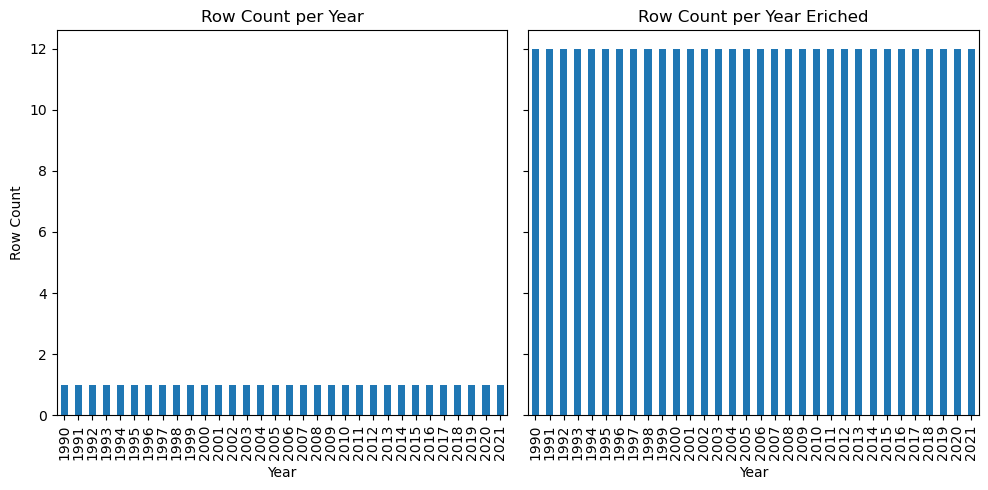

In [242]:
# Plotting histograms with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Plot the results
yearly_counts4.plot(kind='bar', ax=axes[0],xlabel='Year', title='Row Count per Year')
axes[0].set_ylabel('Row Count')


# Plot the results
yearly_counts5.plot(kind='bar', ax=axes[1], xlabel='Year', title='Row Count per Year Eriched')
axes[1].set_ylabel('Row Count')

plt.tight_layout()
plt.show()

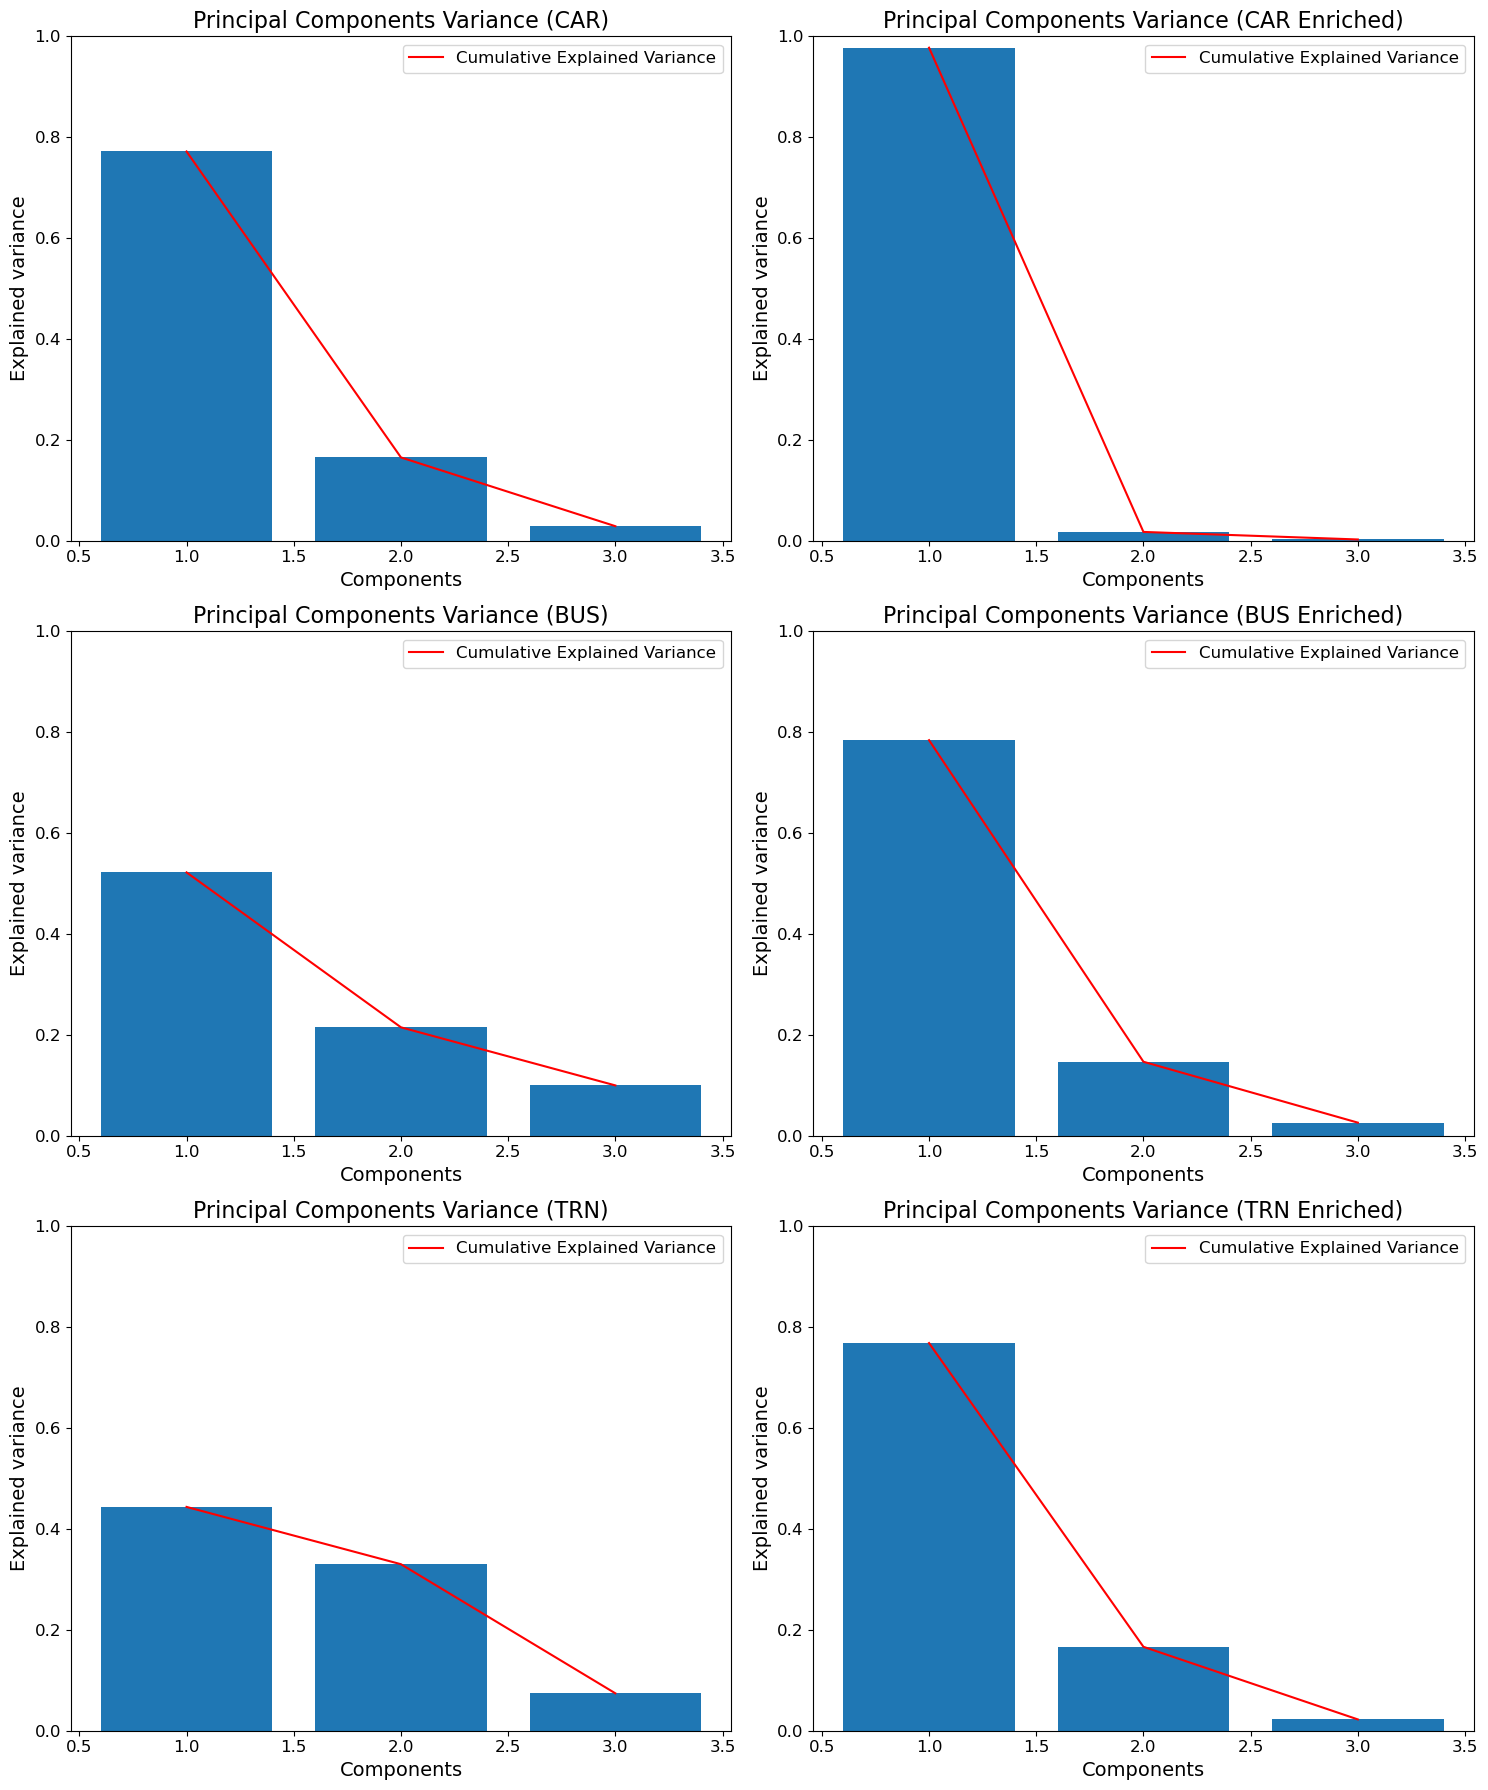

In [243]:
# Plotting 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot 1
axes[0, 0].bar(range(1, len(explained_variance) + 1), explained_variance)
axes[0, 0].plot(range(1, len(explained_variance) + 1), explained_variance,
               c='red', label="Cumulative Explained Variance")
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('Explained variance', fontsize=14)
axes[0, 0].set_xlabel('Components', fontsize=14)
axes[0, 0].set_title('Principal Components Variance (CAR)', fontsize=16)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend(loc='best', fontsize=12)


# Plot 2
axes[0, 1].bar(range(1, len(explained_variance3) + 1), explained_variance3)
axes[0, 1].plot(range(1, len(explained_variance3) + 1), explained_variance3,
               c='red', label="Cumulative Explained Variance")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_ylabel('Explained variance', fontsize=14)
axes[0, 1].set_xlabel('Components', fontsize=14)
axes[0, 1].set_title('Principal Components Variance (CAR Enriched)', fontsize=16)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend(loc='best', fontsize=12)

# Plot 3
axes[1, 0].bar(range(1, len(explained_variance1) + 1), explained_variance1)
axes[1, 0].plot(range(1, len(explained_variance1) + 1), explained_variance1,
               c='red', label="Cumulative Explained Variance")
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel('Explained variance', fontsize=14)
axes[1, 0].set_xlabel('Components', fontsize=14)
axes[1, 0].set_title('Principal Components Variance (BUS)', fontsize=16)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend(loc='best', fontsize=12)

# Plot 4
axes[1, 1].bar(range(1, len(explained_variance4) + 1), explained_variance4)
axes[1, 1].plot(range(1, len(explained_variance4) + 1), explained_variance4,
               c='red', label="Cumulative Explained Variance")
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_ylabel('Explained variance', fontsize=14)
axes[1, 1].set_xlabel('Components', fontsize=14)
axes[1, 1].set_title('Principal Components Variance (BUS Enriched)', fontsize=16)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend(loc='best', fontsize=12)

# Plot 5
axes[2, 0].bar(range(1, len(explained_variance2) + 1), explained_variance2)
axes[2, 0].plot(range(1, len(explained_variance2) + 1), explained_variance2,
               c='red', label="Cumulative Explained Variance")
axes[2, 0].set_ylim(0, 1)
axes[2, 0].set_ylabel('Explained variance', fontsize=14)
axes[2, 0].set_xlabel('Components', fontsize=14)
axes[2, 0].set_title('Principal Components Variance (TRN)', fontsize=16)
axes[2, 0].tick_params(axis='both', labelsize=12)
axes[2, 0].legend(loc='best', fontsize=12)

# Plot 6
axes[2, 1].bar(range(1, len(explained_variance5) + 1), explained_variance5)
axes[2, 1].plot(range(1, len(explained_variance5) + 1), explained_variance5,
               c='red', label="Cumulative Explained Variance")
axes[2, 1].set_ylim(0, 1)
axes[2, 1].set_ylabel('Explained variance', fontsize=14)
axes[2, 1].set_xlabel('Components', fontsize=14)
axes[2, 1].set_title('Principal Components Variance (TRN Enriched)', fontsize=16)
axes[2, 1].tick_params(axis='both', labelsize=12)
axes[2, 1].legend(loc='best', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [244]:
print('PCV CAR:',explained_variance)
print('PCV CAR Enriched:',explained_variance3)
print('PCV BUS:',explained_variance2)
print('PCV BUS Enriched:',explained_variance4)
print('PCV TRN:',explained_variance2)
print('PCV TRN Enriched:',explained_variance5)

PCV CAR: [0.77171509 0.16514322 0.02878059]
PCV CAR Enriched: [0.97747751 0.0174295  0.00246979]
PCV BUS: [0.44371637 0.33012741 0.07419443]
PCV BUS Enriched: [0.78418364 0.14665355 0.02593078]
PCV TRN: [0.44371637 0.33012741 0.07419443]
PCV TRN Enriched: [0.76860845 0.16637195 0.02241525]


## PCA Components scatter plot and heat map

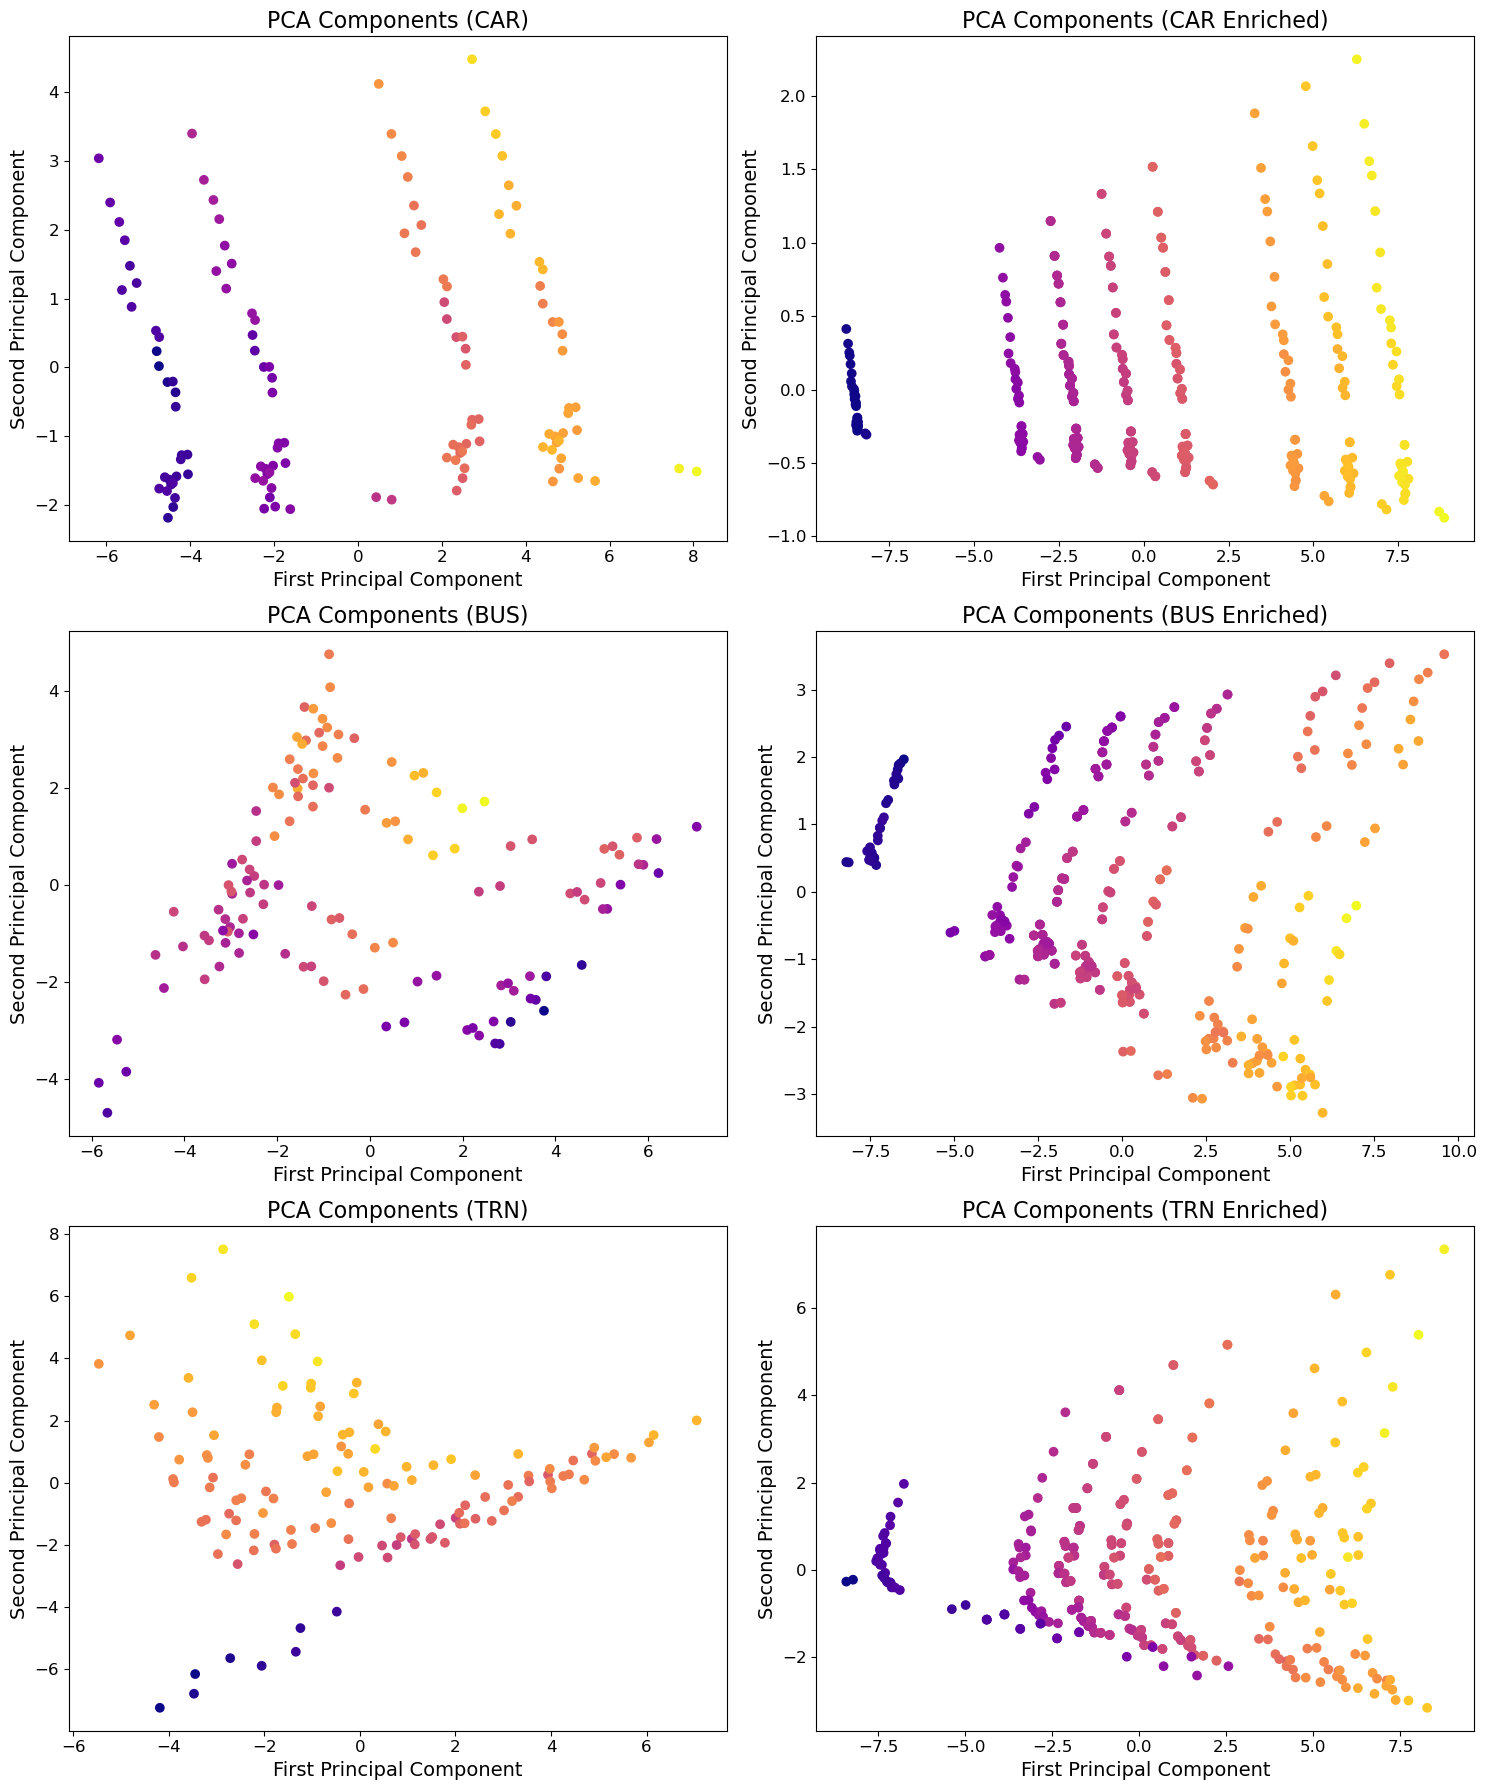

In [245]:
# Plot 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot 1
axes[0, 0].scatter(x_pca[:, 0], x_pca[:, 1], c=dvdf7_CAR1['IE_CAR'], cmap='plasma')
axes[0, 0].set_title('PCA Components (CAR)', fontsize=16)
axes[0, 0].set_xlabel('First Principal Component', fontsize=14)
axes[0, 0].set_ylabel('Second Principal Component', fontsize=14)
axes[0, 0].tick_params(axis='both', labelsize=12)

# Plot 2
axes[0, 1].scatter(x_pca3[:, 0], x_pca3[:, 1], c=dvdf7b_CAR['IE_CAR'], cmap='plasma')
axes[0, 1].set_title('PCA Components (CAR Enriched)', fontsize=16)
axes[0, 1].set_xlabel('First Principal Component', fontsize=14)
axes[0, 1].set_ylabel('Second Principal Component', fontsize=14)
axes[0, 1].tick_params(axis='both', labelsize=12)

# Plot 3
axes[1, 0].scatter(x_pca1[:, 0], x_pca1[:, 1], c=dvdf7_BUS1['IE_BUS'], cmap='plasma')
axes[1, 0].set_title('PCA Components (BUS)', fontsize=16)
axes[1, 0].set_xlabel('First Principal Component', fontsize=14)
axes[1, 0].set_ylabel('Second Principal Component', fontsize=14)
axes[1, 0].tick_params(axis='both', labelsize=12)

# Plot 4
axes[1, 1].scatter(x_pca4[:, 0], x_pca4[:, 1], c=dvdf7b_BUS['IE_BUS'], cmap='plasma')
axes[1, 1].set_title('PCA Components (BUS Enriched)', fontsize=16)
axes[1, 1].set_xlabel('First Principal Component', fontsize=14)
axes[1, 1].set_ylabel('Second Principal Component', fontsize=14)
axes[1, 1].tick_params(axis='both', labelsize=12)

# Plot 5
axes[2, 0].scatter(x_pca2[:, 0], x_pca2[:, 1], c=dvdf7_TRN1['IE_TRN'], cmap='plasma')
axes[2, 0].set_title('PCA Components (TRN)', fontsize=16)
axes[2, 0].set_xlabel('First Principal Component', fontsize=14)
axes[2, 0].set_ylabel('Second Principal Component', fontsize=14)
axes[2, 0].tick_params(axis='both', labelsize=12)

# Plot 6
axes[2, 1].scatter(x_pca5[:, 0], x_pca5[:, 1], c=dvdf7b_TRN['IE_TRN'], cmap='plasma')
axes[2, 1].set_title('PCA Components (TRN Enriched)', fontsize=16)
axes[2, 1].set_xlabel('First Principal Component', fontsize=14)
axes[2, 1].set_ylabel('Second Principal Component', fontsize=14)
axes[2, 1].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


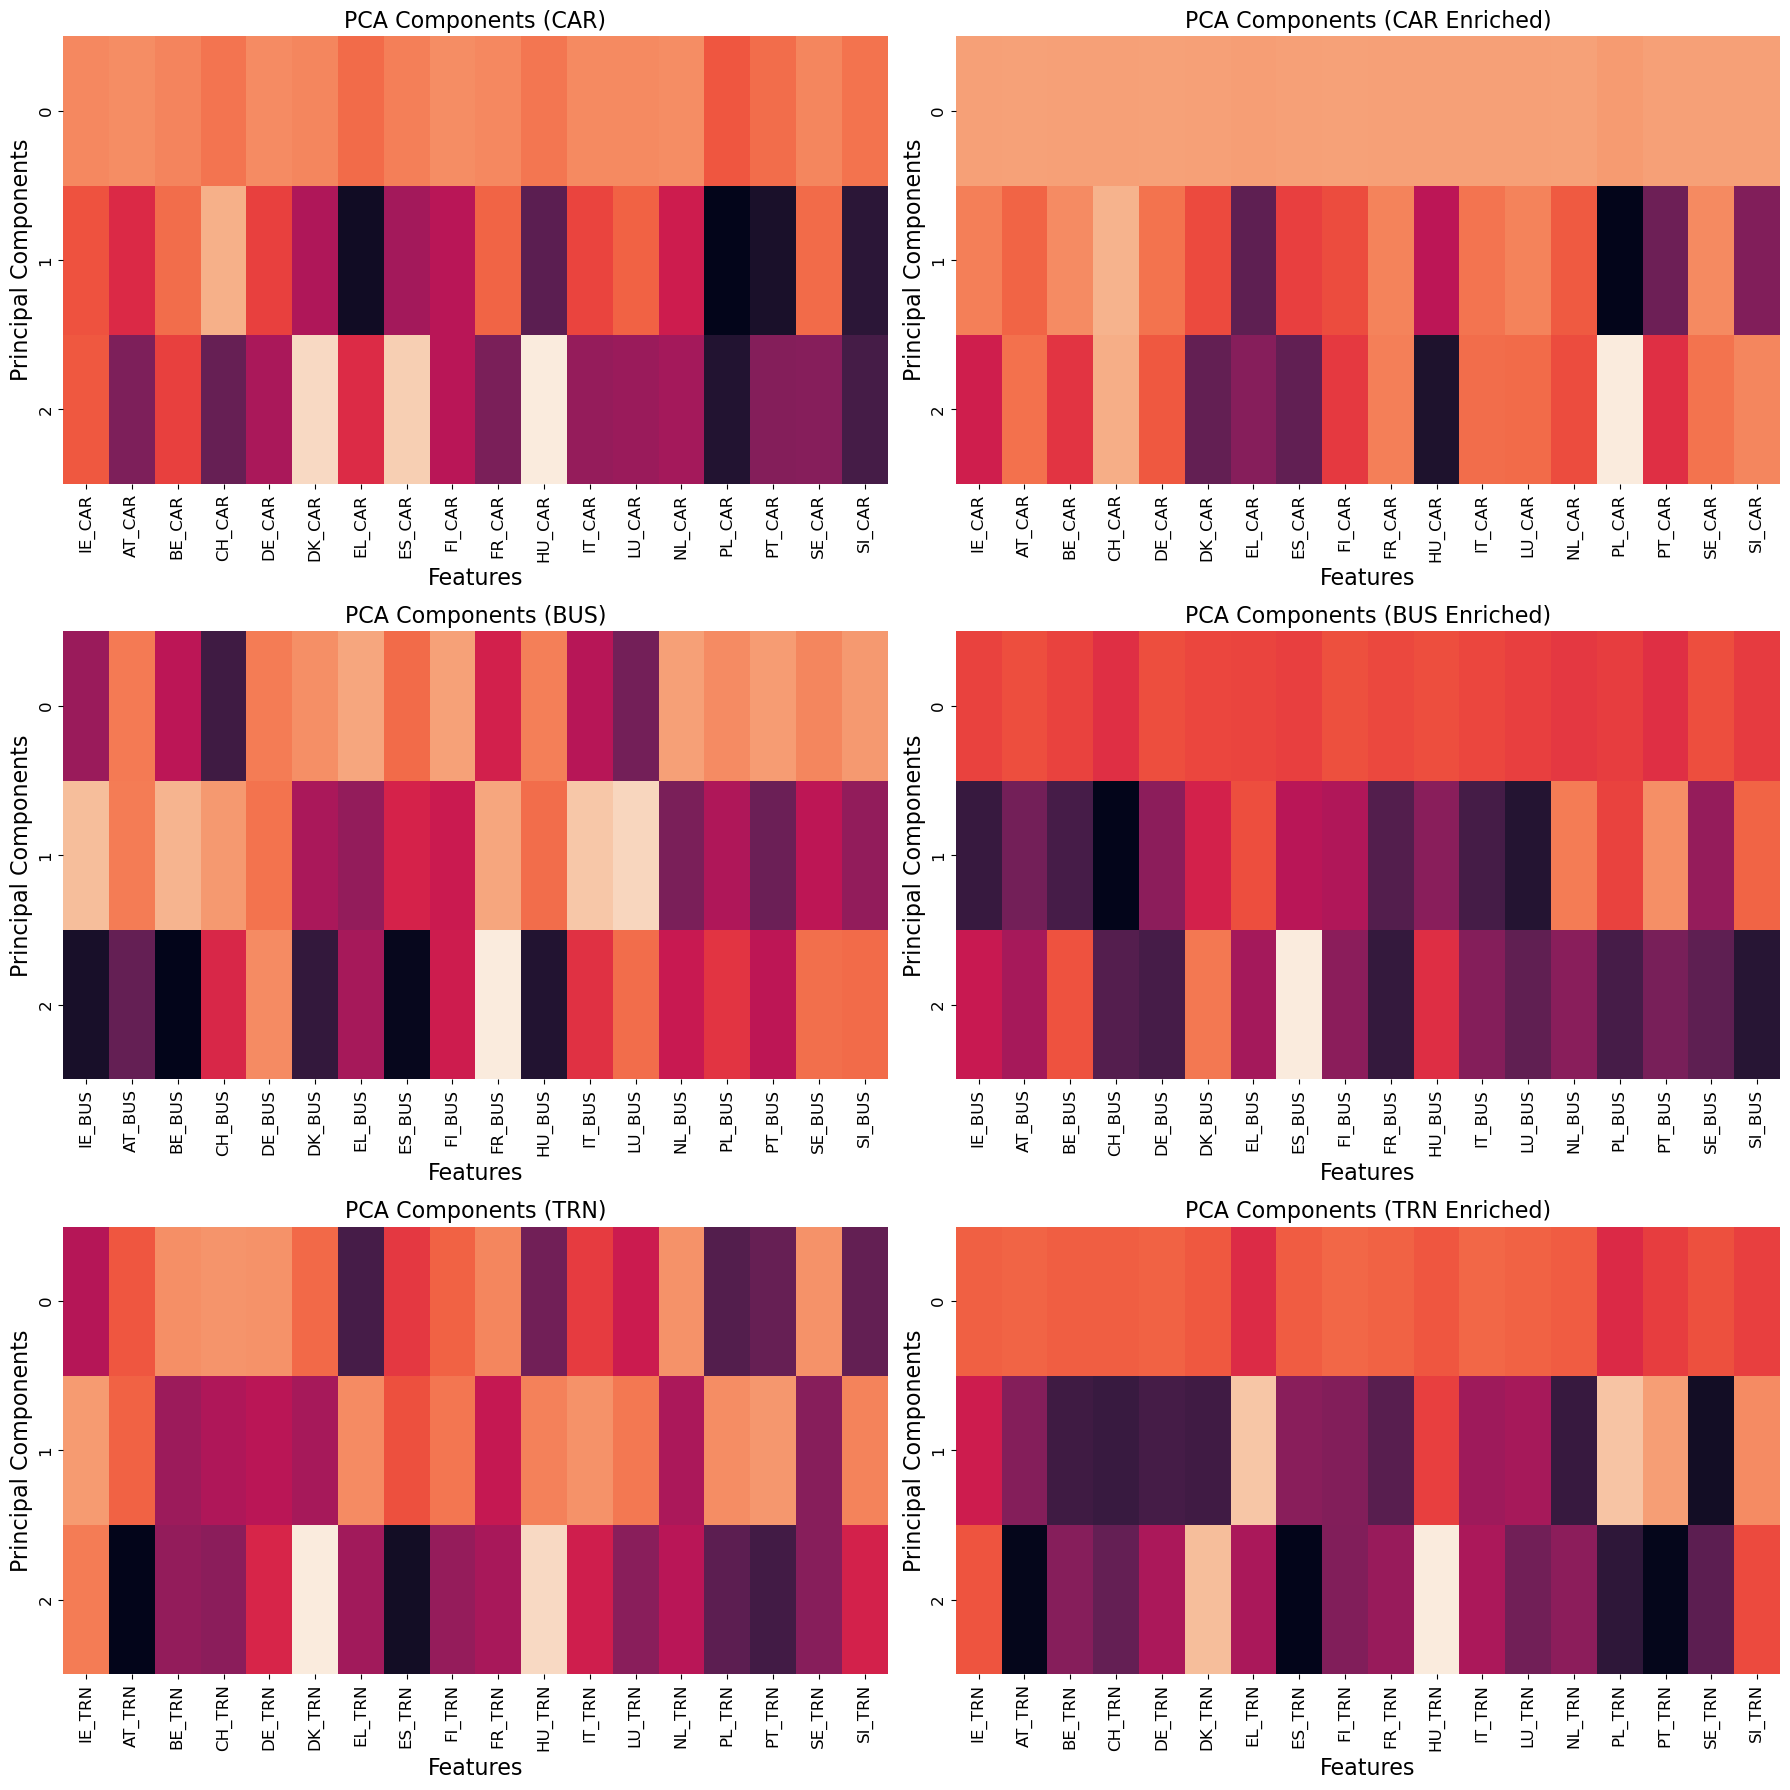

In [246]:
# Plotting 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot 1
sns.heatmap(df_comp, ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('PCA Components (CAR)', fontsize=16)
axes[0, 0].set_xlabel('Features', fontsize=16)
axes[0, 0].set_ylabel('Principal Components', fontsize=16)
axes[0, 0].tick_params(axis='both', labelsize=12)

# Plot 2
sns.heatmap(df_comp3, ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('PCA Components (CAR Enriched)', fontsize=16)
axes[0, 1].set_xlabel('Features', fontsize=16)
axes[0, 1].set_ylabel('Principal Components', fontsize=16)
axes[0, 1].tick_params(axis='both', labelsize=12)

# Plot 3
sns.heatmap(df_comp1, ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('PCA Components (BUS)', fontsize=16)
axes[1, 0].set_xlabel('Features', fontsize=16)
axes[1, 0].set_ylabel('Principal Components', fontsize=16)
axes[1, 0].tick_params(axis='both', labelsize=12)

# Plot 4
sns.heatmap(df_comp4, ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('PCA Components (BUS Enriched)', fontsize=16)
axes[1, 1].set_xlabel('Features', fontsize=16)
axes[1, 1].set_ylabel('Principal Components', fontsize=16)
axes[1, 1].tick_params(axis='both', labelsize=12)

# Plot 5
sns.heatmap(df_comp2, ax=axes[2, 0], cbar=False)
axes[2, 0].set_title('PCA Components (TRN)', fontsize=16)
axes[2, 0].set_xlabel('Features', fontsize=16)
axes[2, 0].set_ylabel('Principal Components', fontsize=16)
axes[2, 0].tick_params(axis='both', labelsize=12)

# Plot 6
sns.heatmap(df_comp5, ax=axes[2, 1], cbar=False)
axes[2, 1].set_title('PCA Components (TRN Enriched)', fontsize=16)
axes[2, 1].set_xlabel('Features', fontsize=16)
axes[2, 1].set_ylabel('Principal Components', fontsize=16)
axes[2, 1].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


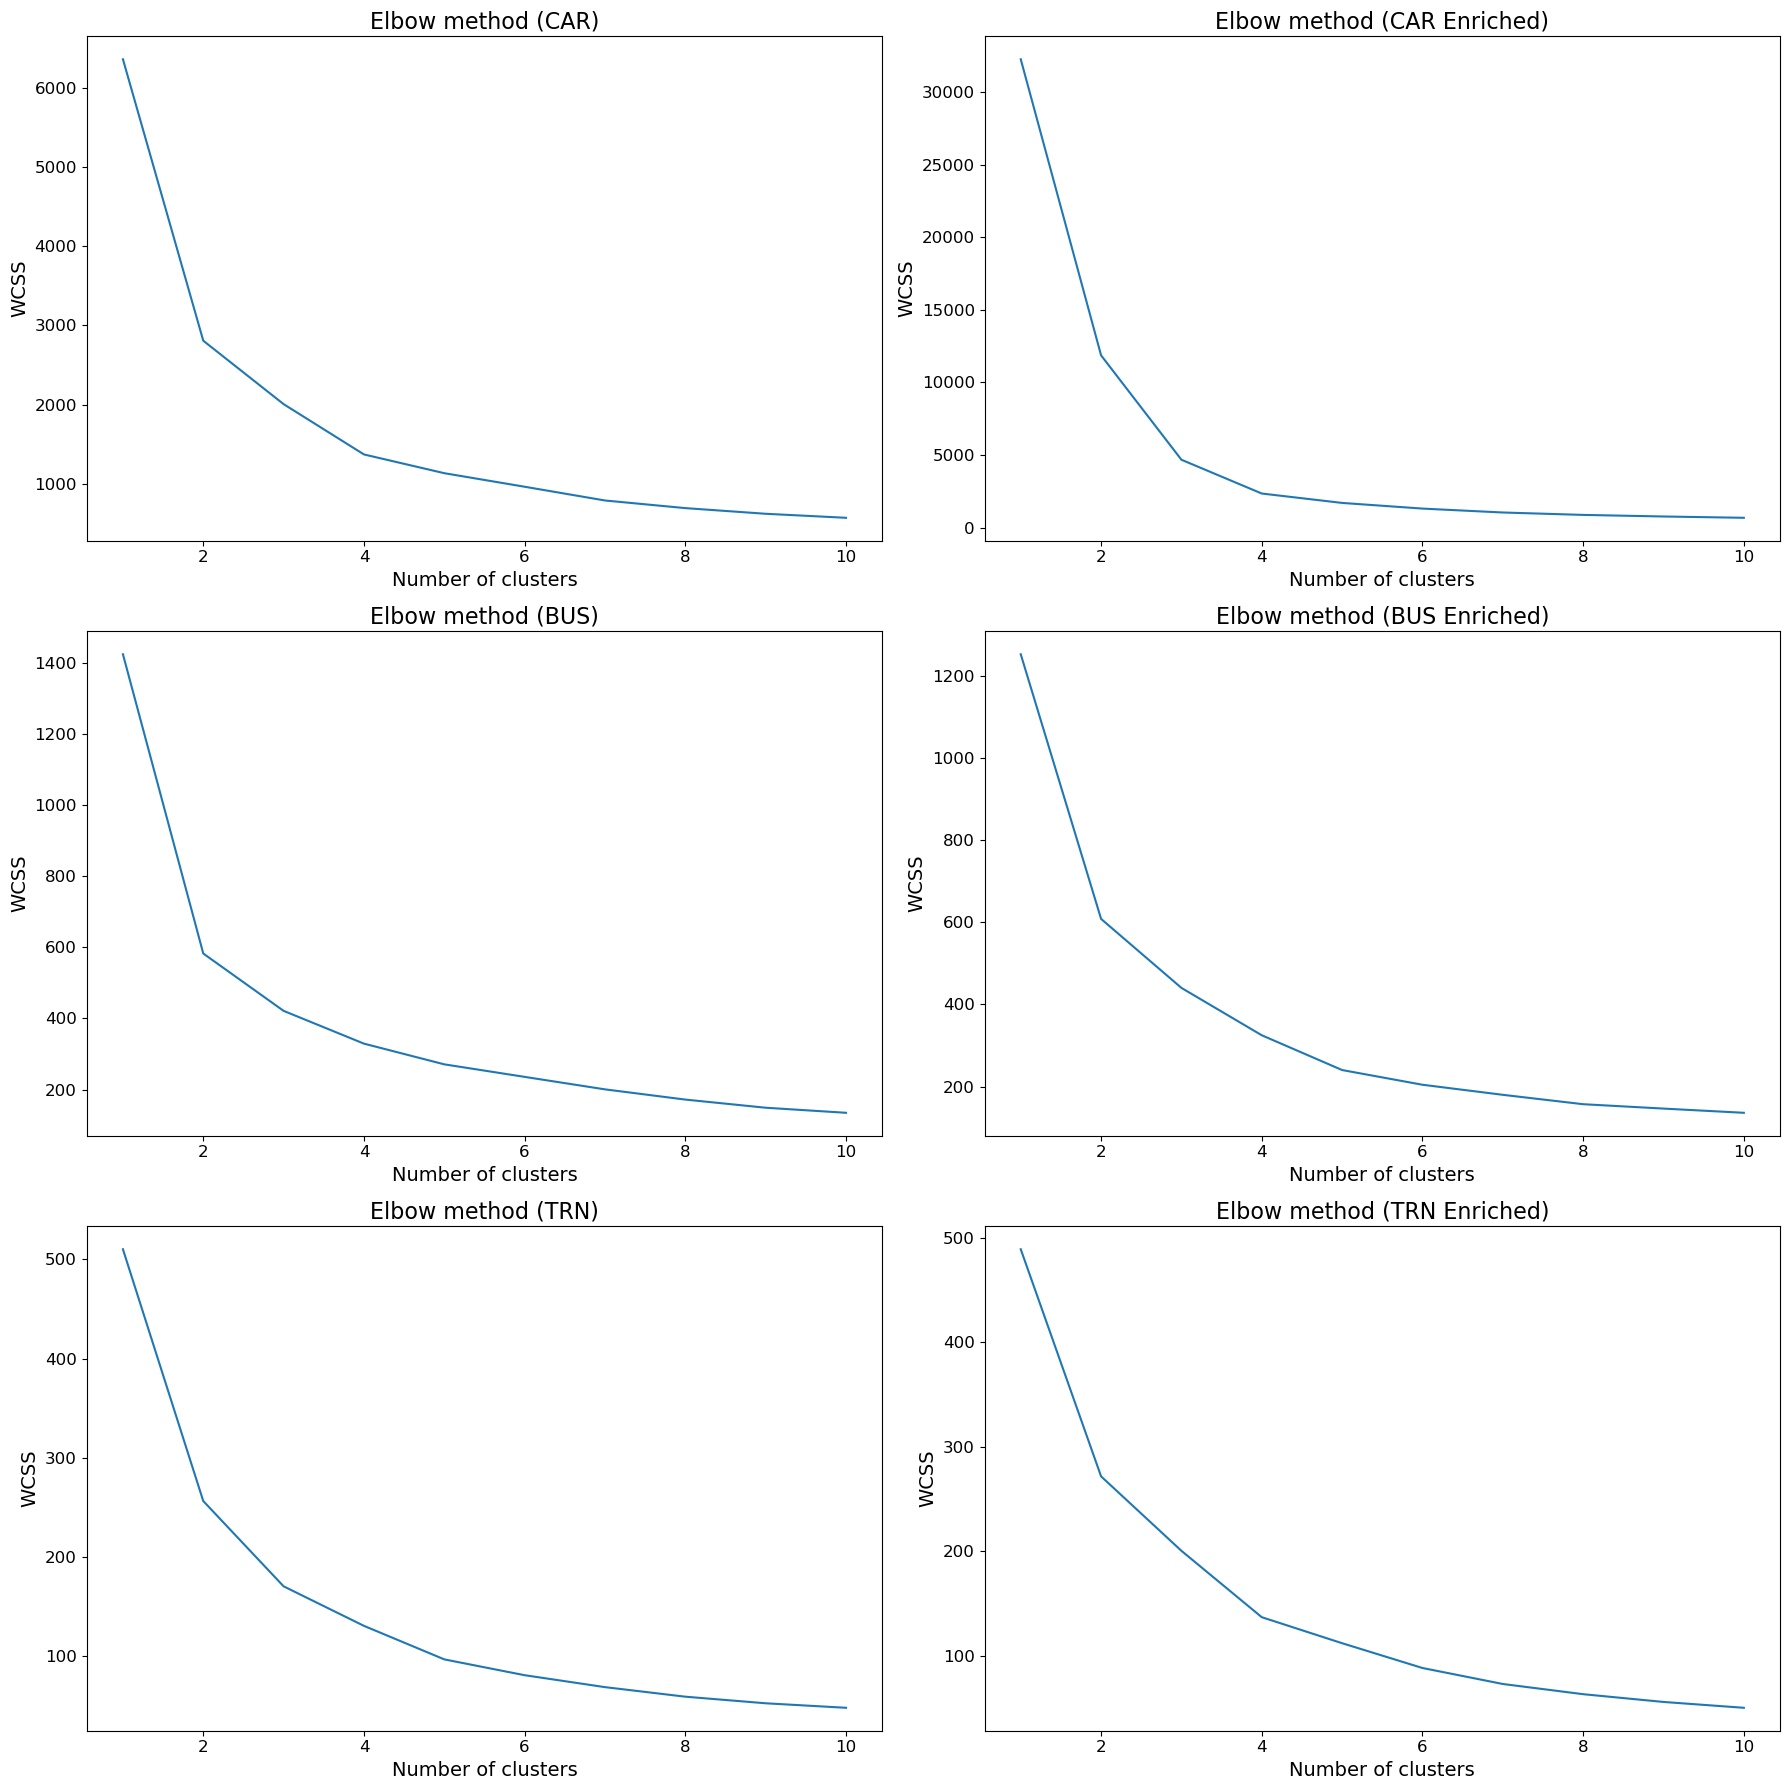

In [247]:
# Plotting 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot 1
axes[0, 0].plot(range(1, 11), wcss)
axes[0, 0].set_title('Elbow method (CAR)', fontsize=16)
axes[0, 0].set_xlabel('Number of clusters', fontsize=14)
axes[0, 0].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[0, 0].tick_params(axis='both', labelsize=12)

# Plot 2
axes[0, 1].plot(range(1, 11), wcss3)
axes[0, 1].set_title('Elbow method (CAR Enriched)', fontsize=16)
axes[0, 1].set_xlabel('Number of clusters', fontsize=14)
axes[0, 1].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[0, 1].tick_params(axis='both', labelsize=12)

# Plot 3
axes[1, 0].plot(range(1, 11), wcss1)
axes[1, 0].set_title('Elbow method (BUS)', fontsize=16)
axes[1, 0].set_xlabel('Number of clusters', fontsize=14)
axes[1, 0].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[1, 0].tick_params(axis='both', labelsize=12)

# Plot 4
axes[1, 1].plot(range(1, 11), wcss4)
axes[1, 1].set_title('Elbow method (BUS Enriched)', fontsize=16)
axes[1, 1].set_xlabel('Number of clusters', fontsize=14)
axes[1, 1].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[1, 1].tick_params(axis='both', labelsize=12)

# Plot 5
axes[2, 0].plot(range(1, 11), wcss2)
axes[2, 0].set_title('Elbow method (TRN)', fontsize=16)
axes[2, 0].set_xlabel('Number of clusters', fontsize=14)
axes[2, 0].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[2, 0].tick_params(axis='both', labelsize=12)

# Plot 6
axes[2, 1].plot(range(1, 11), wcss5)
axes[2, 1].set_title('Elbow method (TRN Enriched)', fontsize=16)
axes[2, 1].set_xlabel('Number of clusters', fontsize=14)
axes[2, 1].set_ylabel('WCSS', fontsize=14)  # within cluster sum of squares
axes[2, 1].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

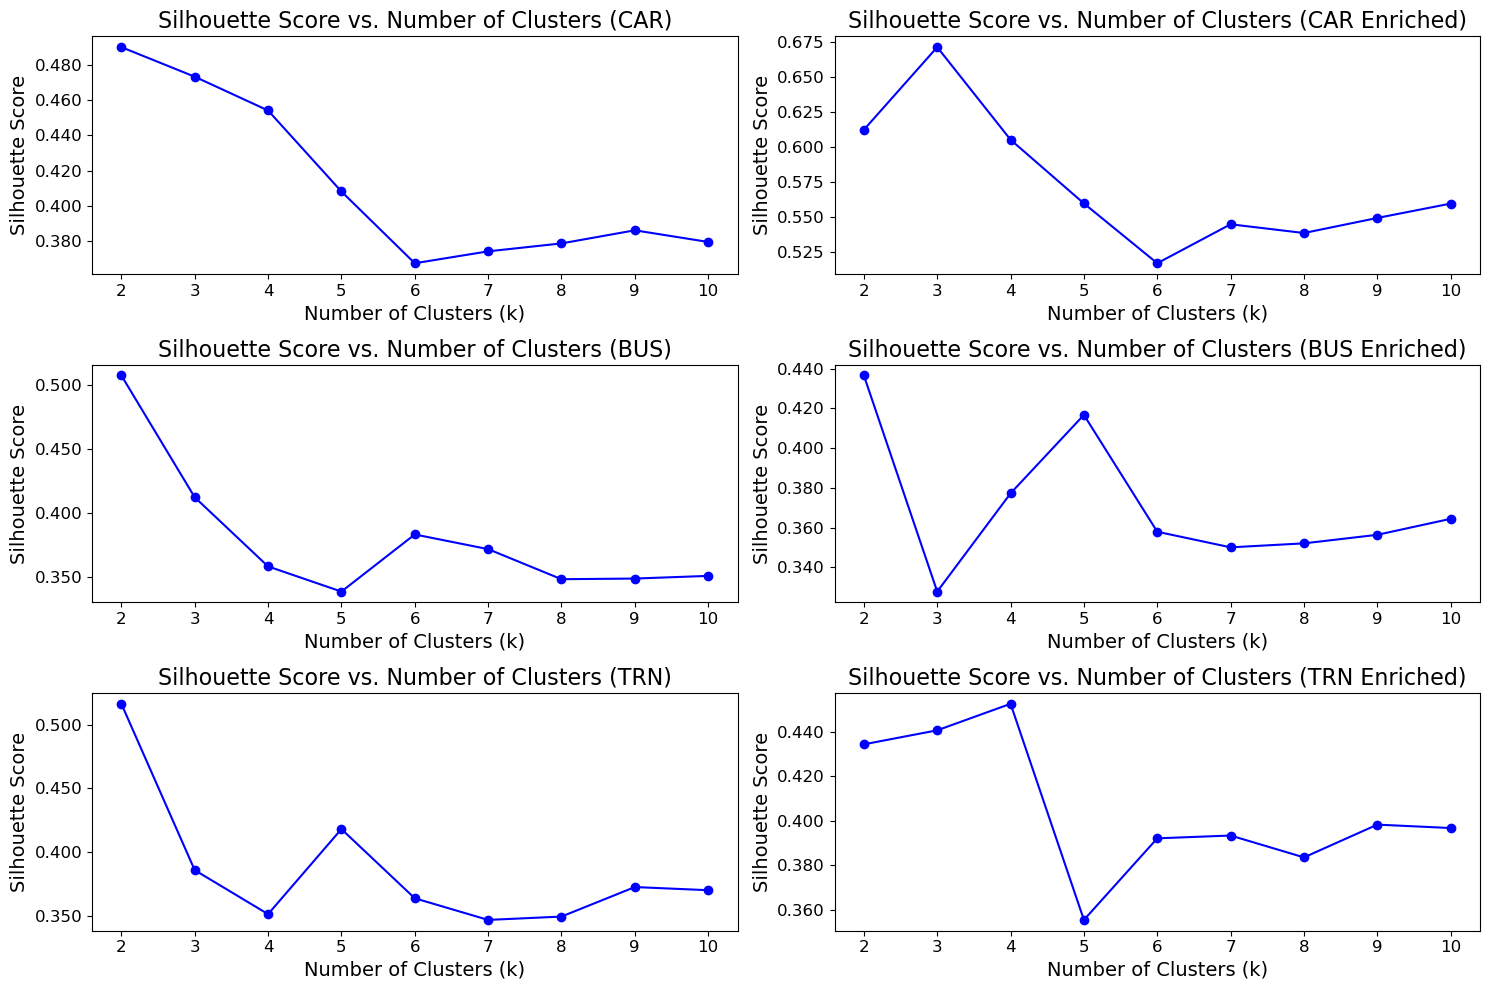

In [248]:
# Set the range of clusters we want to test
k_values = range(2, 11)

# Plotting the silhouette scores for each case
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Function to format y-axis ticks with three decimals
def format_yaxis_ticks(value, pos):
    return "{:.3f}".format(value)

# Plot 1
silhouettescore1 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(Xs)
    silhouettescore1.append(silhouette_score(Xs, km_labels, metric='euclidean'))

axes[0, 0].plot(k_values, silhouettescore1, marker='o', linestyle='-', color='b')
axes[0, 0].set_title('Silhouette Score vs. Number of Clusters (CAR)', fontsize=16)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[0, 0].set_ylabel('Silhouette Score', fontsize=14)
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[0, 0].tick_params(axis='both', labelsize=12)

# Plot 2
silhouettescore3 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels3 = km.fit_predict(Xs3)
    silhouettescore3.append(silhouette_score(Xs3, km_labels3, metric='euclidean'))

axes[0, 1].plot(k_values, silhouettescore3, marker='o', linestyle='-', color='b')
axes[0, 1].set_title('Silhouette Score vs. Number of Clusters (CAR Enriched)', fontsize=16)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=14)
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[0, 1].tick_params(axis='both', labelsize=12)

# Plot 3
silhouettescore1 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels1 = km.fit_predict(Xs1)
    silhouettescore1.append(silhouette_score(Xs1, km_labels1, metric='euclidean'))

axes[1, 0].plot(k_values, silhouettescore1, marker='o', linestyle='-', color='b')
axes[1, 0].set_title('Silhouette Score vs. Number of Clusters (BUS)', fontsize=16)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[1, 0].set_ylabel('Silhouette Score', fontsize=14)
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[1, 0].tick_params(axis='both', labelsize=12)

# Plot 4
silhouettescore4 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels4 = km.fit_predict(Xs4)
    silhouettescore4.append(silhouette_score(Xs4, km_labels4, metric='euclidean'))

axes[1, 1].plot(k_values, silhouettescore4, marker='o', linestyle='-', color='b')
axes[1, 1].set_title('Silhouette Score vs. Number of Clusters (BUS Enriched)', fontsize=16)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[1, 1].set_ylabel('Silhouette Score', fontsize=14)
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[1, 1].tick_params(axis='both', labelsize=12)

# Plot 5
silhouettescore2 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels2 = km.fit_predict(Xs2)
    silhouettescore2.append(silhouette_score(Xs2, km_labels2, metric='euclidean'))

axes[2, 0].plot(k_values, silhouettescore2, marker='o', linestyle='-', color='b')
axes[2, 0].set_title('Silhouette Score vs. Number of Clusters (TRN)', fontsize=16)
axes[2, 0].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[2, 0].set_ylabel('Silhouette Score', fontsize=14)
axes[2, 0].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[2, 0].tick_params(axis='both', labelsize=12)

# Plot 6
silhouettescore5 = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km_labels5 = km.fit_predict(Xs5)
    silhouettescore5.append(silhouette_score(Xs5, km_labels5, metric='euclidean'))

axes[2, 1].plot(k_values, silhouettescore5, marker='o', linestyle='-', color='b')
axes[2, 1].set_title('Silhouette Score vs. Number of Clusters (TRN Enriched)', fontsize=16)
axes[2, 1].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[2, 1].set_ylabel('Silhouette Score', fontsize=14)
axes[2, 1].yaxis.set_major_formatter(FuncFormatter(format_yaxis_ticks))
axes[2, 1].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [249]:
# Figure X....
# Data
output8 = {
    'Vehicle_Enriched': ['CAR', 'BUS', 'TRN'],
    'First, Second and Third Component (PCA)': [
        [0.97747751, 0.0174295,  0.00246979],
        [0.97557712, 0.01888167, 0.00272318],
        [0.76860845, 0.16637195, 0.02241525]
    ]
}

# Create DataFrame
unsup_ML_Results8 = pd.DataFrame(output8)
unsup_ML_Results8 

,Vehicle_Enriched,"First, Second and Third Component (PCA)"
0,CAR,"[0.97747751, 0.0174295, 0.00246979]"
1,BUS,"[0.97557712, 0.01888167, 0.00272318]"
2,TRN,"[0.76860845, 0.16637195, 0.02241525]"


In [250]:
# Figure X....
# Data
output6 = {
    'Vehicle': ['CAR', 'BUS', 'TRN'],
    'Silhouetter_Score': [0.671,0.667, 0.441]
}

# Create DataFrame
unsup_ML_Results2 = pd.DataFrame(output6)
unsup_ML_Results2 

,Vehicle,Silhouetter_Score
0,CAR,0.67
1,BUS,0.67
2,TRN,0.44


In [251]:
# Figure X....
# Data
output7 = {
    'Vehicle': ['CAR', 'BUS', 'TRN'],
     'PCA': [
        [0.77171509, 0.16514322, 0.02878059],
        [0.52207334, 0.2149303, 0.09974296],
        [0.44371637, 0.33012741, 0.07419443]
    ],
    'PCA Enriched': [
        [0.97747751, 0.0174295,  0.00246979],
        [0.97557712, 0.01888167, 0.00272318],
        [0.76860845, 0.16637195, 0.02241525]
    ]
}

# Create DataFrame
unsup_ML_Results3 = pd.DataFrame(output7)
unsup_ML_Results3

,Vehicle,PCA,PCA Enriched
0,CAR,"[0.77171509, 0.16514322, 0.02878059]","[0.97747751, 0.0174295, 0.00246979]"
1,BUS,"[0.52207334, 0.2149303, 0.09974296]","[0.97557712, 0.01888167, 0.00272318]"
2,TRN,"[0.44371637, 0.33012741, 0.07419443]","[0.76860845, 0.16637195, 0.02241525]"


After enriching the data, the first principal component explains almost 97% of the variability for the CAR and BUS datasets, while the TRN dataset exhibits 76.86% variability on the first component. This demonstrates a clear improvement.

In [252]:
# Figure X....
# Data
output8 = {
    'Vehicle': ['CAR', 'BUS', 'TRN'],
    'Silhouetter_Score': [0.490, 0.412,0.386],
    'Silhouetter_Score_Enriched': [0.671,0.667, 0.441]
}

# Create DataFrame
unsup_ML_Results4 = pd.DataFrame(output8)
unsup_ML_Results4 

,Vehicle,Silhouetter_Score,Silhouetter_Score_Enriched
0,CAR,0.49,0.67
1,BUS,0.41,0.67
2,TRN,0.39,0.44


- **Closer to +1:** Well-defined clusters.
- **Around 0:** Overlapping clusters.
- **Closer to -1:** Samples may have been assigned to the wrong cluster.

Therefore, a higher silhouette score is generally indicative of a better-defined clustering.


●	**Modern Transport planning has a great dependence on technology and relies upon visualizations to communicate information, this includes web based, mobile based and many other digital transmission formats. Develop an interactive dashboard tailored to modern Transport planning, using tufts principles, to showcase the information/evidence gathered following your Machine Learning Analysis. Detail the rationale for approach and visualisation choices made during development.<br> *Note you may not use Powerbi, rapidminer, tableau or other such tools to accomplish this (at this stage).*** [0-30]<br>
## Answer

Creating a dashboard to visualise ML Results:

In [253]:
# Creating a df to plot the Sentiment Analysis prediction
review_data = {
    'Airline': ['Ryanair', 'USA_Airline_Tweets', 'Ryanair', 'USA_Airline_Tweets', 'Ryanair', 'USA_Airline_Tweets'],
    'Sentiment': ['Bad', 'Bad', 'Good', 'Good', 'Neutral', 'Neutral'],
    'Score': [3, 3, 3, 0, 2, 0]
}

review_df = pd.DataFrame(review_data)

# Crosstab to get the data in the required format
review_crosstab = pd.crosstab(review_df['Sentiment'], review_df['Airline'], values=review_df['Score'], aggfunc='sum', margins=False)

# Supervised Learning Data
data_supervised = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'Random Forest', 'KNN', 'SVC', "GridSearchCV('C': 1000, 'gamma': 0.01})",
              "GridSearchCV('C': 1000, 'gamma': 0.001})"],
    'Accuracy (%)': [94.83, 93.10, 86.21, 69.23, 90.88, 0],  # Adjusted length
    'Accuracy_Enriched (%)': [87.44, 91.77, 87.44, 87.01, 0, 91.04]  # Adjusted length
})

# Bar chart for Supervised Learning
fig_supervised = px.bar(
    data_supervised,
    x='Model',
    y=['Accuracy (%)', 'Accuracy_Enriched (%)'],
    barmode='group',
    title='Supervised Learning'
)

# Cross Validation and Feature Reduction Data
data_feature_reduction = pd.DataFrame({
    'Country_Vehicle': ['IE_CAR', 'IE_BUS', 'IE_TRN'],
    'Feature_No': [2, 2, 2],
    'Accuracy (%)': [-88.85, 6.15, -70.44],
    'Features_No_Enriched': [16, 14, 17],
    'Accuracy_Enriched (%)': [98.67, 81.54, 89.59]
})

# Bar chart for GridSearchCV Feature Reduction
fig_feature_reduction = px.bar(
    data_feature_reduction,
    x='Country_Vehicle',  # Use 'Country_Vehicle' as the x-axis
    y=['Feature_No', 'Accuracy (%)', 'Features_No_Enriched', 'Accuracy_Enriched (%)'],
    barmode='group',
    title='Cross Validation and Feature Reduction'
)

# Your data for Unsupervised Learning
data_unsupervised = pd.DataFrame({
    'Vehicle': ['CAR', 'BUS', 'TRN'],
    'Silhouetter_Score': [0.49, 0.41, 0.39],
    'Silhouetter_Score_Enriched': [0.67, 0.67, 0.44]
})

# Bar chart for Unsupervised Learning
fig_unsupervised = px.bar(
    data_unsupervised,
    x='Vehicle',
    y=['Silhouetter_Score', 'Silhouetter_Score_Enriched'],
    barmode='group',
    title='Unsupervised Learning - Silhouette Score'
)

# Explained variances for CAR
explained_variance_car = [0.77171509, 0.16514322, 0.02878059]

# Explained variances for CAR Enriched
explained_variance_car_enriched = [0.97747751, 0.0174295, 0.00246979]

# Explained variances for BUS
explained_variance_bus = [0.52207334, 0.2149303, 0.09974296]

# Explained variances for BUS Enriched
explained_variance_bus_enriched = [0.78418364, 0.14665355, 0.02593078]

# Explained variances for TRN
explained_variance_trn = [0.44371637, 0.33012741, 0.07419443]

# Explained variances for TRN Enriched
explained_variance_trn_enriched = [0.76860845, 0.16637195, 0.02241525]

# Create Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Modern Transport Planning Ireland, LTD.", style={'textAlign': 'center'}),
    html.P("Summary of the ML results. Please select an option from the dropdown menu to visualize the results.", style={'textAlign': 'center'}),
   
   
    # Dropdown for selecting the figure
    dcc.Dropdown(
        id='figure-dropdown',
        options=[
            
            {'label': 'Supervised Learning', 'value': 'supervised'},
            {'label': 'Cross Validation & Feature Reduction', 'value': 'feature_reduction'},
            {'label': 'Unsupervised Learning Silhouette Score', 'value': 'unsupervised'},
            {'label': 'Unsupervised Learning PCA Variance', 'value': 'pca_variance'},
            {'label': 'Sentiment Analysis', 'value': 'sentiment'},
        ],
        value='supervised',  # Default selected value
        style={'width': '58%', 'margin': 'auto'}  # Center the dropdown
    ),

    # Placeholder for the selected figure
    dcc.Graph(id='selected-figure'),

  # Acknowledgment tag
    
    html.P("Developed with ❤️ by Student sba23021.", style={'textAlign': 'center'}),

])

# Callback to update the selected figure based on the dropdown value
@app.callback(
    Output('selected-figure', 'figure'),
    [Input('figure-dropdown', 'value')]
)
def update_figure(selected_value):
    if selected_value == 'supervised':
        return fig_supervised
    elif selected_value == 'sentiment':
        # Plotting histograms using plotly for Sentiment Analysis
        fig_sentiment = go.Figure()

        # Plot for Ryanair
        fig_sentiment.add_trace(go.Bar(x=review_crosstab.index, y=review_crosstab['Ryanair'],
                                       marker_color='blue', name='Ryanair'))

        # Plot for Airline_Tweets
        fig_sentiment.add_trace(go.Bar(x=review_crosstab.index, y=review_crosstab['USA_Airline_Tweets'],
                                       marker_color='orange', name='USA_Airline_Tweets'))

        fig_sentiment.update_layout(title='Sentiment Prediction Analysis',
                                    xaxis=dict(title='Sentiment'),
                                    yaxis=dict(title='Number of Predictions'),
                                    barmode='group')  # Combine bars for each sentiment

        return fig_sentiment
  
    elif selected_value == 'feature_reduction':
        return fig_feature_reduction
    elif selected_value == 'unsupervised':
        return fig_unsupervised
    elif selected_value == 'pca_variance':
        return go.Figure(
            data=[
                go.Bar(x=['1st Comp Car', '2nd Comp Car', '3rd Comp Car'], y=explained_variance_car, name='Component CAR', marker_color='blue'),
                go.Scatter(x=['1st Comp Car', '2nd Comp Car', '3rd Comp Car'], y=explained_variance_car,
                           mode='lines', marker=dict(color='red'), name='Cumulative Explained Variance CAR'),
                go.Bar(x=['1st Comp Car Enriched', '2nd Comp Car Enriched', '3rd Comp Car Enriched'], y=explained_variance_car_enriched, name='Component CAR Enriched', marker_color='green'),
                go.Scatter(x=['1st Comp Car Enriched', '2nd Comp Car Enriched', '3rd Comp Car Enriched'], y=explained_variance_car_enriched,
                           mode='lines', marker=dict(color='orange'), name='Cumulative Explained Variance CAR Enriched'),
                go.Bar(x=['1st Comp Bus', '2nd Comp Bus', '3rd Comp Bus'], y=explained_variance_bus, name='Component BUS', marker_color='purple'),
                go.Scatter(x=['1st Comp Bus', '2nd Comp Bus', '3rd Comp Bus'], y=explained_variance_bus,
                           mode='lines', marker=dict(color='brown'), name='Cumulative Explained Variance BUS'),
                go.Bar(x=['1st Comp Bus Enriched', '2nd Comp Bus Enriched', '3rd Comp Bus Enriched'], y=explained_variance_bus_enriched, name='Component BUS Enriched', marker_color='gray'),
                go.Scatter(x=['1st Comp Bus Enriched', '2nd Comp Bus Enriched', '3rd Comp Bus Enriched'], y=explained_variance_bus_enriched,
                           mode='lines', marker=dict(color='pink'), name='Cumulative Explained Variance BUS Enriched'),
                go.Bar(x=['1st Comp TRN', '2nd Comp TRN', '3rd Comp TRN'], y=explained_variance_trn, name='Component TRN', marker_color='cyan'),
                go.Scatter(x=['1st Comp TRN', '2nd Comp TRN', '3rd Comp TRN'], y=explained_variance_trn,
                           mode='lines', marker=dict(color='black'), name='Cumulative Explained Variance TRN'),
                go.Bar(x=['1st Comp TRN Enriched', '2nd Comp TRN Enriched', '3rd Comp TRN Enriched'], y=explained_variance_trn_enriched, name='Component TRN Enriched', marker_color='yellow'),
                go.Scatter(x=['1st Comp TRN Enriched', '2nd Comp TRN Enriched', '3rd Comp TRN Enriched'], y=explained_variance_trn_enriched,
                           mode='lines', marker=dict(color='magenta'), name='Cumulative Explained Variance TRN Enriched'),
            ],
            layout=dict(
                title='Unsupervised Learning - Principal Components Variance',
                xaxis=dict(title='Components'),
                yaxis=dict(title='Explained Variance'),
                legend=dict(x=0, y=1),
                margin=dict(l=10, r=10, t=40, b=10),
                showlegend=False  # Turn off the legend
            )
        )


# Run the app
if __name__ == '__main__':
    app.run_server(debug=False) # Turning off the debug parameter is causing the app to crash every now and then....